In [ ]:
import numpy as np
import pandas as pd
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,  recall_score , confusion_matrix , accuracy_score, auc, roc_curve, roc_auc_score, precision_score,f1_score
from matplotlib import pyplot as plt
from xgboost import XGBClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
%matplotlib inline
from pylab import *
from matplotlib.pyplot import *
from lightgbm import LGBMClassifier
from imblearn.under_sampling import RandomUnderSampler


In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#DATASETS PREPARATION

In [ ]:
data1 = pd.read_csv("/content/gdrive/MyDrive/TabNet/creditcard.csv", sep=',')
data1

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
data1.isnull().values.any()

False

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
data1.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
data3 = pd.read_excel("/content/gdrive/MyDrive/TabNet/frauddataset.xlsx").select_dtypes(exclude=['object'])

In [ ]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16735 entries, 0 to 16734
Data columns (total 51 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   terbank                          16735 non-null  float64       
 1   coa_id                           16735 non-null  float64       
 2   amount                           16735 non-null  float64       
 3   datetime                         16735 non-null  datetime64[ns]
 4   dayofmnth                        16735 non-null  float64       
 5   hour                             16735 non-null  float64       
 6   weekday                          16735 non-null  int64         
 7   timeofday                        16735 non-null  float64       
 8   je_line_corr_coa_id              16735 non-null  float64       
 9   cred_summa                       10348 non-null  float64       
 10  gesch                            16733 non-null  float64  

In [ ]:
import datetime
data3.replace({pd.NaT: datetime.datetime(2099, 1, 1, 0, 0)},inplace=True)

In [ ]:
def conv_datetime_to_int(df):
  for i in df.columns:
   if df[i].dtype == 'datetime64[ns]':
      df[i]=df[i].apply(lambda x: int(x.timestamp()))
  return df 


In [ ]:
data3.isnull().values.any()
data3=data3.fillna(0)

In [ ]:
data3 = conv_datetime_to_int(data3)

In [ ]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16735 entries, 0 to 16734
Data columns (total 51 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   terbank                          16735 non-null  float64
 1   coa_id                           16735 non-null  float64
 2   amount                           16735 non-null  float64
 3   datetime                         16735 non-null  int64  
 4   dayofmnth                        16735 non-null  float64
 5   hour                             16735 non-null  float64
 6   weekday                          16735 non-null  int64  
 7   timeofday                        16735 non-null  float64
 8   je_line_corr_coa_id              16735 non-null  float64
 9   cred_summa                       16735 non-null  float64
 10  gesch                            16735 non-null  float64
 11  oper_cred_card_avr_crlim         16735 non-null  float64
 12  int_org_pty_id    

In [ ]:
data3.fraud_flag.value_counts()

0.0    16503
1.0      232
Name: fraud_flag, dtype: int64

In [ ]:
# getting train, valid, test splits for datasets1 and 3

data1['set']=np.random.choice(['train','valid','test'],p =[.6,.2,.2],size=(data1.shape[0],))
data3['set']=np.random.choice(['train','valid','test'],p =[.6,.2,.2],size=(data3.shape[0],))

X_train1 =data1.drop(['Class','set'], axis=1).values[data1[data1.set=='train'].index]
y_train1 = data1.Class.values[data1[data1.set=='train'].index]

X_valid1 =data1.drop(['Class','set'], axis=1).values[data1[data1.set=='valid'].index]
y_valid1 = data1.Class.values[data1[data1.set=='valid'].index]

X_test1 =data1.drop(['Class','set'], axis=1).values[data1[data1.set=='test'].index]
y_test1 = data1.Class.values[data1[data1.set=='test'].index]


X_train3 =data3.drop(['fraud_flag','set'], axis=1).values[data3[data3.set=='train'].index]
y_train3 = data3.fraud_flag.values[data3[data3.set=='train'].index]

X_valid3 =data3.drop(['fraud_flag','set'], axis=1).values[data3[data3.set=='valid'].index]
y_valid3 = data3.fraud_flag.values[data3[data3.set=='valid'].index]

X_test3 =data3.drop(['fraud_flag','set'], axis=1).values[data3[data3.set=='test'].index]
y_test3 = data3.fraud_flag.values[data3[data3.set=='test'].index]


In [ ]:
data1.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class', 'set'],
      dtype='object')

In [ ]:
#  set2


# train2_i = pd.read_csv("/content/gdrive/MyDrive/TabNet/train_identity.csv", sep=',')
data2 = pd.read_csv("/content/gdrive/MyDrive/TabNet/train_transaction.csv", sep=',').select_dtypes(exclude=['object'])
# data2= pd.merge(train2_d, train2_i, on='TransactionID',how ='outer').select_dtypes(exclude=['object'])
# data2 is huge and sparse let`s just delete the object columns to ease the training


In [ ]:
data2=data2.fillna(0)

In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 380 entries, TransactionID to V339
dtypes: float64(376), int64(4)
memory usage: 1.7 GB


In [ ]:
data2.isFraud.value_counts()

0    569877
1     20663
Name: isFraud, dtype: int64

In [ ]:
data2['set']=np.random.choice(['train','valid','test'],p =[.6,.2,.2],size=(data2.shape[0],))

X_train2 =data2.drop(['isFraud','set'], axis=1).values[data2[data2.set=='train'].index]
y_train2 = data2.isFraud.values[data2[data2.set=='train'].index]

X_valid2 =data2.drop(['isFraud','set'], axis=1).values[data2[data2.set=='valid'].index]
y_valid2 = data2.isFraud.values[data2[data2.set=='valid'].index]

X_test2 =data2.drop(['isFraud','set'], axis=1).values[data2[data2.set=='test'].index]
y_test2 = data2.isFraud.values[data2[data2.set=='test'].index]



In [ ]:
data2.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,V331,V332,V333,V334,V335,V336,V337,V338,V339,set
0,2987000,0,86400,68.5,13926,0.0,150.0,142.0,315.0,87.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,train
1,2987001,0,86401,29.0,2755,404.0,150.0,102.0,325.0,87.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,valid
2,2987002,0,86469,59.0,4663,490.0,150.0,166.0,330.0,87.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,valid
3,2987003,0,86499,50.0,18132,567.0,150.0,117.0,476.0,87.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,test
4,2987004,0,86506,50.0,4497,514.0,150.0,102.0,420.0,87.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,train


####train valid and test saved

In [ ]:
# with open('/content/gdrive/MyDrive/TabNet/data/X_train2.txt', 'w') as f:
#     np.savetxt(f, X_train2)
# with open('/content/gdrive/MyDrive/TabNet/data/y_train2.txt', 'w') as f:
#     np.savetxt(f, y_train2)
# with open('/content/gdrive/MyDrive/TabNet/data/X_train1.txt', 'w') as f:
#     np.savetxt(f, X_train1)
# with open('/content/gdrive/MyDrive/TabNet/data/y_train1.txt', 'w') as f:
#     np.savetxt(f, y_train1)
# with open('/content/gdrive/MyDrive/TabNet/data/X_train3.txt', 'w') as f:
#     np.savetxt(f, X_train3)
# with open('/content/gdrive/MyDrive/TabNet/data/y_train3.txt', 'w') as f:
#     np.savetxt(f, y_train3)

with open('/content/gdrive/MyDrive/TabNet/data/X_train1.txt', 'r') as f:
    X_train1 = np.loadtxt(f)
with open('/content/gdrive/MyDrive/TabNet/data/y_train1.txt', 'r') as f:
    y_train1 = np.loadtxt(f)
with open('/content/gdrive/MyDrive/TabNet/data/X_train2.txt', 'r') as f:
    X_train2 = np.loadtxt(f)
with open('/content/gdrive/MyDrive/TabNet/data/y_train2.txt', 'r') as f:
    y_train2 = np.loadtxt(f)
with open('/content/gdrive/MyDrive/TabNet/data/X_train3.txt', 'r') as f:
    X_train3 = np.loadtxt(f)
with open('/content/gdrive/MyDrive/TabNet/data/y_train3.txt', 'r') as f:
    y_train3 = np.loadtxt(f)

In [ ]:
# with open('/content/gdrive/MyDrive/TabNet/data/X_valid2.txt', 'w') as f:
#     np.savetxt(f, X_valid2)
# with open('/content/gdrive/MyDrive/TabNet/data/y_valid2.txt', 'w') as f:
#     np.savetxt(f, y_valid2)
# with open('/content/gdrive/MyDrive/TabNet/data/X_valid1.txt', 'w') as f:
#     np.savetxt(f, X_valid1)
# with open('/content/gdrive/MyDrive/TabNet/data/y_valid1.txt', 'w') as f:
#     np.savetxt(f, y_valid1)
# with open('/content/gdrive/MyDrive/TabNet/data/X_valid3.txt', 'w') as f:
#     np.savetxt(f, X_valid3)
# with open('/content/gdrive/MyDrive/TabNet/data/y_valid3.txt', 'w') as f:
#     np.savetxt(f, y_valid3)

with open('/content/gdrive/MyDrive/TabNet/data/X_valid1.txt', 'r') as f:
    X_valid1 = np.loadtxt(f)
with open('/content/gdrive/MyDrive/TabNet/data/y_valid1.txt', 'r') as f:
    y_valid1 = np.loadtxt(f)
with open('/content/gdrive/MyDrive/TabNet/data/X_valid2.txt', 'r') as f:
    X_valid2 = np.loadtxt(f)
with open('/content/gdrive/MyDrive/TabNet/data/y_valid2.txt', 'r') as f:
    y_valid2 = np.loadtxt(f)
with open('/content/gdrive/MyDrive/TabNet/data/X_valid3.txt', 'r') as f:
    X_valid3 = np.loadtxt(f)
with open('/content/gdrive/MyDrive/TabNet/data/y_valid3.txt', 'r') as f:
    y_valid3 = np.loadtxt(f)

In [ ]:
# with open('/content/gdrive/MyDrive/TabNet/data/X_test2.txt', 'w') as f:
#     np.savetxt(f, X_test2)
# with open('/content/gdrive/MyDrive/TabNet/data/X_test3.txt', 'w') as f:
#     np.savetxt(f, X_test3)
# with open('/content/gdrive/MyDrive/TabNet/data/X_test1.txt', 'w') as f:
#     np.savetxt(f, X_test1)
# with open('/content/gdrive/MyDrive/TabNet/data/y_test1.txt', 'w') as f:
#     np.savetxt(f, y_test1)
# with open('/content/gdrive/MyDrive/TabNet/data/y_test2.txt', 'w') as f:
#     np.savetxt(f, y_test2)
# with open('/content/gdrive/MyDrive/TabNet/data/y_test3.txt', 'w') as f:
#     np.savetxt(f, y_test3)

with open('/content/gdrive/MyDrive/TabNet/data/X_test2.txt', 'r') as f:
    X_test2 = np.loadtxt(f)
with open('/content/gdrive/MyDrive/TabNet/data/y_test2.txt', 'r') as f:
    y_test2 = np.loadtxt(f)
with open('/content/gdrive/MyDrive/TabNet/data/X_test1.txt', 'r') as f:
    X_test1 = np.loadtxt(f)
with open('/content/gdrive/MyDrive/TabNet/data/y_test1.txt', 'r') as f:
    y_test1 = np.loadtxt(f)
with open('/content/gdrive/MyDrive/TabNet/data/X_test3.txt', 'r') as f:
    X_test3 = np.loadtxt(f)
with open('/content/gdrive/MyDrive/TabNet/data/y_test3.txt', 'r') as f:
    y_test3 = np.loadtxt(f)

##TABNET

In [ ]:
!pip install pytorch-tabnet wget
from pytorch_tabnet.tab_model import TabNetClassifier

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=9ad4fd3a8e3ebcec1e960383e7ef370224b3803f8df7c849eba37ef4909ee3cb
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


https://www.kaggle.com/code/mrisdal/pytorch-tabnet-example/notebook
https://towardsdatascience.com/implementing-tabnet-in-pytorch-fc977c383279


In [ ]:
clf1 = TabNetClassifier(
    n_d=8, n_a=8, n_steps=5,
    gamma=1.5, n_independent=2, n_shared=2,
    lambda_sparse=1e-4, momentum=0.3, clip_value=2.,
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=2e-2),
    scheduler_params = {"gamma": 0.95,
                     "step_size": 20},
    scheduler_fn=torch.optim.lr_scheduler.StepLR, epsilon=1e-15)

clf2 = TabNetClassifier(
    n_d=8, n_a=8, n_steps=5,
    gamma=1.5, n_independent=2, n_shared=2,
    lambda_sparse=1e-4, momentum=0.3, clip_value=2.,
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=2e-2),
    scheduler_params = {"gamma": 0.95,
                     "step_size": 20},
    scheduler_fn=torch.optim.lr_scheduler.StepLR, epsilon=1e-15)

clf3 = TabNetClassifier(
    n_d=8, n_a=8, n_steps=5,
    gamma=1.5, n_independent=2, n_shared=2,
    lambda_sparse=1e-4, momentum=0.3, clip_value=2.,
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=2e-2),
    scheduler_params = {"gamma": 0.95,
                     "step_size": 20},
    scheduler_fn=torch.optim.lr_scheduler.StepLR, epsilon=1e-15)

Device used : cpu
Device used : cpu
Device used : cpu


In [ ]:
clf1

TabNetClassifier(n_d=8, n_a=8, n_steps=5, gamma=1.5, cat_idxs=[], cat_dims=[], cat_emb_dim=1, n_independent=2, n_shared=2, epsilon=1e-15, momentum=0.3, lambda_sparse=0.0001, seed=0, clip_value=2.0, verbose=1, optimizer_fn=<class 'torch.optim.adam.Adam'>, optimizer_params={'lr': 0.02}, scheduler_fn=<class 'torch.optim.lr_scheduler.StepLR'>, scheduler_params={'gamma': 0.95, 'step_size': 20}, mask_type='sparsemax', input_dim=None, output_dim=None, device_name='auto')

###TRAINING

In [ ]:

clf1.fit( X_train=  X_train1, y_train= y_train1,
   eval_set=[(X_valid1, y_valid1)],eval_metric=["auc"], patience =20,
    max_epochs=12, batch_size=1024, virtual_batch_size = 150) 

epoch 0  | loss: 0.02362 | val_0_auc: 0.92421 |  0:00:14s
epoch 1  | loss: 0.00572 | val_0_auc: 0.936   |  0:00:30s
epoch 2  | loss: 0.0053  | val_0_auc: 0.89852 |  0:00:44s
epoch 3  | loss: 0.00553 | val_0_auc: 0.95181 |  0:00:59s
epoch 4  | loss: 0.00484 | val_0_auc: 0.93002 |  0:01:15s
epoch 5  | loss: 0.00421 | val_0_auc: 0.96871 |  0:01:29s
epoch 6  | loss: 0.00422 | val_0_auc: 0.95633 |  0:01:44s
epoch 7  | loss: 0.00454 | val_0_auc: 0.96414 |  0:01:58s
epoch 8  | loss: 0.00391 | val_0_auc: 0.95551 |  0:02:12s
epoch 9  | loss: 0.00417 | val_0_auc: 0.95904 |  0:02:27s
epoch 10 | loss: 0.00371 | val_0_auc: 0.96989 |  0:02:41s
epoch 11 | loss: 0.0035  | val_0_auc: 0.97415 |  0:02:56s
Stop training because you reached max_epochs = 12 with best_epoch = 11 and best_val_0_auc = 0.97415
Best weights from best epoch are automatically used!


In [ ]:

clf2.fit( X_train=  X_train2, y_train= y_train2,
   eval_set=[(X_valid2, y_valid2)], patience =20,
    max_epochs=12, batch_size=1024, eval_metric=["auc"],virtual_batch_size = 150) 

epoch 0  | loss: 0.16098 | val_0_auc: 0.74177 |  0:02:07s
epoch 1  | loss: 0.13155 | val_0_auc: 0.74243 |  0:04:08s
epoch 2  | loss: 0.12844 | val_0_auc: 0.75554 |  0:06:08s
epoch 3  | loss: 0.12685 | val_0_auc: 0.78448 |  0:08:11s
epoch 4  | loss: 0.12333 | val_0_auc: 0.80197 |  0:10:13s
epoch 5  | loss: 0.12261 | val_0_auc: 0.75516 |  0:12:14s
epoch 6  | loss: 0.13098 | val_0_auc: 0.78724 |  0:14:15s
epoch 7  | loss: 0.12687 | val_0_auc: 0.78985 |  0:16:16s
epoch 8  | loss: 0.12569 | val_0_auc: 0.79044 |  0:18:15s
epoch 9  | loss: 0.12471 | val_0_auc: 0.79579 |  0:20:15s
epoch 10 | loss: 0.12447 | val_0_auc: 0.80987 |  0:22:13s
epoch 11 | loss: 0.12237 | val_0_auc: 0.82399 |  0:24:26s
Stop training because you reached max_epochs = 12 with best_epoch = 11 and best_val_0_auc = 0.82399
Best weights from best epoch are automatically used!


In [ ]:

clf3.fit( X_train=  X_train3, y_train= y_train3,
   eval_set=[(X_valid3, y_valid3)], patience =20,
    max_epochs=12, batch_size=1024, eval_metric=["auc"], virtual_batch_size = 150) 

epoch 0  | loss: 0.32419 | val_0_auc: 0.46926 |  0:00:01s
epoch 1  | loss: 0.10607 | val_0_auc: 0.6419  |  0:00:02s
epoch 2  | loss: 0.08038 | val_0_auc: 0.49488 |  0:00:03s
epoch 3  | loss: 0.05413 | val_0_auc: 0.70552 |  0:00:04s
epoch 4  | loss: 0.04227 | val_0_auc: 0.40464 |  0:00:05s
epoch 5  | loss: 0.03528 | val_0_auc: 0.54366 |  0:00:06s
epoch 6  | loss: 0.036   | val_0_auc: 0.20344 |  0:00:07s
epoch 7  | loss: 0.0358  | val_0_auc: 0.88001 |  0:00:08s
epoch 8  | loss: 0.03014 | val_0_auc: 0.36611 |  0:00:09s
epoch 9  | loss: 0.02763 | val_0_auc: 0.97698 |  0:00:10s
epoch 10 | loss: 0.02946 | val_0_auc: 0.99224 |  0:00:11s
epoch 11 | loss: 0.01743 | val_0_auc: 0.99698 |  0:00:12s
Stop training because you reached max_epochs = 12 with best_epoch = 11 and best_val_0_auc = 0.99698
Best weights from best epoch are automatically used!


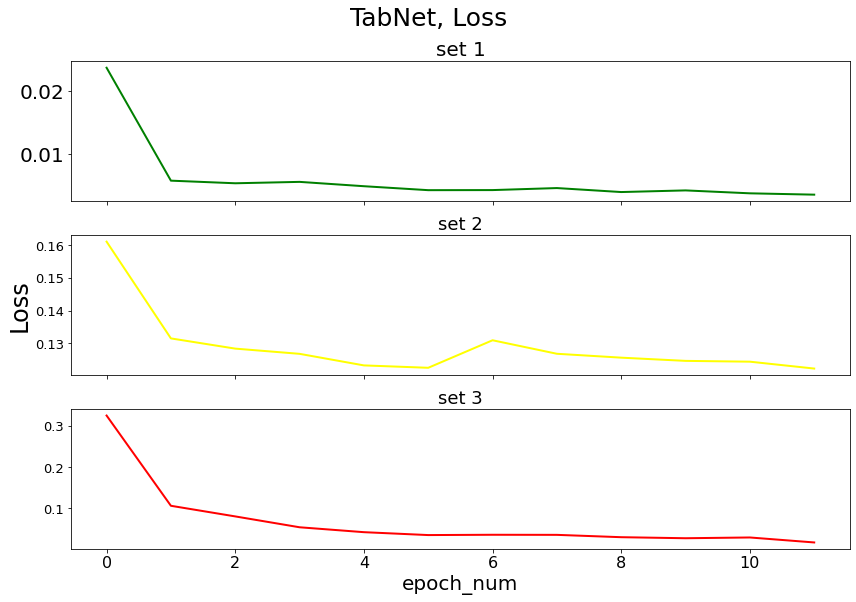

In [ ]:
fig, ax = plt.subplots(3, sharex='col', figsize=(12,8))
plt.suptitle('TabNet, Loss', fontsize = 25,  y=1.04)
ax[0].plot(clf1.history['loss'], color ='green', linewidth=2, markersize=12)
ax[0].set_title('set 1', fontsize=20)
ax[0].yaxis.set_tick_params(labelsize=20)
ax[1].plot(clf2.history['loss'], color ='yellow', linewidth=2, markersize=12)
ax[1].set_ylabel(r"Loss", fontsize=24, color="black")
ax[1].set_title('set 2', fontsize=18)
ax[1].yaxis.set_tick_params(labelsize=13)
ax[2].plot(clf3.history['loss'],color ='red', linewidth=2, markersize=12)
ax[2].set_xlabel('epoch_num', fontsize=20)
ax[2].set_title('set 3',  fontsize=18)
ax[2].xaxis.set_tick_params(labelsize=16)
ax[2].yaxis.set_tick_params(labelsize=13)

plt.tight_layout()
plt.show()


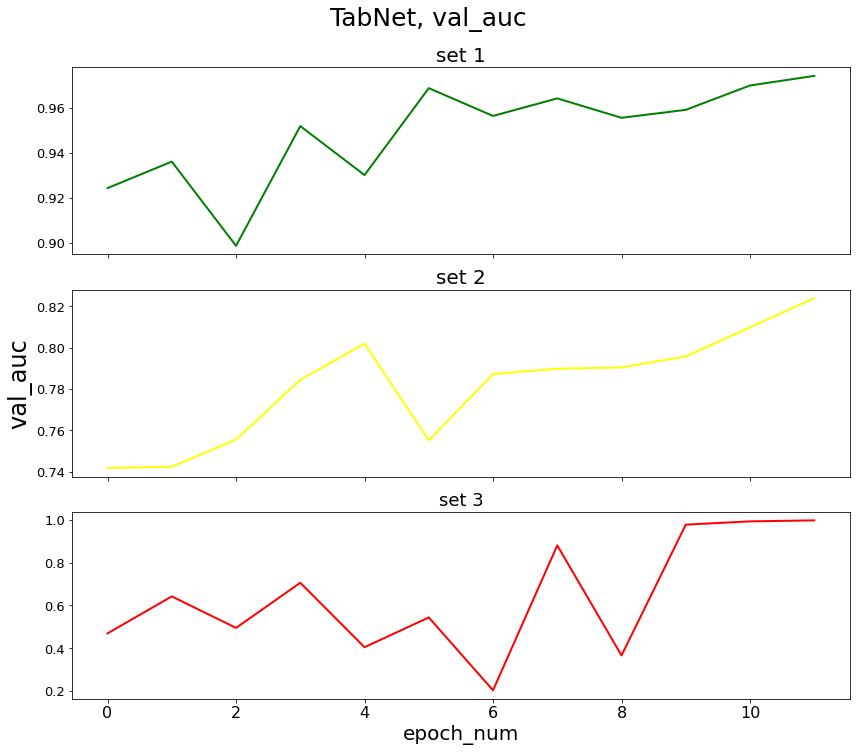

In [ ]:
fig, ax = plt.subplots(3, sharex='col', figsize=(12,10))
plt.suptitle('TabNet, val_auc', fontsize = 25,  y=1.04)
ax[0].plot(clf1.history['val_0_auc'], color ='green', linewidth=2, markersize=12)
ax[0].set_title('set 1', fontsize=20)
ax[0].yaxis.set_tick_params(labelsize=13)
ax[1].plot(clf2.history['val_0_auc'], color ='yellow', linewidth=2, markersize=12)
ax[1].set_ylabel(r"val_auc", fontsize=24, color="black")
ax[1].set_title('set 2', fontsize=20)
ax[1].yaxis.set_tick_params(labelsize=13)
ax[2].plot(clf3.history['val_0_auc'],color ='red', linewidth=2, markersize=12)
ax[2].set_xlabel('epoch_num', fontsize=20)
ax[2].set_title('set 3',  fontsize=18)
ax[2].xaxis.set_tick_params(labelsize=16)
ax[2].yaxis.set_tick_params(labelsize=13)

plt.tight_layout()
plt.show()


###TEST

In [ ]:
predictions1= clf1.predict(X_test1)
predictions2= clf2.predict(X_test2)
predictions3= clf3.predict(X_test3)

CONFUSION MATRICS

In [ ]:
cf_matrix1= confusion_matrix(y_test1, predictions1)
cf_matrix2= confusion_matrix(y_test2, predictions2)
cf_matrix3= confusion_matrix(y_test3, predictions3)

Text(0.5, 0.98, 'CF_MATRIX TabNet')

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


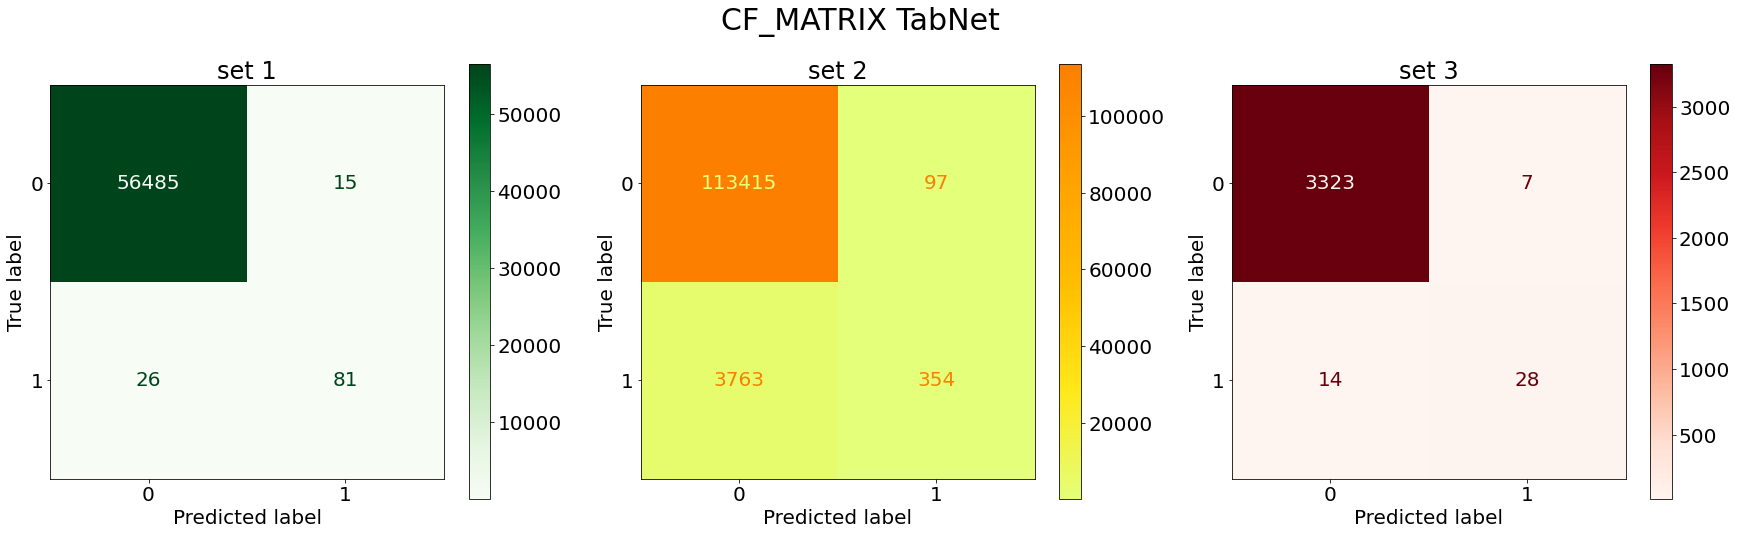

In [ ]:
font = {'family' : 'normal',
     'weight' : 'normal',
    'size'   : 20}
plt.rc('font', **font)

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(30,8))

ax1 =ConfusionMatrixDisplay(confusion_matrix=cf_matrix1).plot(cmap = "Greens", ax=ax1).ax_.set_title('set 1',fontsize =24) 
ax2 = ConfusionMatrixDisplay(confusion_matrix=cf_matrix2).plot(cmap = "Wistia",ax=ax2).ax_.set_title('set 2',fontsize =24) 
ax3 = ConfusionMatrixDisplay(confusion_matrix=cf_matrix3).plot(cmap = "Reds", ax=ax3).ax_.set_title('set 3',fontsize =24) 

plt.suptitle('CF_MATRIX TabNet', fontsize = 30)

AUC,  F1,  ACCURACY

In [ ]:
fpr1, tpr1, _ = roc_curve(y_test1, predictions1, pos_label=1)
Test1_auc= auc(fpr1,tpr1)

fpr2, tpr2, _ = roc_curve(y_test2, predictions2, pos_label=1)
Test2_auc= auc(fpr2,tpr2)

fpr3, tpr3, _ = roc_curve(y_test3, predictions3, pos_label=1)
Test3_auc= auc(fpr3,tpr3)

test1_F1=f1_score(y_test1, predictions1, average='macro')
test2_F1=f1_score(y_test2, predictions2, average='macro')
test3_F1=f1_score(y_test3, predictions3, average='macro')

test1_acc= accuracy_score(y_test1, predictions1)
test2_acc= accuracy_score(y_test2, predictions2)
test3_acc= accuracy_score(y_test3, predictions3)

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


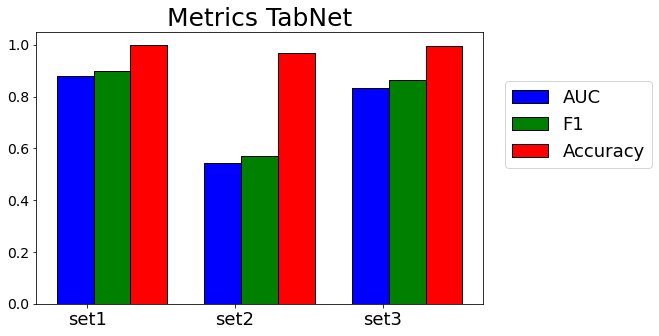

In [ ]:
AUC=[Test1_auc, Test2_auc, Test3_auc]
F1=[test1_F1, test2_F1, test3_F1]
Accuracy=[test1_acc, test2_acc, test3_acc]

plt.rcParams["figure.figsize"] = (8,5)

r = np.arange(3)
width = 0.25

plt.bar(r, AUC, color = 'b',
        width = width, edgecolor = 'black',
        label='AUC')
plt.bar(r + width, F1, color = 'g',
        width = width, edgecolor = 'black',
        label='F1')
plt.bar(r + width*2, Accuracy, color = 'red',
        width = width, edgecolor = 'black',
        label='Accuracy')
  
plt.title("Metrics TabNet", fontsize = 25)
  
plt.xticks(r + width/3,['set1','set2','set3'], fontsize = 18)
plt.legend(fontsize = 18,loc=(1.05, 0.5))
plt.yticks(fontsize = 14)

plt.show()


In [ ]:

print("AUC {} \nF1 {} \nAccuracy {}".format(AUC,F1,Accuracy))

AUC [0.8783719295343644, 0.542565202643661, 0.8322822822822822] 
F1 [0.8988333800541584, 0.569129415985653, 0.8620614423824262] 
Accuracy [0.9992757079513135, 0.9671849628918039, 0.9937722419928826]


###FEATURE IMPORTANCE

In [ ]:
explain_matrix1, mask1=clf1.explain(X_test1)
explain_matrix2, mask2=clf2.explain(X_test2)
explain_matrix3, mask3=clf3.explain(X_test3)

Text(0, 0.5, 'feature importance')

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


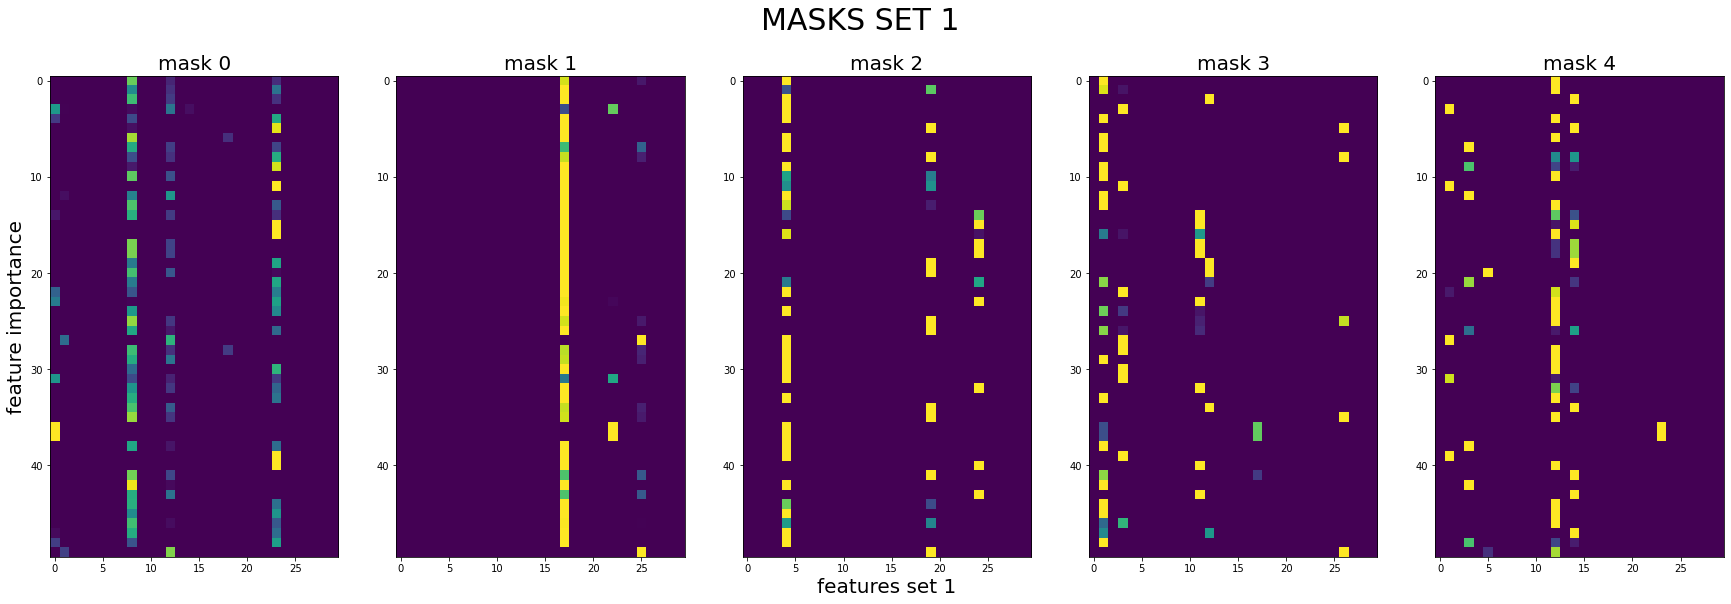

In [ ]:

fig, axs= plt.subplots(1,5, figsize=(30,40))
plt.suptitle('MASKS SET 1', fontsize = 30, y=0.61)
for i in range(5):
  axs[i].imshow(mask1[i][:50])
  axs[i].set_title(f"mask {i}", fontsize =20)
axs[2].set_xlabel('features set 1', fontsize=20)
axs[0].set_ylabel('feature importance', fontsize=20)


In [ ]:
fig, axs= plt.subplots(1,5, figsize=(250,150))
plt.suptitle('MASKS SET 2', fontsize = 30)
for i in range(5):
  axs[i].imshow(mask2[i][:50])
  axs[i].set_title(f"mask {i}", fontsize =20)
axs[2].set_xlabel('features set 2', fontsize=20)
axs[0].set_ylabel('feature importance', fontsize=20)

Text(0, 0.5, 'feature importance')

Text(0, 0.5, 'feature importance')

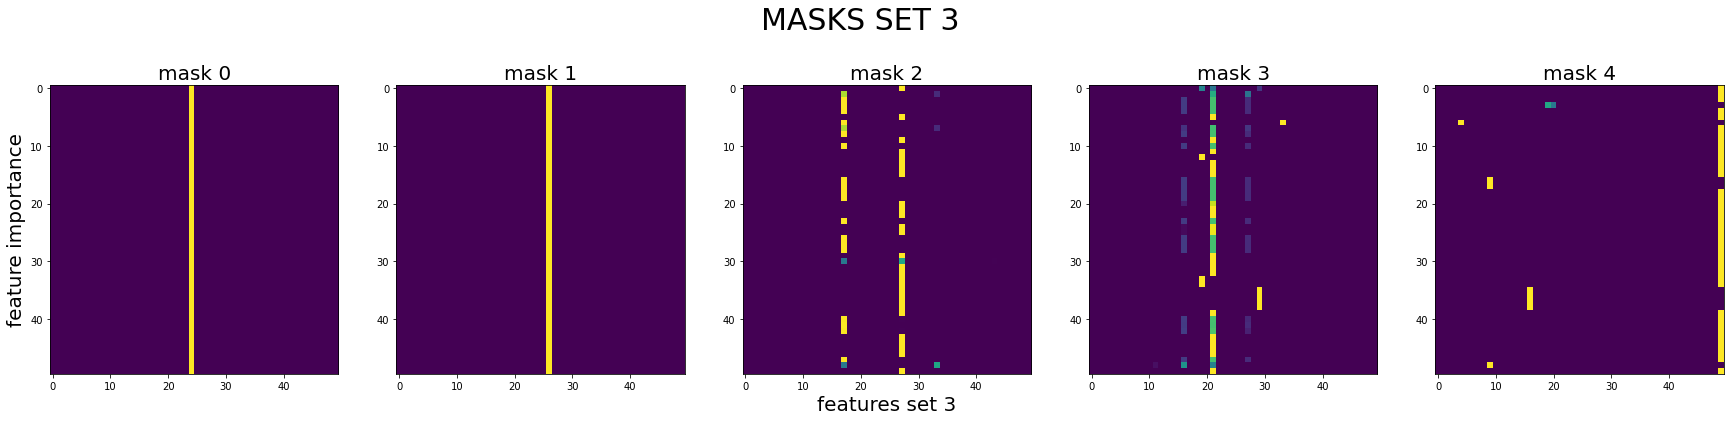

In [ ]:
fig, axs= plt.subplots(1,5, figsize=(30,40))

plt.suptitle('MASKS SET 3', fontsize = 30,  y=0.58)

for i in range(5):
  axs[i].imshow(mask3[i][:50])
  axs[i].set_title(f"mask {i}", fontsize =20)
axs[2].set_xlabel('features set 3', fontsize=20)
axs[0].set_ylabel('feature importance', fontsize=20)

##XGBOOST

In [ ]:
XGB_clf1=XGBClassifier(
    max_depth =5,
    n_estimators = 250,
    learning_rate = 2e-2,
    n_jobs=-1,
    eval_metric=["auc", "logloss"]
)

XGB_clf2=XGBClassifier(
    max_depth =5,
    n_estimators = 250,
    learning_rate = 2e-2,
    n_jobs=-1,
    eval_metric=["auc", "logloss"]
)

XGB_clf3=XGBClassifier(
    max_depth =5,
    n_estimators = 250,
    learning_rate = 2e-2,
    n_jobs=-1,
    eval_metric=["auc", "logloss"]
)


### TRAINING

In [ ]:
XGB_clf1=XGB_clf1.fit( X_train1,y_train1, eval_set =[(X_valid1,y_valid1)],verbose =25)

[0]	validation_0-auc:0.919449	validation_0-logloss:0.673468
[25]	validation_0-auc:0.919448	validation_0-logloss:0.352176
[50]	validation_0-auc:0.919449	validation_0-logloss:0.198941
[75]	validation_0-auc:0.919454	validation_0-logloss:0.116516
[100]	validation_0-auc:0.919427	validation_0-logloss:0.069825
[125]	validation_0-auc:0.919381	validation_0-logloss:0.042635
[150]	validation_0-auc:0.926313	validation_0-logloss:0.026543
[175]	validation_0-auc:0.949634	validation_0-logloss:0.016943
[200]	validation_0-auc:0.953915	validation_0-logloss:0.011202
[225]	validation_0-auc:0.96174	validation_0-logloss:0.007773
[249]	validation_0-auc:0.961667	validation_0-logloss:0.005796


In [ ]:
XGB_clf2=XGB_clf2.fit( X_train2,y_train2, eval_set =[(X_valid2,y_valid2)],verbose =25)

[0]	validation_0-auc:0.77784	validation_0-logloss:0.675753
[25]	validation_0-auc:0.816985	validation_0-logloss:0.387416
[50]	validation_0-auc:0.825614	validation_0-logloss:0.252939
[75]	validation_0-auc:0.829455	validation_0-logloss:0.182758
[100]	validation_0-auc:0.849581	validation_0-logloss:0.14399
[125]	validation_0-auc:0.861845	validation_0-logloss:0.12264
[150]	validation_0-auc:0.869547	validation_0-logloss:0.110846
[175]	validation_0-auc:0.877112	validation_0-logloss:0.103948
[200]	validation_0-auc:0.882615	validation_0-logloss:0.09973
[225]	validation_0-auc:0.886636	validation_0-logloss:0.09679
[249]	validation_0-auc:0.88972	validation_0-logloss:0.09483


In [ ]:
XGB_clf3=XGB_clf3.fit( X_train3,y_train3, eval_set =[(X_valid3,y_valid3)],verbose =25)

[0]	validation_0-auc:0.999137	validation_0-logloss:0.673446
[25]	validation_0-auc:0.999363	validation_0-logloss:0.353257
[50]	validation_0-auc:0.999357	validation_0-logloss:0.200526
[75]	validation_0-auc:0.999366	validation_0-logloss:0.118482
[100]	validation_0-auc:0.999329	validation_0-logloss:0.072019
[125]	validation_0-auc:0.999329	validation_0-logloss:0.045015
[150]	validation_0-auc:0.999366	validation_0-logloss:0.029061
[175]	validation_0-auc:0.999416	validation_0-logloss:0.019585
[200]	validation_0-auc:0.999409	validation_0-logloss:0.013985
[225]	validation_0-auc:0.999372	validation_0-logloss:0.010737
[249]	validation_0-auc:0.999406	validation_0-logloss:0.008822


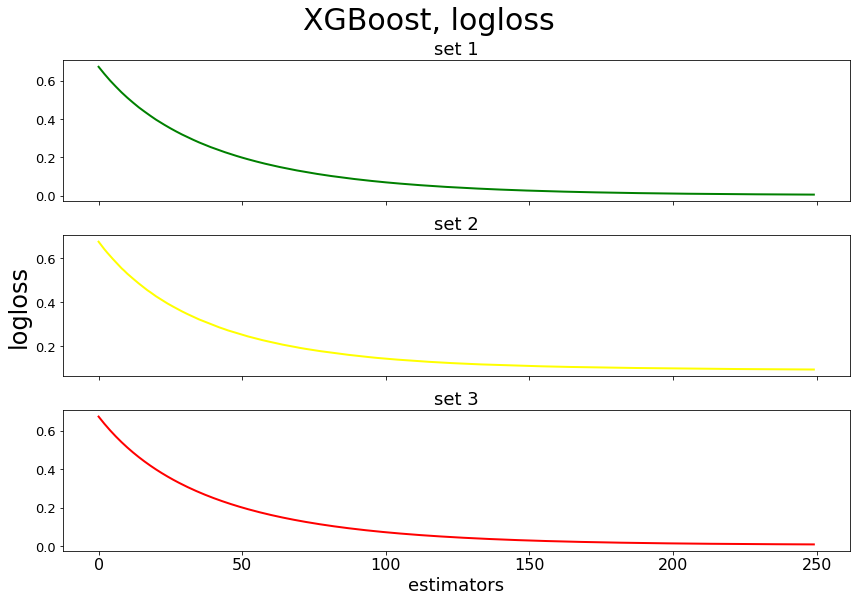

In [ ]:
fig, ax = plt.subplots(3, sharex='col', figsize=(12,8))
plt.suptitle('XGBoost, logloss', fontsize = 30,  y=1.04)
ax[0].plot(XGB_clf1.evals_result()['validation_0']['logloss'], color ='green', linewidth=2, markersize=12)
ax[0].set_title('set 1', fontsize=18)
ax[0].yaxis.set_tick_params(labelsize=13)
ax[1].plot(XGB_clf2.evals_result()['validation_0']['logloss'], color ='yellow', linewidth=2, markersize=12)
ax[1].set_ylabel(r"logloss", fontsize=24, color="black")
ax[1].set_title('set 2', fontsize=18)
ax[1].yaxis.set_tick_params(labelsize=13)
ax[2].plot(XGB_clf3.evals_result()['validation_0']['logloss'],color ='red', linewidth=2, markersize=12)
ax[2].set_xlabel('estimators', fontsize=18)
ax[2].set_title('set 3',  fontsize=18)
ax[2].xaxis.set_tick_params(labelsize=16)
ax[2].yaxis.set_tick_params(labelsize=13)

plt.tight_layout()
plt.show()

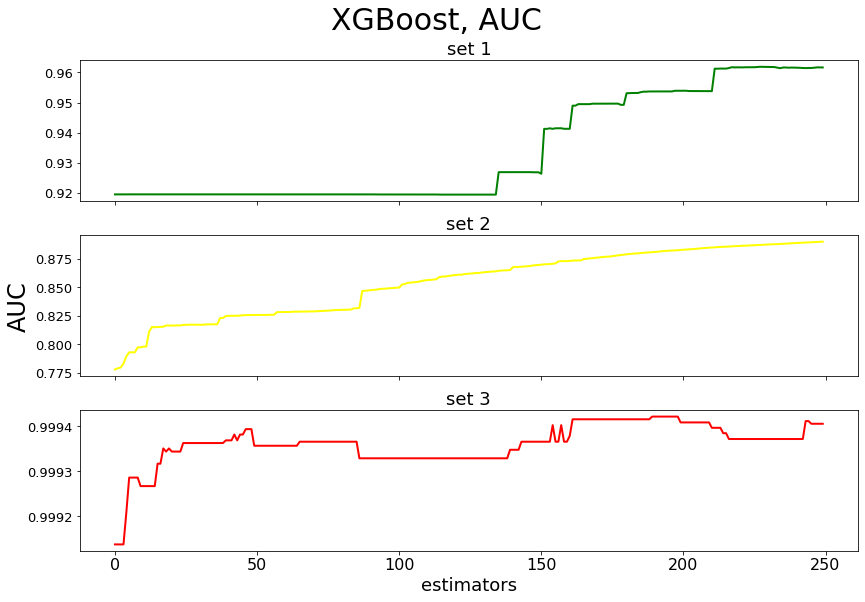

In [ ]:
fig, ax = plt.subplots(3, sharex='col', figsize=(12,8))
plt.suptitle('XGBoost, AUC', fontsize = 30,  y=1.04)
ax[0].plot( XGB_clf1.evals_result()['validation_0']['auc'], color ='green', linewidth=2, markersize=12)
ax[0].set_title('set 1', fontsize=18)
ax[0].yaxis.set_tick_params(labelsize=13)
ax[1].plot( XGB_clf2.evals_result()['validation_0']['auc'], color ='yellow', linewidth=2, markersize=12)
ax[1].set_ylabel(r"AUC", fontsize=24, color="black")
ax[1].set_title('set 2', fontsize=18)
ax[1].yaxis.set_tick_params(labelsize=13)
ax[2].plot( XGB_clf3.evals_result()['validation_0']['auc'],color ='red', linewidth=2, markersize=12)
ax[2].set_xlabel('estimators', fontsize=18)
ax[2].set_title('set 3',  fontsize=18)
ax[2].xaxis.set_tick_params(labelsize=16)
ax[2].yaxis.set_tick_params(labelsize=13)

plt.tight_layout()
plt.show()

###TEST

In [ ]:
predictions_XGB1= XGB_clf1.predict(X_test1)
predictions_XGB2= XGB_clf2.predict(X_test2)
predictions_XGB3= XGB_clf3.predict(X_test3)

CONFUSION MATRIX

In [ ]:
cf_matrix_XGB1= confusion_matrix(y_test1, predictions_XGB1)
cf_matrix_XGB2= confusion_matrix(y_test2, predictions_XGB2)
cf_matrix_XGB3= confusion_matrix(y_test3, predictions_XGB3)

Text(0.5, 0.98, 'CF_MATRIX XGB')

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


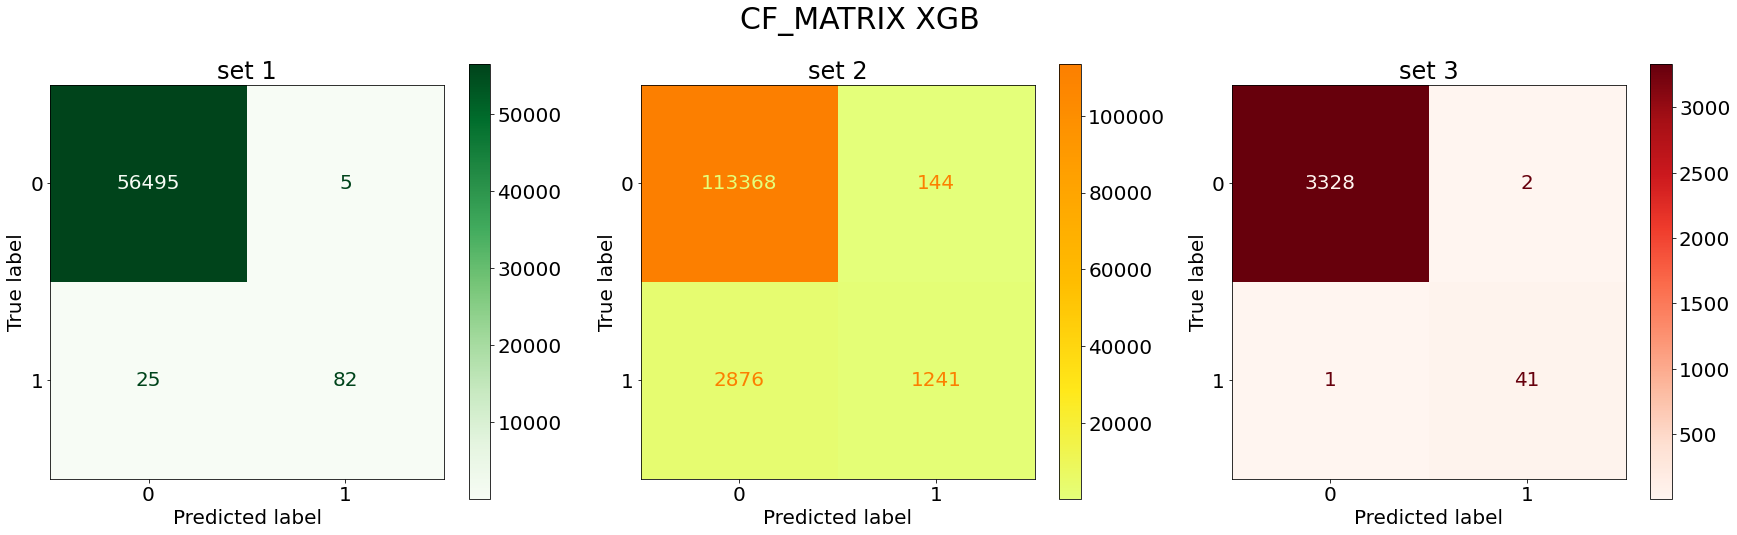

In [ ]:
font = {'family' : 'normal',
     'weight' : 'normal',
    'size'   : 20}
plt.rc('font', **font)

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(30,8))

ax1 =ConfusionMatrixDisplay(confusion_matrix=cf_matrix_XGB1).plot(cmap = "Greens", ax=ax1).ax_.set_title('set 1',fontsize =24) 
ax2 = ConfusionMatrixDisplay(confusion_matrix=cf_matrix_XGB2).plot(cmap = "Wistia",ax=ax2).ax_.set_title('set 2',fontsize =24) 
ax3 = ConfusionMatrixDisplay(confusion_matrix=cf_matrix_XGB3).plot(cmap = "Reds", ax=ax3).ax_.set_title('set 3',fontsize =24) 

plt.suptitle('CF_MATRIX XGB', fontsize = 30)

AUC,  F1,  ACCURACY

In [ ]:
fpr1, tpr1, _ = roc_curve(y_test1, predictions_XGB1, pos_label=1)
Test1_auc= auc(fpr1,tpr1)

fpr2, tpr2, _ = roc_curve(y_test2, predictions_XGB2, pos_label=1)
Test2_auc= auc(fpr2,tpr2)

fpr3, tpr3, _ = roc_curve(y_test3, predictions_XGB3, pos_label=1)
Test3_auc= auc(fpr3,tpr3)

test1_F1=f1_score(y_test1, predictions_XGB1, average='macro')
test2_F1=f1_score(y_test2, predictions_XGB2, average='macro')
test3_F1=f1_score(y_test3, predictions_XGB3, average='macro')

test1_acc= accuracy_score(y_test1, predictions_XGB1)
test2_acc= accuracy_score(y_test2, predictions_XGB2)
test3_acc= accuracy_score(y_test3, predictions_XGB3)

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


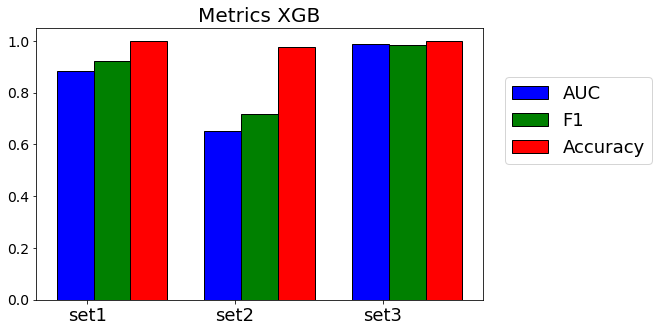

In [ ]:
AUC_XGB=[Test1_auc, Test2_auc, Test3_auc]
F1_XGB=[test1_F1, test2_F1, test3_F1]
Accuracy_XGB=[test1_acc, test2_acc, test3_acc]

plt.rcParams["figure.figsize"] = (8,5)

r = np.arange(3)
width = 0.25

plt.bar(r, AUC_XGB, color = 'b',
        width = width, edgecolor = 'black',
        label='AUC')
plt.bar(r + width, F1_XGB, color = 'g',
        width = width, edgecolor = 'black',
        label='F1')
plt.bar(r + width*2, Accuracy_XGB, color = 'red',
        width = width, edgecolor = 'black',
        label='Accuracy')
  
plt.title("Metrics XGB", fontsize = 20)
  
plt.xticks(r + width/3,['set1','set2','set3'], fontsize = 18)
plt.legend(fontsize = 18,loc=(1.05, 0.5))
plt.yticks(fontsize = 14)

plt.show()


In [ ]:
print("AUC {} \nF1 {} \nAccuracy {}".format(AUC_XGB,F1_XGB,Accuracy_XGB))

AUC [0.8831333223058473, 0.650082246999214, 0.9877949377949378] 
F1 [0.9225476924985452, 0.7189821542476978, 0.9821276821285654] 
Accuracy [0.9994700302082782, 0.9743260590500642, 0.9991103202846975]


###FEATURE IMPORTANCE

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


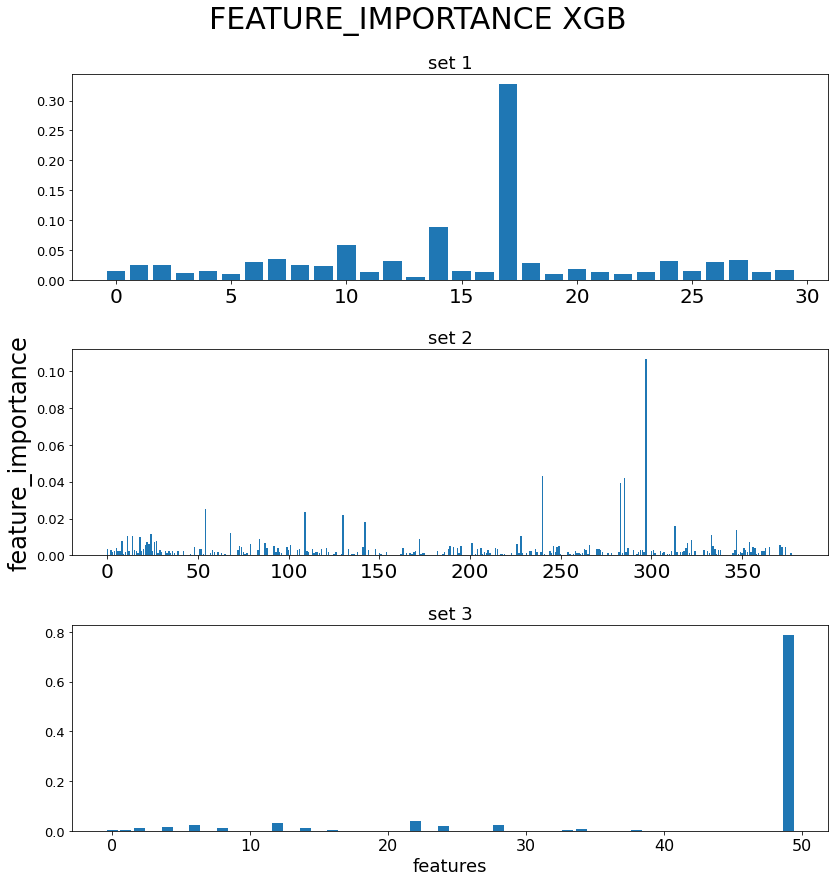

In [ ]:
fig, ax = plt.subplots(3,figsize=(12,12))

plt.suptitle('FEATURE_IMPORTANCE XGB', fontsize = 30,  y=1.03)
ax[0].bar(range(0,len(XGB_clf1.feature_importances_)), XGB_clf1.feature_importances_)
ax[0].set_title('set 1', fontsize=18)
ax[0].yaxis.set_tick_params(labelsize=13)
ax[1].bar(range(0,len(XGB_clf2.feature_importances_)), XGB_clf2.feature_importances_)
ax[1].set_ylabel(r"feature_importance", fontsize=24, color="black")
ax[1].set_title('set 2', fontsize=18)
ax[1].yaxis.set_tick_params(labelsize=13)
ax[2].bar(range(0,len(XGB_clf3.feature_importances_)), XGB_clf3.feature_importances_)
ax[2].set_xlabel('features', fontsize=18)
ax[2].set_title('set 3',  fontsize=18)
ax[2].xaxis.set_tick_params(labelsize=16)
ax[2].yaxis.set_tick_params(labelsize=13)


plt.tight_layout()
plt.show()

##Light GBM

In [ ]:
LGBM_clf1 = LGBMClassifier( max_depth =7,
    n_estimators = 250,
    learning_rate = 2e-2,
    n_jobs=-1,
    eval_metric=["auc", "binary_logloss"],
   )

LGBM_clf2 = LGBMClassifier( max_depth =7,
    n_estimators = 250,
    learning_rate = 2e-2,
    n_jobs=-1,
    eval_metric=["auc", "binary_logloss"])

LGBM_clf3 = LGBMClassifier( max_depth =7,
    n_estimators = 250,
    learning_rate = 2e-2,
    n_jobs=-1,
    eval_metric=["auc","binary_logloss"])


###TRAINING

In [ ]:
LGBM_clf1 = LGBM_clf1.fit( X_train1,y_train1, eval_set =[(X_valid1,y_valid1)], eval_metric="auc",verbose =25)

[25]	valid_0's auc: 0.961521	valid_0's binary_logloss: 0.00412848
[50]	valid_0's auc: 0.969475	valid_0's binary_logloss: 0.00376094
[75]	valid_0's auc: 0.96819	valid_0's binary_logloss: 0.00358822
[100]	valid_0's auc: 0.964614	valid_0's binary_logloss: 0.00352731
[125]	valid_0's auc: 0.964158	valid_0's binary_logloss: 0.00352465
[150]	valid_0's auc: 0.963263	valid_0's binary_logloss: 0.00357016
[175]	valid_0's auc: 0.961134	valid_0's binary_logloss: 0.00364384
[200]	valid_0's auc: 0.960893	valid_0's binary_logloss: 0.00372914
[225]	valid_0's auc: 0.959832	valid_0's binary_logloss: 0.00382308
[250]	valid_0's auc: 0.957207	valid_0's binary_logloss: 0.00391485


In [ ]:
LGBM_clf2 = LGBM_clf2.fit( X_train2,y_train2, eval_set =[(X_valid2,y_valid2)], eval_metric="auc",verbose =25)

[25]	valid_0's auc: 0.863122	valid_0's binary_logloss: 0.115076
[50]	valid_0's auc: 0.873014	valid_0's binary_logloss: 0.10483
[75]	valid_0's auc: 0.880259	valid_0's binary_logloss: 0.0989821
[100]	valid_0's auc: 0.887794	valid_0's binary_logloss: 0.0953302
[125]	valid_0's auc: 0.892463	valid_0's binary_logloss: 0.0928769
[150]	valid_0's auc: 0.896699	valid_0's binary_logloss: 0.0908523
[175]	valid_0's auc: 0.900337	valid_0's binary_logloss: 0.089304
[200]	valid_0's auc: 0.903225	valid_0's binary_logloss: 0.0879828
[225]	valid_0's auc: 0.905923	valid_0's binary_logloss: 0.0868345
[250]	valid_0's auc: 0.908306	valid_0's binary_logloss: 0.0858098


In [ ]:
LGBM_clf3 = LGBM_clf3.fit( X_train3,y_train3, eval_set =[(X_valid3,y_valid3)],eval_metric=['auc'],verbose =25)

[25]	valid_0's auc: 0.999592	valid_0's binary_logloss: 0.0231705
[50]	valid_0's auc: 0.999623	valid_0's binary_logloss: 0.0140079
[75]	valid_0's auc: 0.999635	valid_0's binary_logloss: 0.00968821
[100]	valid_0's auc: 0.999635	valid_0's binary_logloss: 0.00748256
[125]	valid_0's auc: 0.999536	valid_0's binary_logloss: 0.00631752
[150]	valid_0's auc: 0.999524	valid_0's binary_logloss: 0.0057245
[175]	valid_0's auc: 0.999555	valid_0's binary_logloss: 0.00547459
[200]	valid_0's auc: 0.999561	valid_0's binary_logloss: 0.005425
[225]	valid_0's auc: 0.999586	valid_0's binary_logloss: 0.00547953
[250]	valid_0's auc: 0.999598	valid_0's binary_logloss: 0.00548424


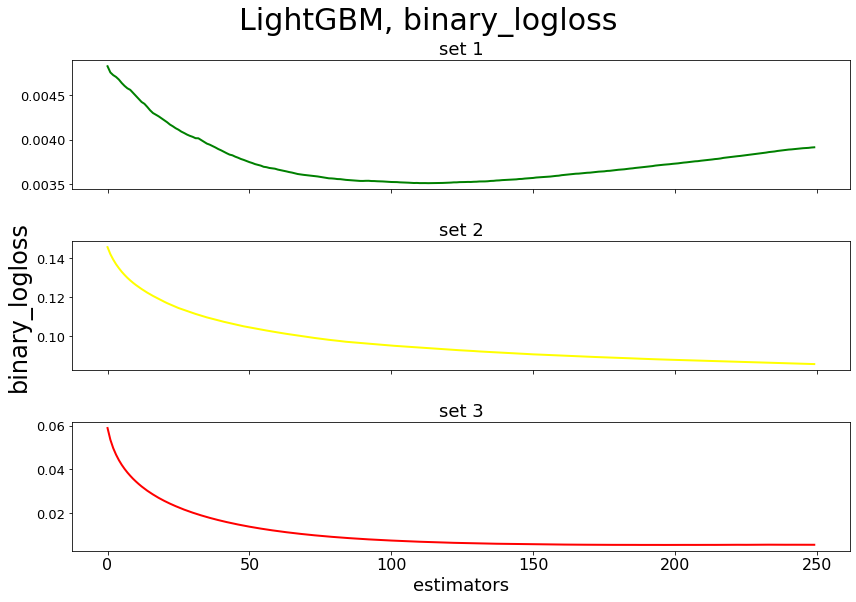

In [ ]:
fig, ax = plt.subplots(3, sharex='col', figsize=(12,8))
plt.suptitle('LightGBM, binary_logloss', fontsize = 30,  y=1.04)
ax[0].plot(LGBM_clf1.evals_result_['valid_0']['binary_logloss'], color ='green', linewidth=2, markersize=12)
ax[0].set_title('set 1', fontsize=18)
ax[0].yaxis.set_tick_params(labelsize=13)
ax[1].plot(LGBM_clf2.evals_result_['valid_0']['binary_logloss'], color ='yellow', linewidth=2, markersize=12)
ax[1].set_ylabel(r"binary_logloss", fontsize=24, color="black")
ax[1].set_title('set 2', fontsize=18)
ax[1].yaxis.set_tick_params(labelsize=13)
ax[2].plot(LGBM_clf3.evals_result_['valid_0']['binary_logloss'],color ='red', linewidth=2, markersize=12)
ax[2].set_xlabel('estimators', fontsize=18)
ax[2].set_title('set 3',  fontsize=18)
ax[2].xaxis.set_tick_params(labelsize=16)
ax[2].yaxis.set_tick_params(labelsize=13)

plt.tight_layout()
plt.show()

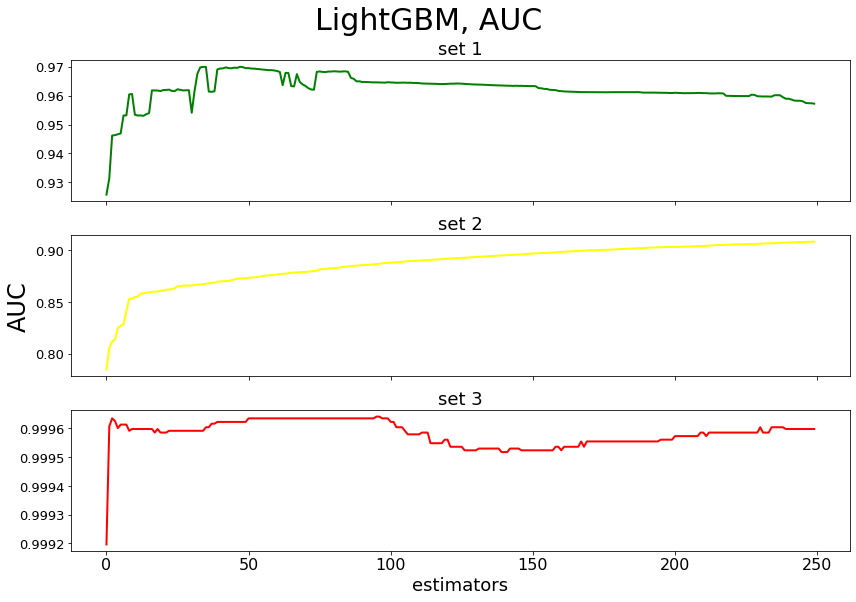

In [ ]:
fig, ax = plt.subplots(3, sharex='col', figsize=(12,8))
plt.suptitle('LightGBM, AUC', fontsize = 30,  y=1.04)
ax[0].plot( LGBM_clf1.evals_result_['valid_0']['auc'], color ='green', linewidth=2, markersize=12)
ax[0].set_title('set 1', fontsize=18)
ax[0].yaxis.set_tick_params(labelsize=13)
ax[1].plot(LGBM_clf2.evals_result_['valid_0']['auc'], color ='yellow', linewidth=2, markersize=12)
ax[1].set_ylabel(r"AUC", fontsize=24, color="black")
ax[1].set_title('set 2', fontsize=18)
ax[1].yaxis.set_tick_params(labelsize=13)
ax[2].plot( LGBM_clf3.evals_result_['valid_0']['auc'],color ='red', linewidth=2, markersize=12)
ax[2].set_xlabel('estimators', fontsize=18)
ax[2].set_title('set 3',  fontsize=18)
ax[2].xaxis.set_tick_params(labelsize=16)
ax[2].yaxis.set_tick_params(labelsize=13)

plt.tight_layout()
plt.show()

###TEST

In [ ]:
predictions_LGBM1= LGBM_clf1.predict(X_test1)
predictions_LGBM2= LGBM_clf2.predict(X_test2)
predictions_LGBM3= LGBM_clf3.predict(X_test3)

CONFUSION MATRIX

In [ ]:
cf_matrix_LGBM1= confusion_matrix(y_test1, predictions_LGBM1)
cf_matrix_LGBM2= confusion_matrix(y_test2, predictions_LGBM2)
cf_matrix_LGBM3= confusion_matrix(y_test3, predictions_LGBM3)

Text(0.5, 0.98, 'CF_MATRIX LGBM')

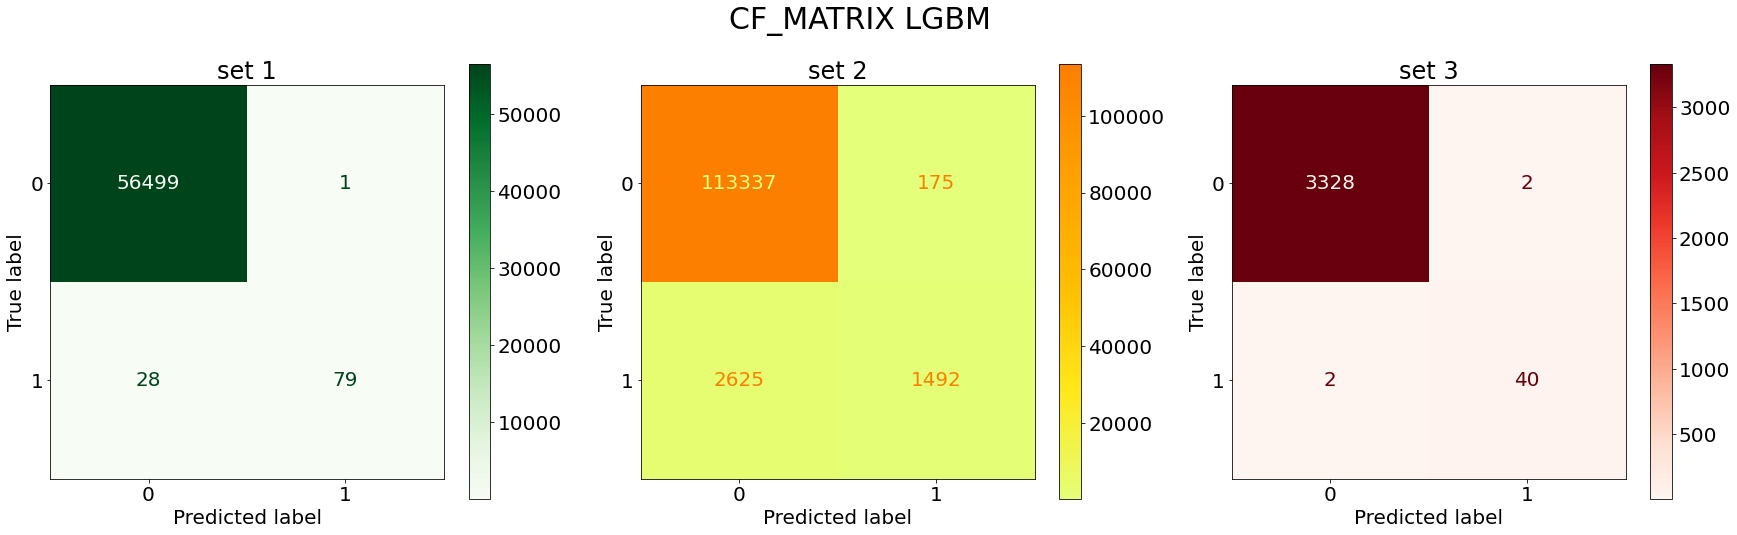

In [ ]:
font = {'family' : 'normal',
     'weight' : 'normal',
    'size'   : 20}
plt.rc('font', **font)

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(30,8))

ax1 =ConfusionMatrixDisplay(confusion_matrix=cf_matrix_LGBM1).plot(cmap = "Greens", ax=ax1).ax_.set_title('set 1',fontsize =24) 
ax2 = ConfusionMatrixDisplay(confusion_matrix=cf_matrix_LGBM2).plot(cmap = "Wistia",ax=ax2).ax_.set_title('set 2',fontsize =24) 
ax3 = ConfusionMatrixDisplay(confusion_matrix=cf_matrix_LGBM3).plot(cmap = "Reds", ax=ax3).ax_.set_title('set 3',fontsize =24) 

plt.suptitle('CF_MATRIX LGBM', fontsize = 30)

AUC, F1, ACCURACY

In [ ]:
fpr1, tpr1, _ = roc_curve(y_test1, predictions_LGBM1, pos_label=1)
Test1_auc= auc(fpr1,tpr1)

fpr2, tpr2, _ = roc_curve(y_test2, predictions_LGBM2, pos_label=1)
Test2_auc= auc(fpr2,tpr2)

fpr3, tpr3, _ = roc_curve(y_test3, predictions_LGBM3, pos_label=1)
Test3_auc= auc(fpr3,tpr3)

test1_F1=f1_score(y_test1, predictions_LGBM1, average='macro')
test2_F1=f1_score(y_test2, predictions_LGBM2, average='macro')
test3_F1=f1_score(y_test3, predictions_LGBM3, average='macro')

test1_acc= accuracy_score(y_test1, predictions_LGBM1)
test2_acc= accuracy_score(y_test2, predictions_LGBM2)
test3_acc= accuracy_score(y_test3, predictions_LGBM3)

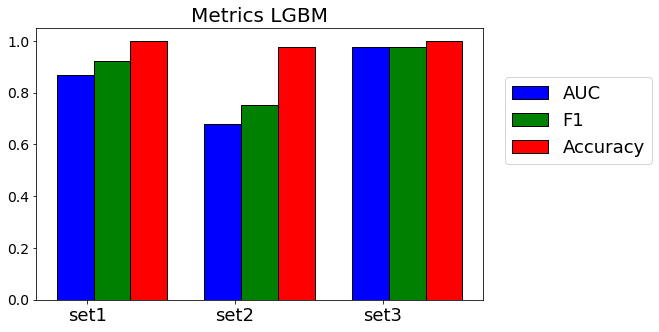

In [ ]:
AUC_LGBM=[Test1_auc, Test2_auc, Test3_auc]
F1_LGBM=[test1_F1, test2_F1, test3_F1]
Accuracy_LGBM=[test1_acc, test2_acc, test3_acc]

plt.rcParams["figure.figsize"] = (8,5)

r = np.arange(3)
width = 0.25

plt.bar(r, AUC_LGBM, color = 'b',
        width = width, edgecolor = 'black',
        label='AUC')
plt.bar(r + width, F1_LGBM, color = 'g',
        width = width, edgecolor = 'black',
        label='F1')
plt.bar(r + width*2, Accuracy_LGBM, color = 'red',
        width = width, edgecolor = 'black',
        label='Accuracy')
  
plt.title("Metrics LGBM", fontsize = 20)
  
plt.xticks(r + width/3,['set1','set2','set3'], fontsize = 18)
plt.legend(fontsize = 18,loc=(1.05, 0.5))
plt.yticks(fontsize = 14)

plt.show()

In [ ]:
print("AUC {} \nF1 {} \nAccuracy {}".format(AUC_LGBM,F1_LGBM,Accuracy_LGBM))

AUC [0.8691500289471508, 0.680429059230627, 0.9758901758901758] 
F1 [0.9223316051169261, 0.7518520646851623, 0.9758901758901759] 
Accuracy [0.9994876958680022, 0.9761963461391323, 0.9988137603795967]


###FEATURE IMPORTANCE

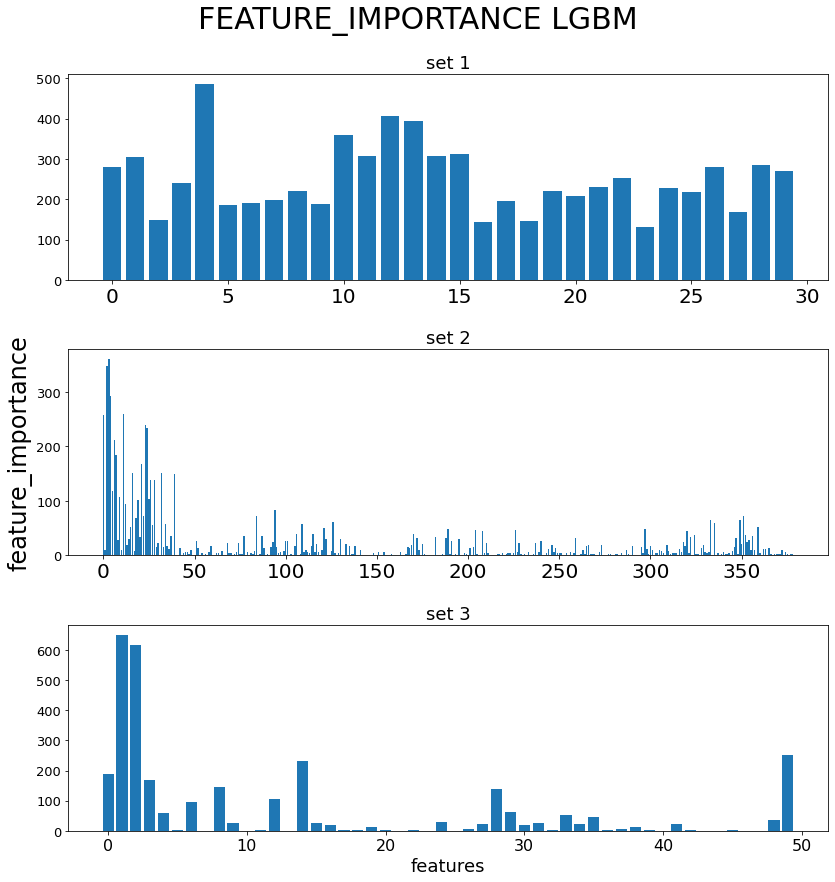

In [ ]:
fig, ax = plt.subplots(3,figsize=(12,12))

plt.suptitle('FEATURE_IMPORTANCE LGBM', fontsize = 30,  y=1.03)
ax[0].bar(range(0,len(LGBM_clf1.feature_importances_)), LGBM_clf1.feature_importances_)
ax[0].set_title('set 1', fontsize=18)
ax[0].yaxis.set_tick_params(labelsize=13)
ax[1].bar(range(0,len(LGBM_clf2.feature_importances_)), LGBM_clf2.feature_importances_)
ax[1].set_ylabel(r"feature_importance", fontsize=24, color="black")
ax[1].set_title('set 2', fontsize=18)
ax[1].yaxis.set_tick_params(labelsize=13)
ax[2].bar(range(0,len(LGBM_clf3.feature_importances_)), LGBM_clf3.feature_importances_)
ax[2].set_xlabel('features', fontsize=18)
ax[2].set_title('set 3',  fontsize=18)
ax[2].xaxis.set_tick_params(labelsize=16)
ax[2].yaxis.set_tick_params(labelsize=13)


plt.tight_layout()
plt.show()


# OVERSAMPLING

In [ ]:
sm = SMOTE(random_state=42)

#### oversampled valid, train  saved

In [ ]:
# VALID write

# X_valid1_sm, y_valid1_sm = sm.fit_resample(X_valid1, y_valid1)
# X_valid2_sm, y_valid2_sm = sm.fit_resample(X_valid2, y_valid2)
# X_valid3_sm, y_valid3_sm = sm.fit_resample(X_valid3, y_valid3)

# with open('/content/gdrive/MyDrive/TabNet/data_sm/X_valid2_sm.txt', 'w') as f:
#     np.savetxt(f, X_valid2_sm)
# with open('/content/gdrive/MyDrive/TabNet/data_sm/y_valid2_sm.txt', 'w') as f:
#     np.savetxt(f, y_valid2_sm)
# with open('/content/gdrive/MyDrive/TabNet/data_sm/X_valid1_sm.txt', 'w') as f:
#     np.savetxt(f, X_valid1_sm)
# with open('/content/gdrive/MyDrive/TabNet/data_sm/y_valid1_sm.txt', 'w') as f:
#     np.savetxt(f, y_valid1_sm)
# with open('/content/gdrive/MyDrive/TabNet/data_sm/X_valid3_sm.txt', 'w') as f:
#     np.savetxt(f, X_valid3_sm)
# with open('/content/gdrive/MyDrive/TabNet/data_sm/y_valid3_sm.txt', 'w') as f:
#     np.savetxt(f, y_valid3_sm)

# VALID read
with open('/content/gdrive/MyDrive/TabNet/data_sm/X_valid2_sm.txt', 'r') as f:
    X_valid2_sm = np.loadtxt(f)
with open('/content/gdrive/MyDrive/TabNet/data_sm/y_valid2_sm.txt', 'r') as f:
    y_valid2_sm = np.loadtxt(f)
with open('/content/gdrive/MyDrive/TabNet/data_sm/X_valid1_sm.txt', 'r') as f:
    X_valid1_sm = np.loadtxt(f)
with open('/content/gdrive/MyDrive/TabNet/data_sm/y_valid1_sm.txt', 'r') as f:
    y_valid1_sm = np.loadtxt(f)
with open('/content/gdrive/MyDrive/TabNet/data_sm/X_valid3_sm.txt', 'r') as f:
    X_valid3_sm = np.loadtxt(f)
with open('/content/gdrive/MyDrive/TabNet/data_sm/y_valid3_sm.txt', 'r') as f:
    y_valid3_sm = np.loadtxt(f)


In [ ]:
# write smote TRAIN

# X_train1_sm, y_train1_sm = sm.fit_resample(X_train1, y_train1)
X_train2_sm, y_train2_sm = sm.fit_resample(X_train2, y_train2)
# X_train3_sm, y_train3_sm = sm.fit_resample(X_train3, y_train3)

# with open('/content/gdrive/MyDrive/TabNet/data_sm/X_train2_sm.txt', 'w') as f:
#     np.savetxt(f, X_train2_sm)
# with open('/content/gdrive/MyDrive/TabNet/data_sm/y_train2_sm.txt', 'w') as f:
#     np.savetxt(f, y_train2_sm)
# with open('/content/gdrive/MyDrive/TabNet/data_sm/X_train1_sm.txt', 'w') as f:
#     np.savetxt(f, X_train1_sm)
# with open('/content/gdrive/MyDrive/TabNet/data_sm/y_train1_sm.txt', 'w') as f:
#     np.savetxt(f, y_train1_sm)
# with open('/content/gdrive/MyDrive/TabNet/data_sm/X_train3_sm.txt', 'w') as f:
#     np.savetxt(f, X_train3_sm)
# with open('/content/gdrive/MyDrive/TabNet/data_sm/y_train3_sm.txt', 'w') as f:
#     np.savetxt(f, y_train3_sm)

# read smote TRAIN
# with open('/content/gdrive/MyDrive/TabNet/data_sm/X_train2_sm.txt', 'r') as f:
#     X_train2_sm = np.loadtxt(f)
# with open('/content/gdrive/MyDrive/TabNet/data_sm/y_train2_sm.txt', 'r') as f:
#     y_train2_sm = np.loadtxt(f)
with open('/content/gdrive/MyDrive/TabNet/data_sm/X_train1_sm.txt', 'r') as f:
    X_train1_sm = np.loadtxt(f)
with open('/content/gdrive/MyDrive/TabNet/data_sm/y_train1_sm.txt', 'r') as f:
    y_train1_sm = np.loadtxt(f)
with open('/content/gdrive/MyDrive/TabNet/data_sm/X_train3_sm.txt', 'r') as f:
    X_train3_sm = np.loadtxt(f)
with open('/content/gdrive/MyDrive/TabNet/data_sm/y_train3_sm.txt', 'r') as f:
    y_train3_sm = np.loadtxt(f)


In [ ]:
X_train2_sm.shape

(685356, 379)

##TABNET + SMOTE

###TRAINING

In [ ]:
clf1.fit( X_train=  X_train1_sm, y_train= y_train1_sm,
   eval_set=[(X_valid1, y_valid1)],eval_metric=["auc"], patience =20,
    max_epochs=12, batch_size=1024, virtual_batch_size = 150) 

epoch 0  | loss: 0.13545 | val_0_auc: 0.97437 |  0:00:47s
epoch 1  | loss: 0.07723 | val_0_auc: 0.96554 |  0:01:34s
epoch 2  | loss: 0.05078 | val_0_auc: 0.96012 |  0:02:19s
epoch 3  | loss: 0.04664 | val_0_auc: 0.96215 |  0:02:46s
epoch 4  | loss: 0.03696 | val_0_auc: 0.9598  |  0:03:14s
epoch 5  | loss: 0.02756 | val_0_auc: 0.95152 |  0:03:40s
epoch 6  | loss: 0.02327 | val_0_auc: 0.95195 |  0:04:08s
epoch 7  | loss: 0.02074 | val_0_auc: 0.95014 |  0:04:42s
epoch 8  | loss: 0.01768 | val_0_auc: 0.95445 |  0:05:27s
epoch 9  | loss: 0.01509 | val_0_auc: 0.94507 |  0:06:05s
epoch 10 | loss: 0.01204 | val_0_auc: 0.95283 |  0:06:33s
epoch 11 | loss: 0.0096  | val_0_auc: 0.96273 |  0:07:01s
Stop training because you reached max_epochs = 12 with best_epoch = 0 and best_val_0_auc = 0.97437
Best weights from best epoch are automatically used!


In [ ]:
clf2.fit( X_train=  X_train2_sm, y_train= y_train2_sm,
   eval_set=[(X_valid2, y_valid2)],eval_metric=["auc"], patience =20,
    max_epochs=12, batch_size=1024, virtual_batch_size = 150) 

epoch 0  | loss: 0.46013 | val_0_auc: 0.78019 |  0:04:40s
epoch 1  | loss: 0.34301 | val_0_auc: 0.52842 |  0:09:16s
epoch 2  | loss: 0.30112 | val_0_auc: 0.82599 |  0:13:45s
epoch 3  | loss: 0.33126 | val_0_auc: 0.82955 |  0:18:19s
epoch 4  | loss: 0.30273 | val_0_auc: 0.73204 |  0:23:08s
epoch 5  | loss: 0.25921 | val_0_auc: 0.62908 |  0:27:33s
epoch 6  | loss: 0.2528  | val_0_auc: 0.7484  |  0:31:57s
epoch 7  | loss: 0.24005 | val_0_auc: 0.54281 |  0:36:39s
epoch 8  | loss: 0.23737 | val_0_auc: 0.808   |  0:41:01s
epoch 9  | loss: 0.28992 | val_0_auc: 0.84918 |  0:45:20s
epoch 10 | loss: 0.2578  | val_0_auc: 0.84918 |  0:49:29s
epoch 11 | loss: 0.22087 | val_0_auc: 0.83548 |  0:53:40s
Stop training because you reached max_epochs = 12 with best_epoch = 10 and best_val_0_auc = 0.84918
Best weights from best epoch are automatically used!


In [ ]:
clf3.fit( X_train=  X_train3_sm, y_train= y_train3_sm,
   eval_set=[(X_valid3, y_valid3)],eval_metric=["auc"], patience =20,
    max_epochs=12, batch_size=1024, virtual_batch_size = 150) 

epoch 0  | loss: 0.51447 | val_0_auc: 0.46719 |  0:00:01s
epoch 1  | loss: 0.20681 | val_0_auc: 0.77424 |  0:00:03s
epoch 2  | loss: 0.12519 | val_0_auc: 0.52455 |  0:00:05s
epoch 3  | loss: 0.08901 | val_0_auc: 0.41769 |  0:00:07s
epoch 4  | loss: 0.0624  | val_0_auc: 0.86677 |  0:00:08s
epoch 5  | loss: 0.02022 | val_0_auc: 0.97886 |  0:00:10s
epoch 6  | loss: 0.01247 | val_0_auc: 0.99825 |  0:00:12s
epoch 7  | loss: 0.00901 | val_0_auc: 0.81135 |  0:00:14s
epoch 8  | loss: 0.00745 | val_0_auc: 0.94402 |  0:00:15s
epoch 9  | loss: 0.00538 | val_0_auc: 0.76613 |  0:00:17s
epoch 10 | loss: 0.00538 | val_0_auc: 0.77269 |  0:00:19s
epoch 11 | loss: 0.00525 | val_0_auc: 0.8388  |  0:00:21s
Stop training because you reached max_epochs = 12 with best_epoch = 6 and best_val_0_auc = 0.99825
Best weights from best epoch are automatically used!


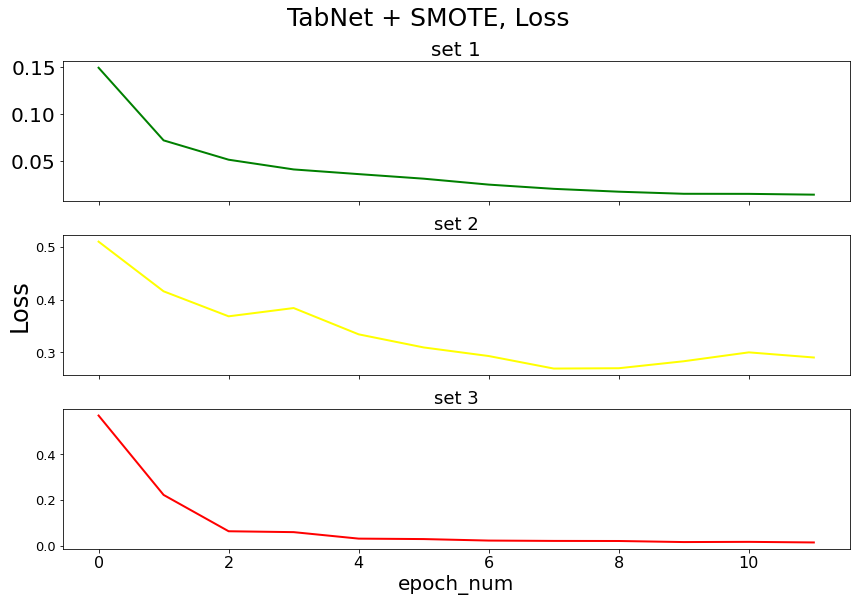

In [ ]:
fig, ax = plt.subplots(3, sharex='col', figsize=(12,8))
plt.suptitle('TabNet + SMOTE, Loss', fontsize = 25,  y=1.04)
ax[0].plot(clf1.history['loss'], color ='green', linewidth=2, markersize=12)
ax[0].set_title('set 1', fontsize=20)
ax[0].yaxis.set_tick_params(labelsize=20)
ax[1].plot(clf2.history['loss'], color ='yellow', linewidth=2, markersize=12)
ax[1].set_ylabel(r"Loss", fontsize=24, color="black")
ax[1].set_title('set 2', fontsize=18)
ax[1].yaxis.set_tick_params(labelsize=13)
ax[2].plot(clf3.history['loss'],color ='red', linewidth=2, markersize=12)
ax[2].set_xlabel('epoch_num', fontsize=20)
ax[2].set_title('set 3',  fontsize=18)
ax[2].xaxis.set_tick_params(labelsize=16)
ax[2].yaxis.set_tick_params(labelsize=13)

plt.tight_layout()
plt.show()

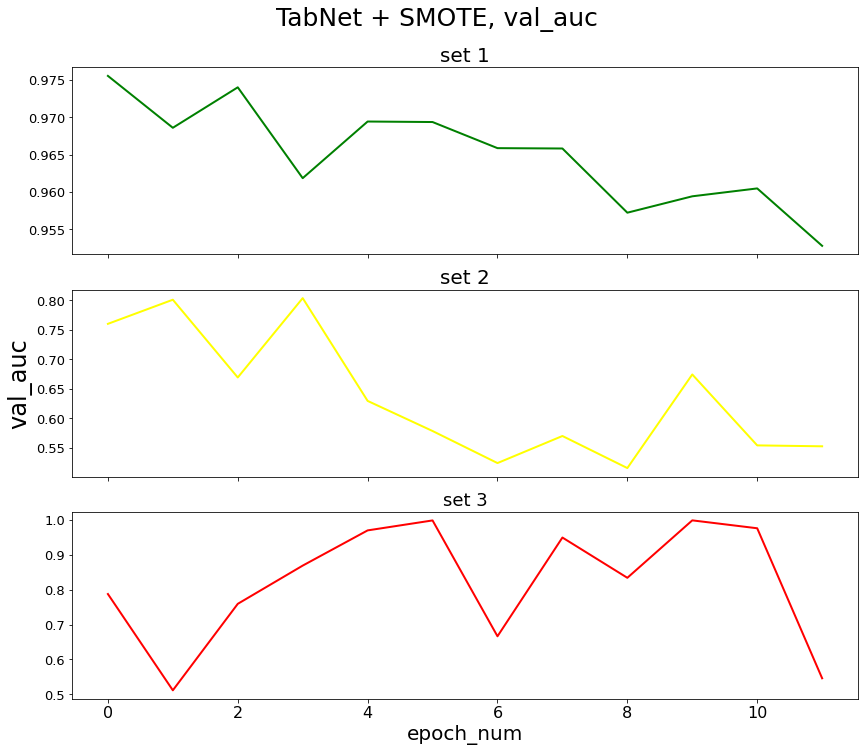

In [ ]:
fig, ax = plt.subplots(3, sharex='col', figsize=(12,10))
plt.suptitle('TabNet + SMOTE, val_auc', fontsize = 25,  y=1.04)
ax[0].plot(clf1.history['val_0_auc'], color ='green', linewidth=2, markersize=12)
ax[0].set_title('set 1', fontsize=20)
ax[0].yaxis.set_tick_params(labelsize=13)
ax[1].plot(clf2.history['val_0_auc'], color ='yellow', linewidth=2, markersize=12)
ax[1].set_ylabel(r"val_auc", fontsize=24, color="black")
ax[1].set_title('set 2', fontsize=20)
ax[1].yaxis.set_tick_params(labelsize=13)
ax[2].plot(clf3.history['val_0_auc'],color ='red', linewidth=2, markersize=12)
ax[2].set_xlabel('epoch_num', fontsize=20)
ax[2].set_title('set 3',  fontsize=18)
ax[2].xaxis.set_tick_params(labelsize=16)
ax[2].yaxis.set_tick_params(labelsize=13)

plt.tight_layout()
plt.show()

### TEST

In [ ]:
predictions1_sm = clf1.predict(X_test1)
predictions2_sm = clf2.predict(X_test2)
predictions3_sm = clf3.predict(X_test3)

CONFUSION MATRIX

In [ ]:
cf_matrix1= confusion_matrix(y_test1, predictions1_sm)
cf_matrix2= confusion_matrix(y_test2, predictions2_sm)
cf_matrix3= confusion_matrix(y_test3, predictions3_sm)

Text(0.5, 0.98, 'CF_MATRIX TabNet + SMOTE')

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


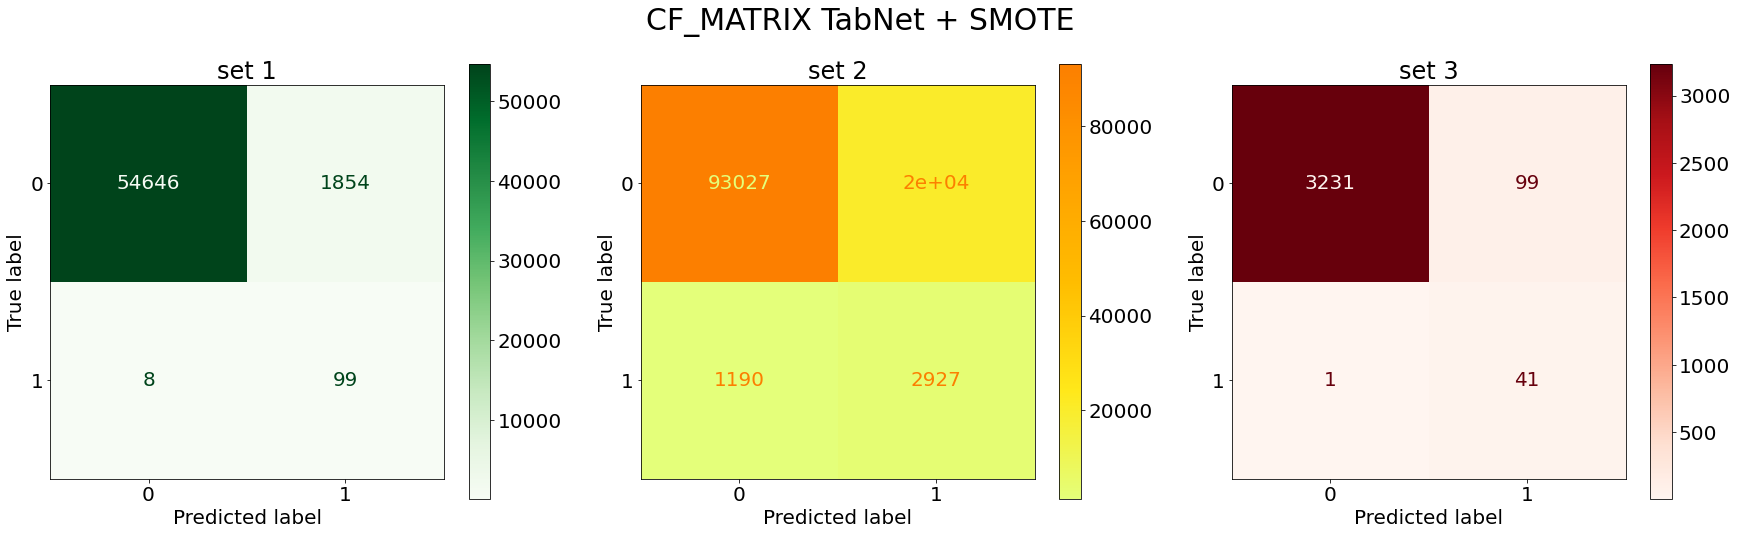

In [ ]:
font = {'family' : 'normal',
     'weight' : 'normal',
    'size'   : 20}
plt.rc('font', **font)

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(30,8))

ax1 =ConfusionMatrixDisplay(confusion_matrix=cf_matrix1).plot(cmap = "Greens", ax=ax1).ax_.set_title('set 1',fontsize =24) 
ax2 = ConfusionMatrixDisplay(confusion_matrix=cf_matrix2).plot(cmap = "Wistia",ax=ax2).ax_.set_title('set 2',fontsize =24) 
ax3 = ConfusionMatrixDisplay(confusion_matrix=cf_matrix3).plot(cmap = "Reds", ax=ax3).ax_.set_title('set 3',fontsize =24) 

plt.suptitle('CF_MATRIX TabNet + SMOTE', fontsize = 30)

In [ ]:
fpr1, tpr1, _ = roc_curve(y_test1, predictions1_sm, pos_label=1)
Test1_auc= auc(fpr1,tpr1)

fpr2, tpr2, _ = roc_curve(y_test2, predictions2_sm, pos_label=1)
Test2_auc= auc(fpr2,tpr2)

fpr3, tpr3, _ = roc_curve(y_test3, predictions3_sm, pos_label=1)
Test3_auc= auc(fpr3,tpr3)

test1_F1=f1_score(y_test1, predictions1_sm, average='macro')
test2_F1=f1_score(y_test2, predictions2_sm, average='macro')
test3_F1=f1_score(y_test3, predictions3_sm, average='macro')

test1_acc= accuracy_score(y_test1, predictions1_sm)
test2_acc= accuracy_score(y_test2, predictions2_sm)
test3_acc= accuracy_score(y_test3, predictions3_sm)

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


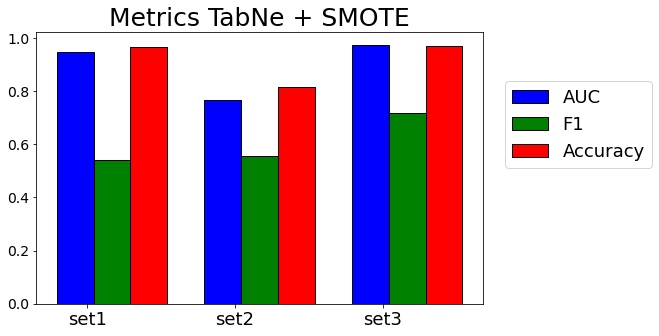

In [ ]:
AUC=[Test1_auc, Test2_auc, Test3_auc]
F1=[test1_F1, test2_F1, test3_F1]
Accuracy=[test1_acc, test2_acc, test3_acc]

plt.rcParams["figure.figsize"] = (8,5)

r = np.arange(3)
width = 0.25

plt.bar(r, AUC, color = 'b',
        width = width, edgecolor = 'black',
        label='AUC')
plt.bar(r + width, F1, color = 'g',
        width = width, edgecolor = 'black',
        label='F1')
plt.bar(r + width*2, Accuracy, color = 'red',
        width = width, edgecolor = 'black',
        label='Accuracy')
  
plt.title("Metrics TabNe + SMOTE", fontsize = 25)
  
plt.xticks(r + width/3,['set1','set2','set3'], fontsize = 18)
plt.legend(fontsize = 18,loc=(1.05, 0.5))
plt.yticks(fontsize = 14)

plt.show()

In [ ]:
print("AUC {} \nF1 {} \nAccuracy {}".format(AUC,F1,Accuracy))

AUC [0.9462097427838889, 0.7652445385659261, 0.9732303732303732] 
F1 [0.5396824854732286, 0.5541529012734108, 0.7176550971125796] 
Accuracy [0.9671065415937958, 0.8157342152020335, 0.970344009489917]


### FEATURE IMPORTANCE

In [ ]:
explain_matrix1, mask1=clf1.explain(X_test1)
explain_matrix2, mask2=clf2.explain(X_test2)
explain_matrix3, mask3=clf3.explain(X_test3)

Text(0, 0.5, 'feature importance')

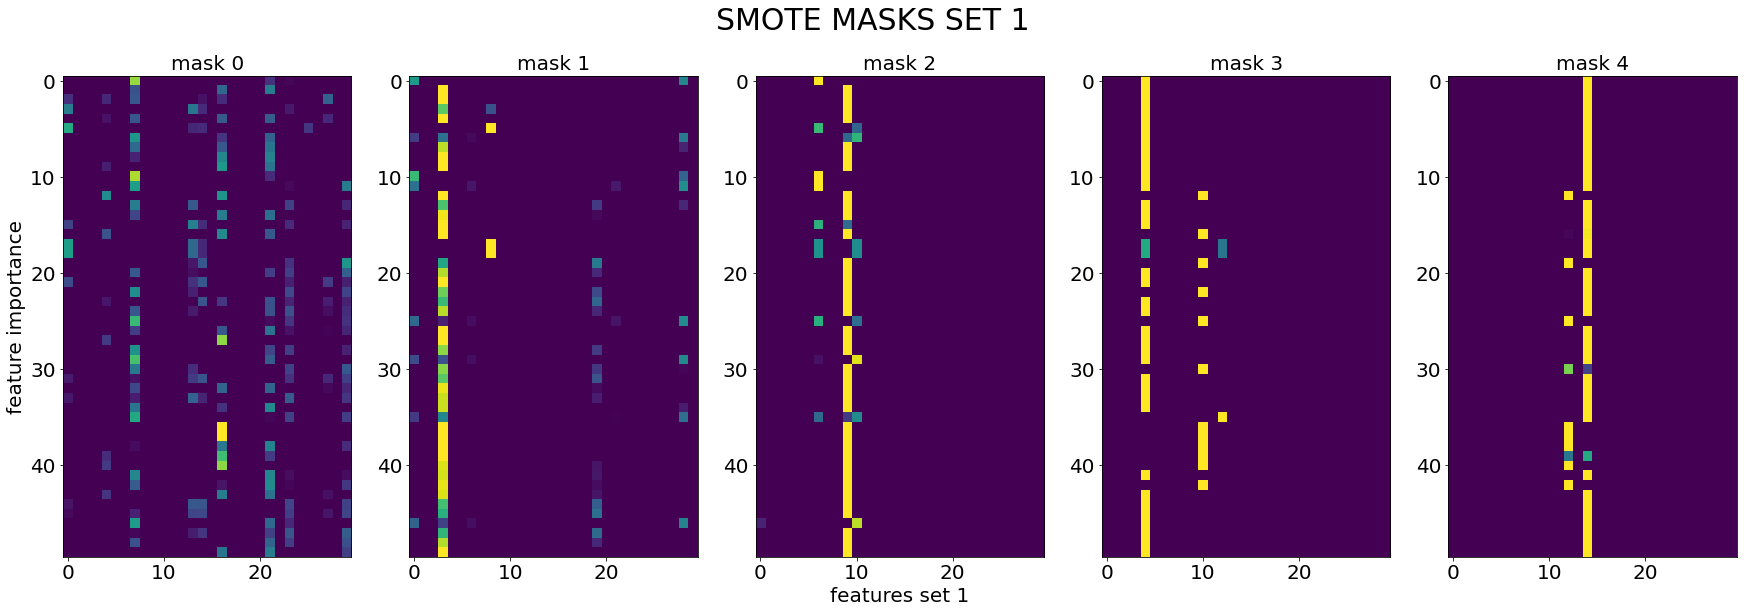

In [ ]:
fig, axs= plt.subplots(1,5, figsize=(30,40))
plt.suptitle('SMOTE MASKS SET 1', fontsize = 30, y=0.61)
for i in range(5):
  axs[i].imshow(mask1[i][:50])
  axs[i].set_title(f"mask {i}", fontsize =20)
axs[2].set_xlabel('features set 1', fontsize=20)
axs[0].set_ylabel('feature importance', fontsize=20)


Text(0, 0.5, 'feature importance')

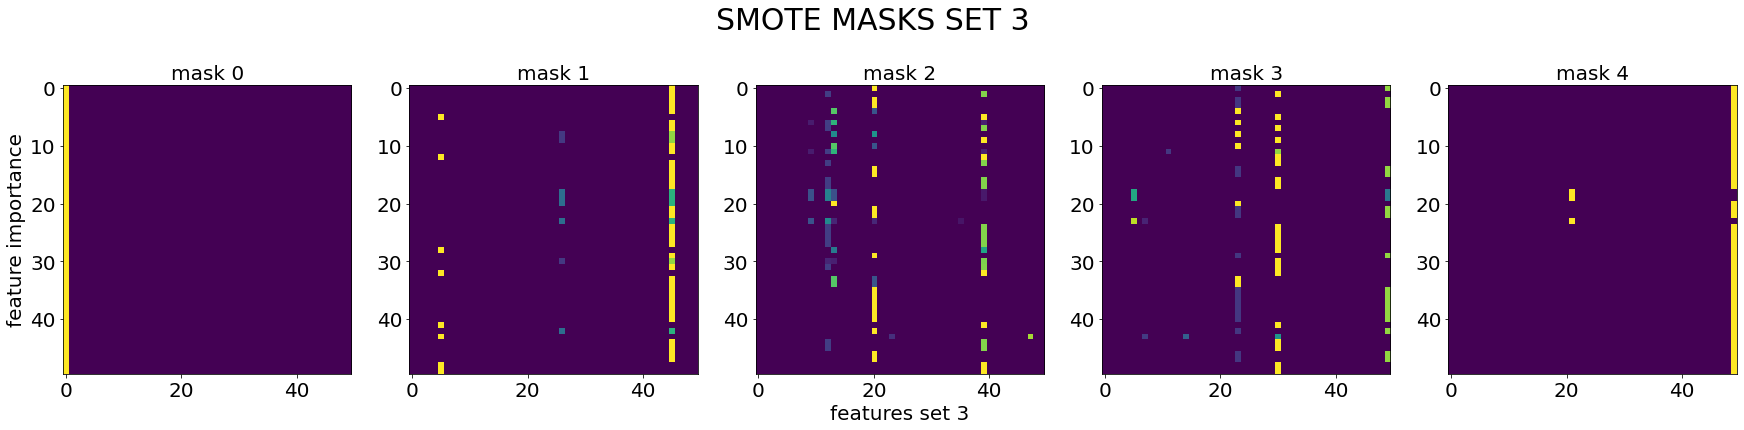

In [ ]:
fig, axs= plt.subplots(1,5, figsize=(30,40))

plt.suptitle('SMOTE MASKS SET 3', fontsize = 30,  y=0.58)

for i in range(5):
  axs[i].imshow(mask3[i][:50])
  axs[i].set_title(f"mask {i}", fontsize =20)
axs[2].set_xlabel('features set 3', fontsize=20)
axs[0].set_ylabel('feature importance', fontsize=20)

##XGBOOST + SMOTE

###TRAINING

In [ ]:
XGB_clf1=XGB_clf1.fit( X_train1_sm,y_train1_sm, eval_set =[(X_valid1,y_valid1)], verbose = 25)

[0]	validation_0-auc:0.956127	validation_0-logloss:0.674927
[25]	validation_0-auc:0.971246	validation_0-logloss:0.377951
[50]	validation_0-auc:0.974296	validation_0-logloss:0.231967
[75]	validation_0-auc:0.974887	validation_0-logloss:0.150745
[100]	validation_0-auc:0.974105	validation_0-logloss:0.104003
[125]	validation_0-auc:0.972012	validation_0-logloss:0.075862
[150]	validation_0-auc:0.970835	validation_0-logloss:0.058381
[175]	validation_0-auc:0.97308	validation_0-logloss:0.046624
[200]	validation_0-auc:0.97319	validation_0-logloss:0.038695
[225]	validation_0-auc:0.971858	validation_0-logloss:0.033303
[249]	validation_0-auc:0.972128	validation_0-logloss:0.029001


In [ ]:
XGB_clf2=XGB_clf2.fit( X_train2_sm,y_train2_sm, eval_set =[(X_valid2,y_valid2)], verbose = 25)

[0]	validation_0-auc:0.815132	validation_0-logloss:0.679391
[25]	validation_0-auc:0.832891	validation_0-logloss:0.453686
[50]	validation_0-auc:0.844933	validation_0-logloss:0.336812
[75]	validation_0-auc:0.849729	validation_0-logloss:0.267892
[100]	validation_0-auc:0.855023	validation_0-logloss:0.222077
[125]	validation_0-auc:0.85935	validation_0-logloss:0.193397
[150]	validation_0-auc:0.8628	validation_0-logloss:0.17227
[175]	validation_0-auc:0.865278	validation_0-logloss:0.157192
[200]	validation_0-auc:0.867444	validation_0-logloss:0.14549
[225]	validation_0-auc:0.868969	validation_0-logloss:0.136667
[249]	validation_0-auc:0.870785	validation_0-logloss:0.129921


In [ ]:
XGB_clf3=XGB_clf3.fit( X_train3_sm,y_train3_sm, eval_set =[(X_valid3,y_valid3)], verbose = 25)

[0]	validation_0-auc:0.999227	validation_0-logloss:0.673403
[25]	validation_0-auc:0.999227	validation_0-logloss:0.352724
[50]	validation_0-auc:0.999227	validation_0-logloss:0.200153
[75]	validation_0-auc:0.999227	validation_0-logloss:0.118415
[100]	validation_0-auc:0.999196	validation_0-logloss:0.07234
[125]	validation_0-auc:0.999332	validation_0-logloss:0.045746
[150]	validation_0-auc:0.999323	validation_0-logloss:0.030135
[175]	validation_0-auc:0.999357	validation_0-logloss:0.02075
[200]	validation_0-auc:0.999351	validation_0-logloss:0.015217
[225]	validation_0-auc:0.999354	validation_0-logloss:0.012051
[249]	validation_0-auc:0.99928	validation_0-logloss:0.010319


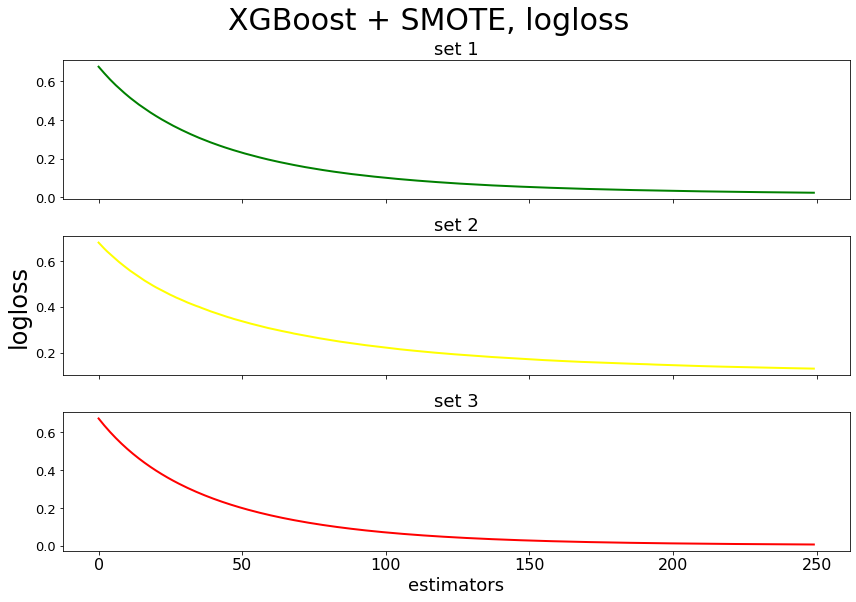

In [ ]:
fig, ax = plt.subplots(3, sharex='col', figsize=(12,8))
plt.suptitle('XGBoost + SMOTE, logloss', fontsize = 30,  y=1.04)
ax[0].plot(XGB_clf1.evals_result()['validation_0']['logloss'], color ='green', linewidth=2, markersize=12)
ax[0].set_title('set 1', fontsize=18)
ax[0].yaxis.set_tick_params(labelsize=13)
ax[1].plot(XGB_clf2.evals_result()['validation_0']['logloss'], color ='yellow', linewidth=2, markersize=12)
ax[1].set_ylabel(r"logloss", fontsize=24, color="black")
ax[1].set_title('set 2', fontsize=18)
ax[1].yaxis.set_tick_params(labelsize=13)
ax[2].plot(XGB_clf3.evals_result()['validation_0']['logloss'],color ='red', linewidth=2, markersize=12)
ax[2].set_xlabel('estimators', fontsize=18)
ax[2].set_title('set 3',  fontsize=18)
ax[2].xaxis.set_tick_params(labelsize=16)
ax[2].yaxis.set_tick_params(labelsize=13)

plt.tight_layout()
plt.show()

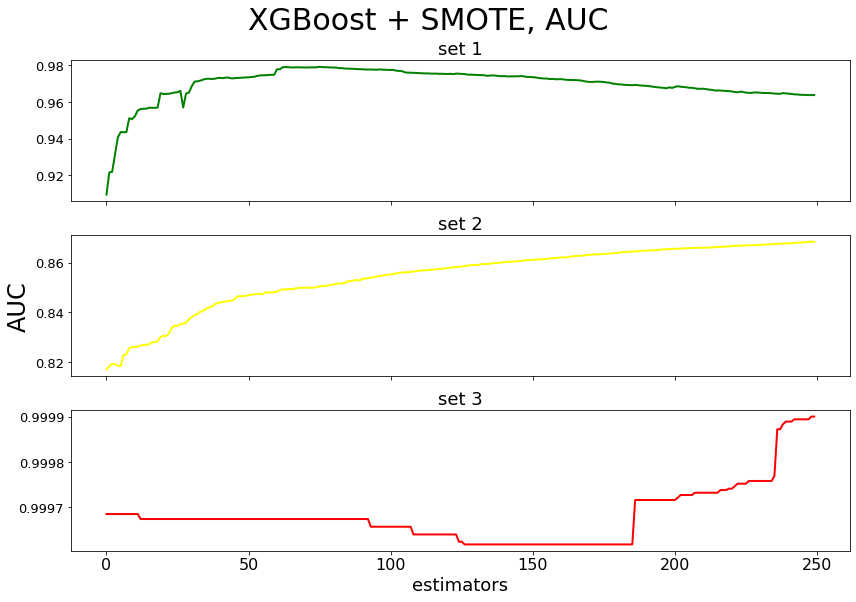

In [ ]:
fig, ax = plt.subplots(3, sharex='col', figsize=(12,8))
plt.suptitle('XGBoost + SMOTE, AUC', fontsize = 30,  y=1.04)
ax[0].plot( XGB_clf1.evals_result()['validation_0']['auc'], color ='green', linewidth=2, markersize=12)
ax[0].set_title('set 1', fontsize=18)
ax[0].yaxis.set_tick_params(labelsize=13)
ax[1].plot( XGB_clf2.evals_result()['validation_0']['auc'], color ='yellow', linewidth=2, markersize=12)
ax[1].set_ylabel(r"AUC", fontsize=24, color="black")
ax[1].set_title('set 2', fontsize=18)
ax[1].yaxis.set_tick_params(labelsize=13)
ax[2].plot( XGB_clf3.evals_result()['validation_0']['auc'],color ='red', linewidth=2, markersize=12)
ax[2].set_xlabel('estimators', fontsize=18)
ax[2].set_title('set 3',  fontsize=18)
ax[2].xaxis.set_tick_params(labelsize=16)
ax[2].yaxis.set_tick_params(labelsize=13)

plt.tight_layout()
plt.show()

###TEST

In [ ]:
predictions1_XGB_sm= XGB_clf1.predict(X_test1)
predictions2_XGB_sm= XGB_clf2.predict(X_test2)
predictions3_XGB_sm = XGB_clf3.predict(X_test3)

CONFUSION MATRIX

In [ ]:
cf_matrix1= confusion_matrix(y_test1, predictions1_XGB_sm)
cf_matrix2= confusion_matrix(y_test2, predictions2_XGB_sm)
cf_matrix3= confusion_matrix(y_test3, predictions3_XGB_sm)

Text(0.5, 0.98, 'CF_MATRIX XGB + SMOTE')

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


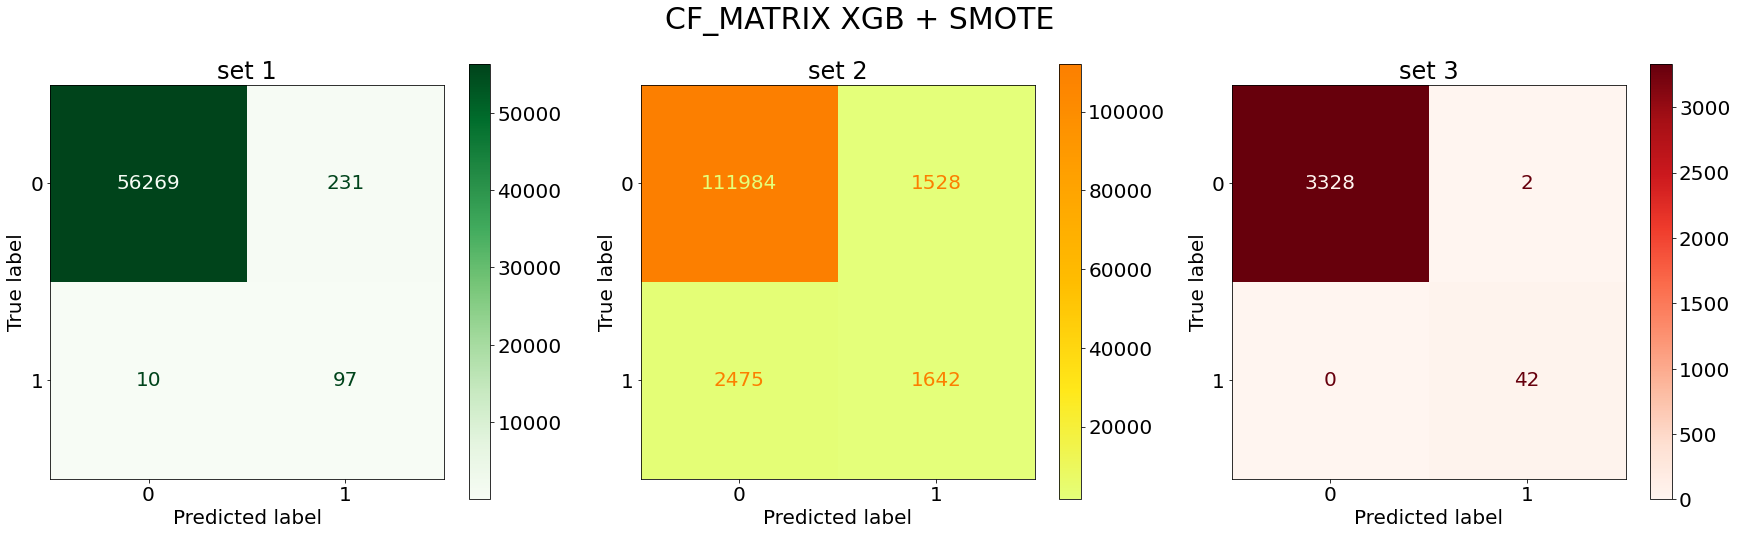

In [ ]:
font = {'family' : 'normal',
     'weight' : 'normal',
    'size'   : 20}
plt.rc('font', **font)

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(30,8))

ax1 =ConfusionMatrixDisplay(confusion_matrix=cf_matrix1).plot(cmap = "Greens", ax=ax1).ax_.set_title('set 1',fontsize =24) 
ax2 = ConfusionMatrixDisplay(confusion_matrix=cf_matrix2).plot(cmap = "Wistia",ax=ax2).ax_.set_title('set 2',fontsize =24) 
ax3 = ConfusionMatrixDisplay(confusion_matrix=cf_matrix3).plot(cmap = "Reds", ax=ax3).ax_.set_title('set 3',fontsize =24) 

plt.suptitle('CF_MATRIX XGB + SMOTE', fontsize = 30)

AUC, F1, ACCURACY

In [ ]:
fpr1, tpr1, _ = roc_curve(y_test1, predictions1_XGB_sm, pos_label=1)
Test1_auc= auc(fpr1,tpr1)

fpr2, tpr2, _ = roc_curve(y_test2, predictions2_XGB_sm, pos_label=1)
Test2_auc= auc(fpr2,tpr2)

fpr3, tpr3, _ = roc_curve(y_test3, predictions3_XGB_sm, pos_label=1)
Test3_auc= auc(fpr3,tpr3)

test1_F1=f1_score(y_test1, predictions1_XGB_sm, average='macro')
test2_F1=f1_score(y_test2, predictions2_XGB_sm, average='macro')
test3_F1=f1_score(y_test3, predictions3_XGB_sm, average='macro')

test1_acc= accuracy_score(y_test1, predictions1_XGB_sm)
test2_acc= accuracy_score(y_test2, predictions2_XGB_sm)
test3_acc= accuracy_score(y_test3, predictions3_XGB_sm)

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


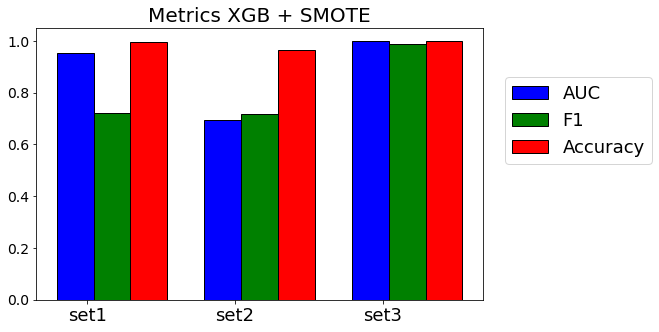

In [ ]:
AUC_XGB=[Test1_auc, Test2_auc, Test3_auc]
F1_XGB=[test1_F1, test2_F1, test3_F1]
Accuracy_XGB=[test1_acc, test2_acc, test3_acc]

plt.rcParams["figure.figsize"] = (8,5)

r = np.arange(3)
width = 0.25

plt.bar(r, AUC_XGB, color = 'b',
        width = width, edgecolor = 'black',
        label='AUC')
plt.bar(r + width, F1_XGB, color = 'g',
        width = width, edgecolor = 'black',
        label='F1')
plt.bar(r + width*2, Accuracy_XGB, color = 'red',
        width = width, edgecolor = 'black',
        label='Accuracy')
  
plt.title("Metrics XGB + SMOTE", fontsize = 20)
  
plt.xticks(r + width/3,['set1','set2','set3'], fontsize = 18)
plt.legend(fontsize = 18,loc=(1.05, 0.5))
plt.yticks(fontsize = 14)

plt.show()


In [ ]:
print("AUC {} \nF1 {} \nAccuracy {}".format(AUC_XGB,F1_XGB,Accuracy_XGB))

AUC [0.9512267802497725, 0.6926864853195555, 0.9996996996996996] 
F1 [0.7219200444201064, 0.7165531589319148, 0.9882218977694259] 
Accuracy [0.995742576006501, 0.9659692762839096, 0.9994068801897983]


### FEATURE IMPORTANCE

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


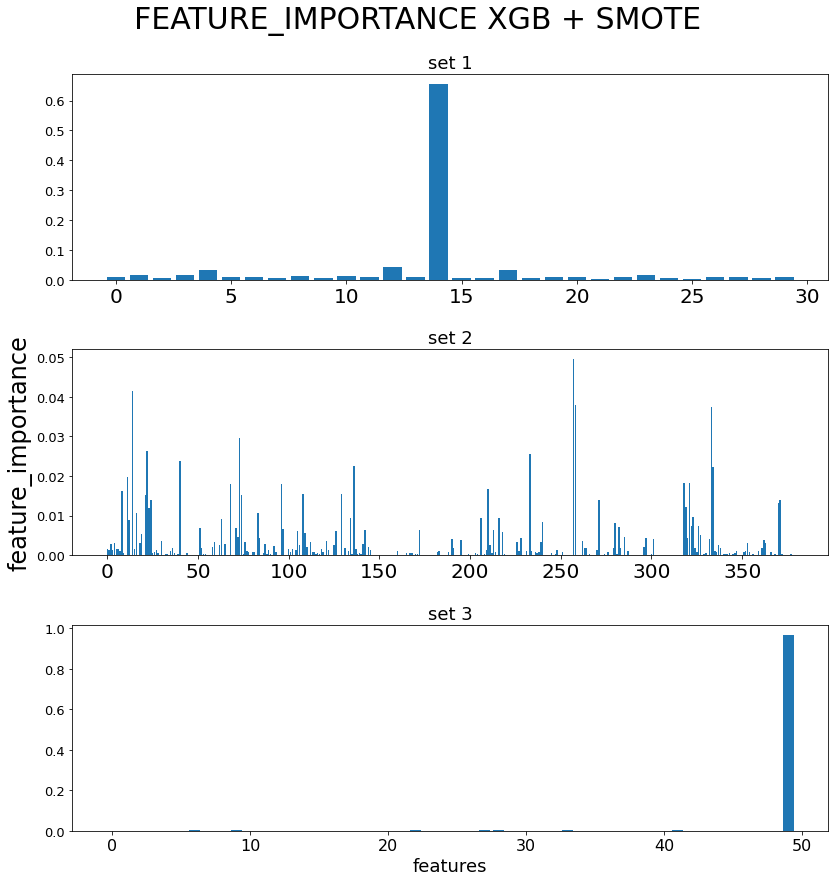

In [ ]:
fig, ax = plt.subplots(3,figsize=(12,12))

plt.suptitle('FEATURE_IMPORTANCE XGB + SMOTE', fontsize = 30,  y=1.03)
ax[0].bar(range(0,len(XGB_clf1.feature_importances_)), XGB_clf1.feature_importances_)
ax[0].set_title('set 1', fontsize=18)
ax[0].yaxis.set_tick_params(labelsize=13)
ax[1].bar(range(0,len(XGB_clf2.feature_importances_)), XGB_clf2.feature_importances_)
ax[1].set_ylabel(r"feature_importance", fontsize=24, color="black")
ax[1].set_title('set 2', fontsize=18)
ax[1].yaxis.set_tick_params(labelsize=13)
ax[2].bar(range(0,len(XGB_clf3.feature_importances_)), XGB_clf3.feature_importances_)
ax[2].set_xlabel('features', fontsize=18)
ax[2].set_title('set 3',  fontsize=18)
ax[2].xaxis.set_tick_params(labelsize=16)
ax[2].yaxis.set_tick_params(labelsize=13)


plt.tight_layout()
plt.show()

##Light GBM + SMOTE

###TRAINING

In [ ]:
LGBM_clf1 = LGBM_clf1.fit( X_train1_sm,y_train1_sm, eval_set =[(X_valid1,y_valid1)], eval_metric="auc",verbose =25)

[25]	valid_0's auc: 0.964009	valid_0's binary_logloss: 0.378819
[50]	valid_0's auc: 0.967463	valid_0's binary_logloss: 0.227572
[75]	valid_0's auc: 0.969745	valid_0's binary_logloss: 0.144055
[100]	valid_0's auc: 0.968519	valid_0's binary_logloss: 0.0952048
[125]	valid_0's auc: 0.96755	valid_0's binary_logloss: 0.0655172
[150]	valid_0's auc: 0.966713	valid_0's binary_logloss: 0.0467674
[175]	valid_0's auc: 0.965918	valid_0's binary_logloss: 0.0344152
[200]	valid_0's auc: 0.964424	valid_0's binary_logloss: 0.0265427
[225]	valid_0's auc: 0.962701	valid_0's binary_logloss: 0.0215256
[250]	valid_0's auc: 0.961364	valid_0's binary_logloss: 0.0179663


In [ ]:
clf2 = LGBM_clf2.fit( X_train2_sm,y_train2_sm, eval_set =[(X_valid2,y_valid2)], eval_metric="auc",verbose =25)

[25]	valid_0's auc: 0.841567	valid_0's binary_logloss: 0.443087
[50]	valid_0's auc: 0.84871	valid_0's binary_logloss: 0.31734
[75]	valid_0's auc: 0.853429	valid_0's binary_logloss: 0.243573
[100]	valid_0's auc: 0.858041	valid_0's binary_logloss: 0.196399
[125]	valid_0's auc: 0.863658	valid_0's binary_logloss: 0.16717
[150]	valid_0's auc: 0.867367	valid_0's binary_logloss: 0.147824
[175]	valid_0's auc: 0.87089	valid_0's binary_logloss: 0.134841
[200]	valid_0's auc: 0.873504	valid_0's binary_logloss: 0.125387
[225]	valid_0's auc: 0.875617	valid_0's binary_logloss: 0.118482
[250]	valid_0's auc: 0.878263	valid_0's binary_logloss: 0.113347


In [ ]:
clf3 = LGBM_clf3.fit( X_train3_sm,y_train3_sm, eval_set =[(X_valid3,y_valid3)], eval_metric="auc",verbose =25)

[25]	valid_0's auc: 0.999678	valid_0's binary_logloss: 0.361196
[50]	valid_0's auc: 0.999678	valid_0's binary_logloss: 0.204427
[75]	valid_0's auc: 0.999678	valid_0's binary_logloss: 0.120622
[100]	valid_0's auc: 0.999691	valid_0's binary_logloss: 0.0733364
[125]	valid_0's auc: 0.999691	valid_0's binary_logloss: 0.0459513
[150]	valid_0's auc: 0.999685	valid_0's binary_logloss: 0.0298584
[175]	valid_0's auc: 0.999734	valid_0's binary_logloss: 0.0203404
[200]	valid_0's auc: 0.99974	valid_0's binary_logloss: 0.0147231
[225]	valid_0's auc: 0.999722	valid_0's binary_logloss: 0.0114515
[250]	valid_0's auc: 0.999697	valid_0's binary_logloss: 0.00944728


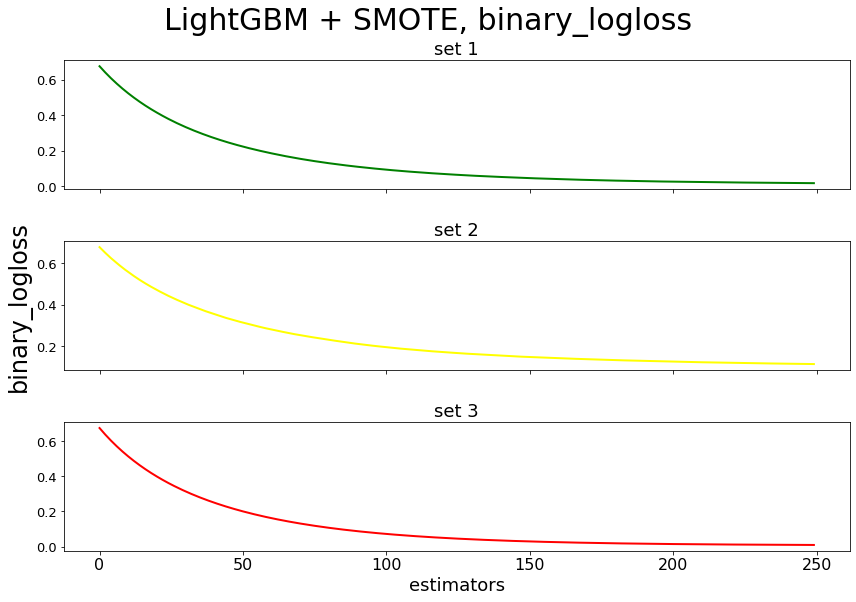

In [ ]:
fig, ax = plt.subplots(3, sharex='col', figsize=(12,8))
plt.suptitle('LightGBM + SMOTE, binary_logloss', fontsize = 30,  y=1.04)
ax[0].plot(LGBM_clf1.evals_result_['valid_0']['binary_logloss'], color ='green', linewidth=2, markersize=12)
ax[0].set_title('set 1', fontsize=18)
ax[0].yaxis.set_tick_params(labelsize=13)
ax[1].plot(LGBM_clf2.evals_result_['valid_0']['binary_logloss'], color ='yellow', linewidth=2, markersize=12)
ax[1].set_ylabel(r"binary_logloss", fontsize=24, color="black")
ax[1].set_title('set 2', fontsize=18)
ax[1].yaxis.set_tick_params(labelsize=13)
ax[2].plot(LGBM_clf3.evals_result_['valid_0']['binary_logloss'],color ='red', linewidth=2, markersize=12)
ax[2].set_xlabel('estimators', fontsize=18)
ax[2].set_title('set 3',  fontsize=18)
ax[2].xaxis.set_tick_params(labelsize=16)
ax[2].yaxis.set_tick_params(labelsize=13)

plt.tight_layout()
plt.show()

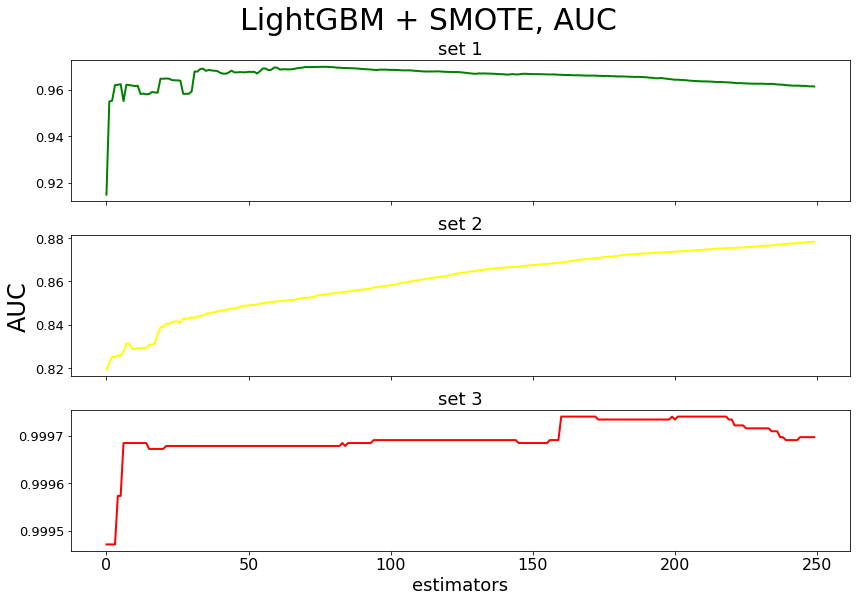

In [ ]:
fig, ax = plt.subplots(3, sharex='col', figsize=(12,8))
plt.suptitle('LightGBM + SMOTE, AUC', fontsize = 30,  y=1.04)
ax[0].plot( LGBM_clf1.evals_result_['valid_0']['auc'], color ='green', linewidth=2, markersize=12)
ax[0].set_title('set 1', fontsize=18)
ax[0].yaxis.set_tick_params(labelsize=13)
ax[1].plot(LGBM_clf2.evals_result_['valid_0']['auc'], color ='yellow', linewidth=2, markersize=12)
ax[1].set_ylabel(r"AUC", fontsize=24, color="black")
ax[1].set_title('set 2', fontsize=18)
ax[1].yaxis.set_tick_params(labelsize=13)
ax[2].plot( LGBM_clf3.evals_result_['valid_0']['auc'],color ='red', linewidth=2, markersize=12)
ax[2].set_xlabel('estimators', fontsize=18)
ax[2].set_title('set 3',  fontsize=18)
ax[2].xaxis.set_tick_params(labelsize=16)
ax[2].yaxis.set_tick_params(labelsize=13)

plt.tight_layout()
plt.show()

###TEST

In [ ]:
predictions_LGBM1_sm= LGBM_clf1.predict(X_test1)
predictions_LGBM2_sm= LGBM_clf2.predict(X_test2)
predictions_LGBM3_sm= LGBM_clf3.predict(X_test3)

CONFUSION MATRIX

In [ ]:
cf_matrix_LGBM1= confusion_matrix(y_test1, predictions_LGBM1_sm)
cf_matrix_LGBM2= confusion_matrix(y_test2, predictions_LGBM2_sm)
cf_matrix_LGBM3= confusion_matrix(y_test3, predictions_LGBM3_sm)

Text(0.5, 0.98, 'CF_MATRIX LGBM + SMOTE')

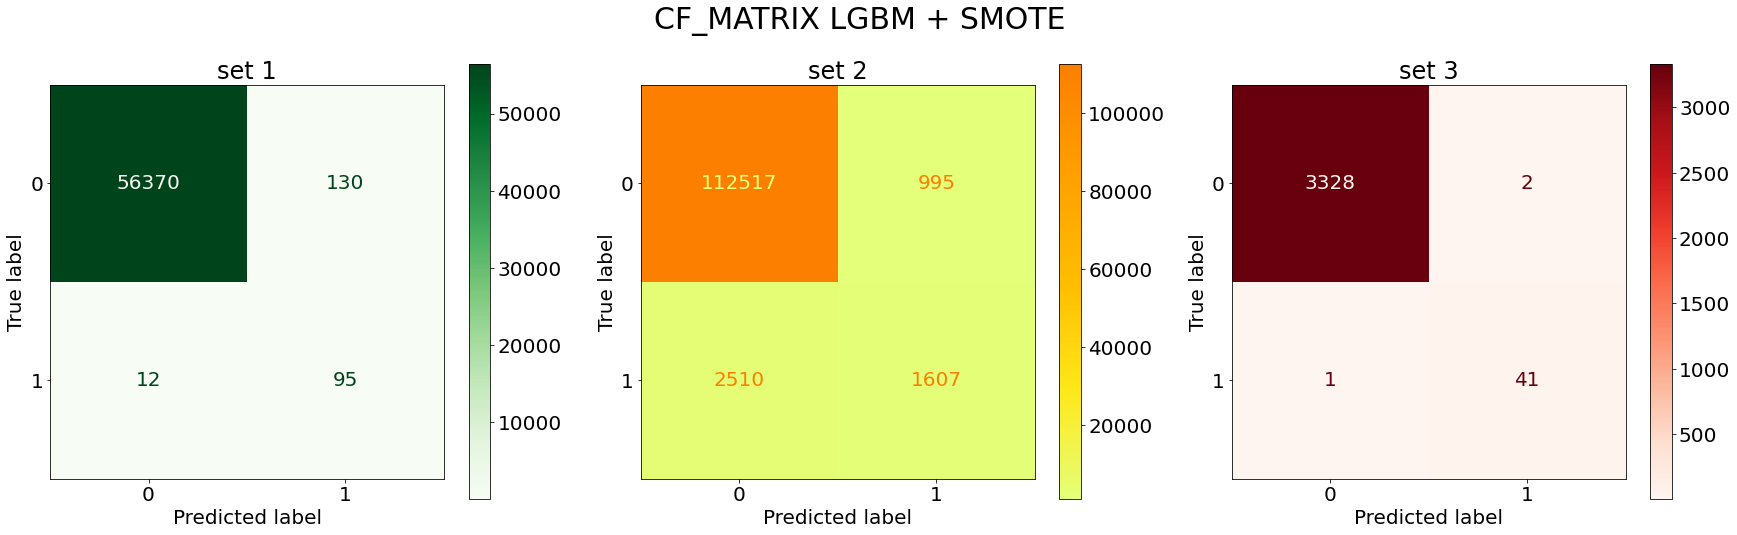

In [ ]:
font = {'family' : 'normal',
     'weight' : 'normal',
    'size'   : 20}
plt.rc('font', **font)

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(30,8))

ax1 =ConfusionMatrixDisplay(confusion_matrix=cf_matrix_LGBM1).plot(cmap = "Greens", ax=ax1).ax_.set_title('set 1',fontsize =24) 
ax2 = ConfusionMatrixDisplay(confusion_matrix=cf_matrix_LGBM2).plot(cmap = "Wistia",ax=ax2).ax_.set_title('set 2',fontsize =24) 
ax3 = ConfusionMatrixDisplay(confusion_matrix=cf_matrix_LGBM3).plot(cmap = "Reds", ax=ax3).ax_.set_title('set 3',fontsize =24) 

plt.suptitle('CF_MATRIX LGBM + SMOTE', fontsize = 30)

AUC, F1, ACCURACY

In [ ]:
fpr1, tpr1, _ = roc_curve(y_test1, predictions_LGBM1_sm, pos_label=1)
Test1_auc= auc(fpr1,tpr1)

fpr2, tpr2, _ = roc_curve(y_test2, predictions_LGBM2_sm, pos_label=1)
Test2_auc= auc(fpr2,tpr2)

fpr3, tpr3, _ = roc_curve(y_test3, predictions_LGBM3_sm, pos_label=1)
Test3_auc= auc(fpr3,tpr3)

test1_F1=f1_score(y_test1, predictions_LGBM1_sm, average='macro')
test2_F1=f1_score(y_test2, predictions_LGBM2_sm, average='macro')
test3_F1=f1_score(y_test3, predictions_LGBM3_sm, average='macro')

test1_acc= accuracy_score(y_test1, predictions_LGBM1_sm)
test2_acc= accuracy_score(y_test2, predictions_LGBM2_sm)
test3_acc= accuracy_score(y_test3, predictions_LGBM3_sm)

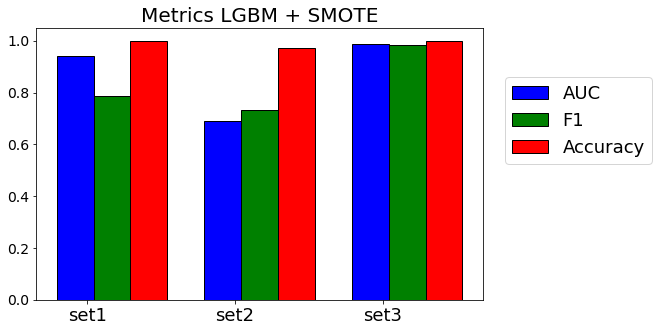

In [ ]:
AUC_LGBM=[Test1_auc, Test2_auc, Test3_auc]
F1_LGBM=[test1_F1, test2_F1, test3_F1]
Accuracy_LGBM=[test1_acc, test2_acc, test3_acc]

plt.rcParams["figure.figsize"] = (8,5)

r = np.arange(3)
width = 0.25

plt.bar(r, AUC_LGBM, color = 'b',
        width = width, edgecolor = 'black',
        label='AUC')
plt.bar(r + width, F1_LGBM, color = 'g',
        width = width, edgecolor = 'black',
        label='F1')
plt.bar(r + width*2, Accuracy_LGBM, color = 'red',
        width = width, edgecolor = 'black',
        label='Accuracy')
  
plt.title("Metrics LGBM + SMOTE", fontsize = 20)
  
plt.xticks(r + width/3,['set1','set2','set3'], fontsize = 18)
plt.legend(fontsize = 18,loc=(1.05, 0.5))
plt.yticks(fontsize = 14)

plt.show()

In [ ]:
print("AUC {} \nF1 {} \nAccuracy {}".format(AUC_LGBM,F1_LGBM,Accuracy_LGBM))

AUC [0.9427747911669837, 0.6907835867562774, 0.9877949377949378] 
F1 [0.7855156029230226, 0.7315042204705514, 0.9821276821285654] 
Accuracy [0.9974914763191831, 0.9702029261491639, 0.9991103202846975]


### FEATURE IMPORTANCE

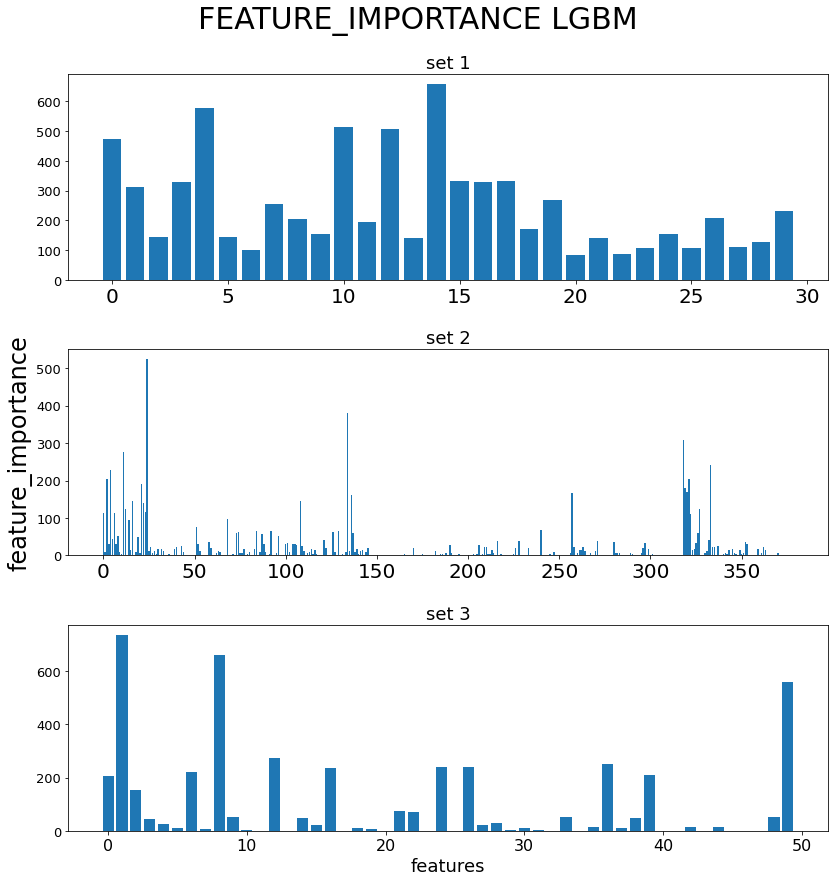

In [ ]:
fig, ax = plt.subplots(3,figsize=(12,12))

plt.suptitle('FEATURE_IMPORTANCE LGBM + SMOTE', fontsize = 30,  y=1.03)
ax[0].bar(range(0,len(LGBM_clf1.feature_importances_)), LGBM_clf1.feature_importances_)
ax[0].set_title('set 1', fontsize=18)
ax[0].yaxis.set_tick_params(labelsize=13)
ax[1].bar(range(0,len(LGBM_clf2.feature_importances_)), LGBM_clf2.feature_importances_)
ax[1].set_ylabel(r"feature_importance", fontsize=24, color="black")
ax[1].set_title('set 2', fontsize=18)
ax[1].yaxis.set_tick_params(labelsize=13)
ax[2].bar(range(0,len(LGBM_clf3.feature_importances_)), LGBM_clf3.feature_importances_)
ax[2].set_xlabel('features', fontsize=18)
ax[2].set_title('set 3',  fontsize=18)
ax[2].xaxis.set_tick_params(labelsize=16)
ax[2].yaxis.set_tick_params(labelsize=13)


plt.tight_layout()
plt.show()

#UNDERSAMPLING



In [ ]:
undersample = RandomUnderSampler(sampling_strategy=0.05)

###undersampled train, valid saves

In [ ]:
# X_train1_uns, y_train1_uns = undersample.fit_resample(X_train1, y_train1)
# X_train2_uns, y_train2_uns = undersample.fit_resample(X_train2, y_train2)
# X_train3_uns, y_train3_uns = undersample.fit_resample(X_train3, y_train3)

# with open('/content/gdrive/MyDrive/TabNet/data_undersampled/X_train2_uns.txt', 'w') as f:
#     np.savetxt(f, X_train2_uns)
# with open('/content/gdrive/MyDrive/TabNet/data_undersampled/y_train2_uns.txt', 'w') as f:
#     np.savetxt(f, y_train2_uns)
# with open('/content/gdrive/MyDrive/TabNet/data_undersampled/X_train1_uns.txt', 'w') as f:
#     np.savetxt(f, X_train1_uns)
# with open('/content/gdrive/MyDrive/TabNet/data_undersampled/y_train1_uns.txt', 'w') as f:
#     np.savetxt(f, y_train1_uns)
# with open('/content/gdrive/MyDrive/TabNet/data_undersampled/X_train3_uns.txt', 'w') as f:
#     np.savetxt(f, X_train3_uns)
# with open('/content/gdrive/MyDrive/TabNet/data_undersampled/y_train3_uns.txt', 'w') as f:
#     np.savetxt(f, y_train3_uns)

with open('/content/gdrive/MyDrive/TabNet/data_undersampled/X_train1_uns.txt', 'r') as f:
    X_train1_uns = np.loadtxt(f)
with open('/content/gdrive/MyDrive/TabNet/data_undersampled/y_train1_uns.txt', 'r') as f:
    y_train1_uns = np.loadtxt(f)
with open('/content/gdrive/MyDrive/TabNet/data_undersampled/X_train2_uns.txt', 'r') as f:
    X_train2_uns = np.loadtxt(f)
with open('/content/gdrive/MyDrive/TabNet/data_undersampled/y_train2_uns.txt', 'r') as f:
    y_train2_uns = np.loadtxt(f)
with open('/content/gdrive/MyDrive/TabNet/data_undersampled/X_train3_uns.txt', 'r') as f:
    X_train3_uns = np.loadtxt(f)
with open('/content/gdrive/MyDrive/TabNet/data_undersampled/y_train3_uns.txt', 'r') as f:
    y_train3_uns = np.loadtxt(f)



In [ ]:

# X_valid1_uns, y_valid1_uns = undersample.fit_resample(X_valid1, y_valid1)
# X_valid2_uns, y_valid2_uns = undersample.fit_resample(X_valid2, y_valid2)
# X_valid3_uns, y_valid3_uns = undersample.fit_resample(X_valid3, y_valid3)

# with open('/content/gdrive/MyDrive/TabNet/data_undersampled/X_valid2_uns.txt', 'w') as f:
#     np.savetxt(f, X_valid2_uns)
# with open('/content/gdrive/MyDrive/TabNet/data_undersampled/y_valid2_uns.txt', 'w') as f:
#     np.savetxt(f, y_valid2_uns)
# with open('/content/gdrive/MyDrive/TabNet/data_undersampled/X_valid1_uns.txt', 'w') as f:
#     np.savetxt(f, X_valid1_uns)
# with open('/content/gdrive/MyDrive/TabNet/data_undersampled/y_valid1_uns.txt', 'w') as f:
#     np.savetxt(f, y_valid1_uns)
# with open('/content/gdrive/MyDrive/TabNet/data_undersampled/X_valid3_uns.txt', 'w') as f:
#     np.savetxt(f, X_valid3_uns)
# with open('/content/gdrive/MyDrive/TabNet/data_undersampled/y_valid3_uns.txt', 'w') as f:
#     np.savetxt(f, y_valid3_uns)

with open('/content/gdrive/MyDrive/TabNet/data_undersampled/X_valid1_uns.txt', 'r') as f:
    X_valid1_uns = np.loadtxt(f)
with open('/content/gdrive/MyDrive/TabNet/data_undersampled/y_valid1_uns.txt', 'r') as f:
    y_valid1_uns = np.loadtxt(f)
with open('/content/gdrive/MyDrive/TabNet/data_undersampled/X_valid2_uns.txt', 'r') as f:
    X_valid2_uns = np.loadtxt(f)
with open('/content/gdrive/MyDrive/TabNet/data_undersampled/y_valid2_uns.txt', 'r') as f:
    y_valid2_uns = np.loadtxt(f)
with open('/content/gdrive/MyDrive/TabNet/data_undersampled/X_valid3_uns.txt', 'r') as f:
    X_valid3_uns = np.loadtxt(f)
with open('/content/gdrive/MyDrive/TabNet/data_undersampled/y_valid3_uns.txt', 'r') as f:
    y_valid3_uns = np.loadtxt(f)

In [ ]:
print(X_train1_uns.shape)
print(X_train2_uns.shape)
print(X_valid1_uns.shape)
print(X_valid2_uns.shape)

(5733, 30)
(261681, 379)
(2352, 30)
(85785, 379)


In [ ]:
unique, counts = np.unique(y_train3_uns, return_counts=True)
dict(zip(unique, counts))

{0.0: 2800, 1.0: 140}

##TABNET UNDERSAMPLED

### TRAINING

In [ ]:
clf1.fit( X_train=  X_train1_uns, y_train= y_train1_uns,
   eval_set=[(X_valid1_uns, y_valid1_uns)],eval_metric=["auc"], patience =20,
    max_epochs=12, batch_size=1024, virtual_batch_size = 150) 

epoch 0  | loss: 0.51363 | val_0_auc: 0.51298 |  0:00:08s
epoch 1  | loss: 0.24113 | val_0_auc: 0.73374 |  0:00:15s
epoch 2  | loss: 0.16756 | val_0_auc: 0.82001 |  0:00:24s
epoch 3  | loss: 0.14566 | val_0_auc: 0.86644 |  0:00:34s
epoch 4  | loss: 0.11991 | val_0_auc: 0.88799 |  0:00:39s
epoch 5  | loss: 0.10803 | val_0_auc: 0.91093 |  0:00:43s
epoch 6  | loss: 0.10674 | val_0_auc: 0.90412 |  0:00:48s
epoch 7  | loss: 0.09434 | val_0_auc: 0.92541 |  0:00:53s
epoch 8  | loss: 0.08443 | val_0_auc: 0.9172  |  0:00:57s
epoch 9  | loss: 0.0804  | val_0_auc: 0.91297 |  0:01:00s
epoch 10 | loss: 0.08753 | val_0_auc: 0.92277 |  0:01:04s
epoch 11 | loss: 0.09089 | val_0_auc: 0.93759 |  0:01:06s
Stop training because you reached max_epochs = 12 with best_epoch = 11 and best_val_0_auc = 0.93759
Best weights from best epoch are automatically used!


In [ ]:
clf2.fit( X_train=  X_train2_uns, y_train= y_train2_uns,
   eval_set=[(X_valid2_uns, y_valid2_uns)],eval_metric=["auc"], patience =20,
    max_epochs=12, batch_size=1024, virtual_batch_size = 150) 

epoch 0  | loss: 0.21085 | val_0_auc: 0.7499  |  0:01:39s
epoch 1  | loss: 0.17016 | val_0_auc: 0.74739 |  0:03:13s
epoch 2  | loss: 0.16952 | val_0_auc: 0.7614  |  0:04:50s
epoch 3  | loss: 0.16442 | val_0_auc: 0.76642 |  0:06:26s
epoch 4  | loss: 0.16046 | val_0_auc: 0.77666 |  0:08:03s
epoch 5  | loss: 0.16019 | val_0_auc: 0.78347 |  0:09:37s
epoch 6  | loss: 0.1579  | val_0_auc: 0.76359 |  0:11:10s
epoch 7  | loss: 0.15457 | val_0_auc: 0.78282 |  0:12:43s
epoch 8  | loss: 0.1531  | val_0_auc: 0.79678 |  0:14:16s
epoch 9  | loss: 0.15095 | val_0_auc: 0.79095 |  0:15:51s
epoch 10 | loss: 0.15452 | val_0_auc: 0.77994 |  0:17:25s
epoch 11 | loss: 0.15787 | val_0_auc: 0.77098 |  0:18:57s
Stop training because you reached max_epochs = 12 with best_epoch = 8 and best_val_0_auc = 0.79678
Best weights from best epoch are automatically used!


In [ ]:
clf3.fit( X_train=  X_train3_uns, y_train= y_train3_uns,
   eval_set=[(X_valid3_uns, y_valid3_uns)],eval_metric=["auc"], patience =20,
    max_epochs=12, batch_size=1024, virtual_batch_size = 150) 

epoch 0  | loss: 0.69785 | val_0_auc: 0.56395 |  0:00:00s
epoch 1  | loss: 0.32037 | val_0_auc: 0.76993 |  0:00:00s
epoch 2  | loss: 0.27117 | val_0_auc: 0.52536 |  0:00:01s
epoch 3  | loss: 0.26917 | val_0_auc: 0.45637 |  0:00:01s
epoch 4  | loss: 0.2502  | val_0_auc: 0.93859 |  0:00:01s
epoch 5  | loss: 0.2098  | val_0_auc: 0.66564 |  0:00:02s
epoch 6  | loss: 0.15931 | val_0_auc: 0.739   |  0:00:02s
epoch 7  | loss: 0.13684 | val_0_auc: 0.57023 |  0:00:02s
epoch 8  | loss: 0.10577 | val_0_auc: 0.50793 |  0:00:03s
epoch 9  | loss: 0.09246 | val_0_auc: 0.57853 |  0:00:03s
epoch 10 | loss: 0.09693 | val_0_auc: 0.65408 |  0:00:03s
epoch 11 | loss: 0.09122 | val_0_auc: 0.70317 |  0:00:04s
Stop training because you reached max_epochs = 12 with best_epoch = 4 and best_val_0_auc = 0.93859
Best weights from best epoch are automatically used!


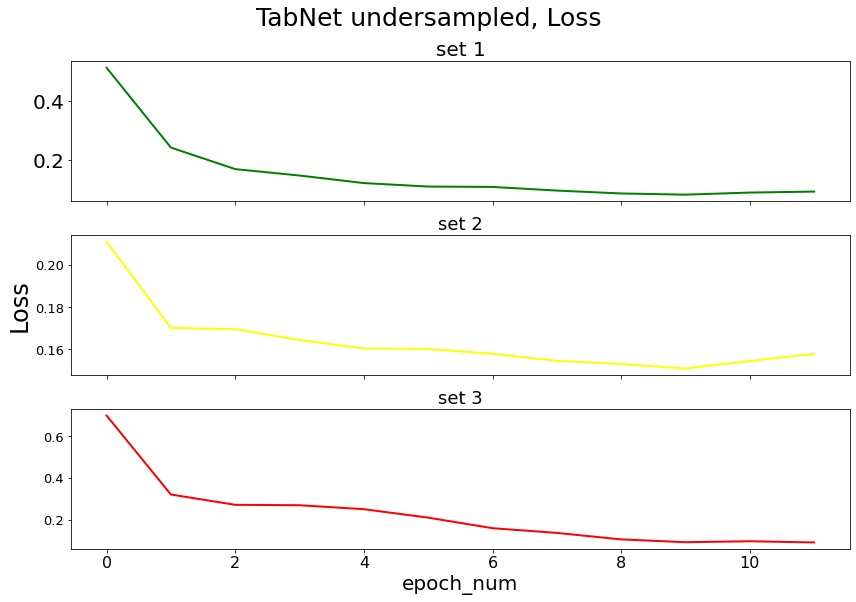

In [ ]:
fig, ax = plt.subplots(3, sharex='col', figsize=(12,8))
plt.suptitle('TabNet undersampled, Loss', fontsize = 25,  y=1.04)
ax[0].plot(clf1.history['loss'], color ='green', linewidth=2, markersize=12)
ax[0].set_title('set 1', fontsize=20)
ax[0].yaxis.set_tick_params(labelsize=20)
ax[1].plot(clf2.history['loss'], color ='yellow', linewidth=2, markersize=12)
ax[1].set_ylabel(r"Loss", fontsize=24, color="black")
ax[1].set_title('set 2', fontsize=18)
ax[1].yaxis.set_tick_params(labelsize=13)
ax[2].plot(clf3.history['loss'],color ='red', linewidth=2, markersize=12)
ax[2].set_xlabel('epoch_num', fontsize=20)
ax[2].set_title('set 3',  fontsize=18)
ax[2].xaxis.set_tick_params(labelsize=16)
ax[2].yaxis.set_tick_params(labelsize=13)

plt.tight_layout()
plt.show()


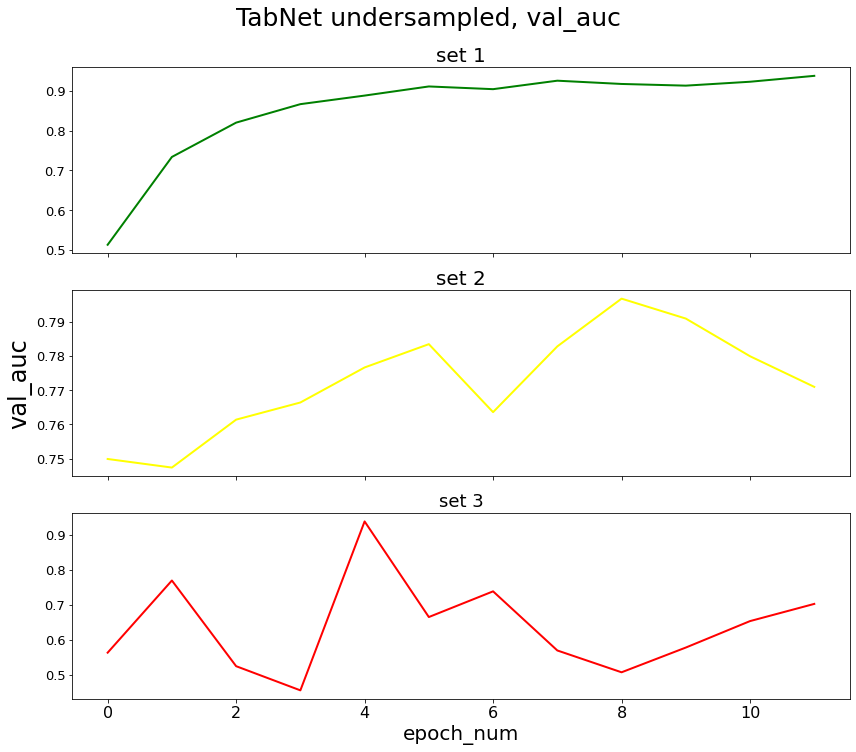

In [ ]:
fig, ax = plt.subplots(3, sharex='col', figsize=(12,10))
plt.suptitle('TabNet undersampled, val_auc', fontsize = 25,  y=1.04)
ax[0].plot(clf1.history['val_0_auc'], color ='green', linewidth=2, markersize=12)
ax[0].set_title('set 1', fontsize=20)
ax[0].yaxis.set_tick_params(labelsize=13)
ax[1].plot(clf2.history['val_0_auc'], color ='yellow', linewidth=2, markersize=12)
ax[1].set_ylabel(r"val_auc", fontsize=24, color="black")
ax[1].set_title('set 2', fontsize=20)
ax[1].yaxis.set_tick_params(labelsize=13)
ax[2].plot(clf3.history['val_0_auc'],color ='red', linewidth=2, markersize=12)
ax[2].set_xlabel('epoch_num', fontsize=20)
ax[2].set_title('set 3',  fontsize=18)
ax[2].xaxis.set_tick_params(labelsize=16)
ax[2].yaxis.set_tick_params(labelsize=13)

plt.tight_layout()
plt.show()


###TEST

In [ ]:
predictions1_uns= clf1.predict(X_test1)
predictions2_uns= clf2.predict(X_test2)
predictions3_uns= clf3.predict(X_test3)

CONFUSION MATRIX

In [ ]:
cf_matrix1= confusion_matrix(y_test1, predictions1_uns)
cf_matrix2= confusion_matrix(y_test2, predictions2_uns)
cf_matrix3= confusion_matrix(y_test3, predictions3_uns)

Text(0.5, 0.98, 'CF_MATRIX TabNet undersampled')

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


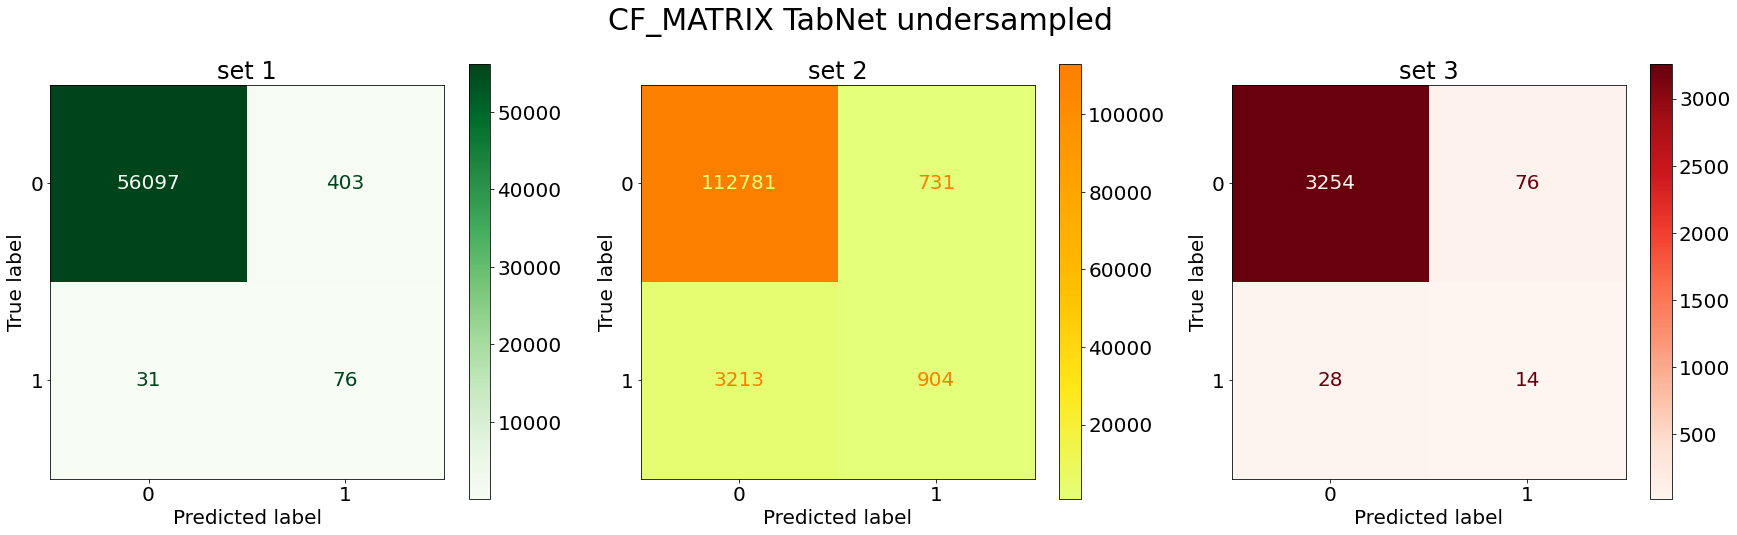

In [ ]:
font = {'family' : 'normal',
     'weight' : 'normal',
    'size'   : 20}
plt.rc('font', **font)

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(30,8))

ax1 =ConfusionMatrixDisplay(confusion_matrix=cf_matrix1).plot(cmap = "Greens", ax=ax1).ax_.set_title('set 1',fontsize =24) 
ax2 = ConfusionMatrixDisplay(confusion_matrix=cf_matrix2).plot(cmap = "Wistia",ax=ax2).ax_.set_title('set 2',fontsize =24) 
ax3 = ConfusionMatrixDisplay(confusion_matrix=cf_matrix3).plot(cmap = "Reds", ax=ax3).ax_.set_title('set 3',fontsize =24) 

plt.suptitle('CF_MATRIX TabNet undersampled', fontsize = 30)

AUC, F1, ACCURACY

In [ ]:
fpr1, tpr1, _ = roc_curve(y_test1, predictions1_uns, pos_label=1)
Test1_auc= auc(fpr1,tpr1)

fpr2, tpr2, _ = roc_curve(y_test2, predictions2_uns, pos_label=1)
Test2_auc= auc(fpr2,tpr2)

fpr3, tpr3, _ = roc_curve(y_test3, predictions3_uns, pos_label=1)
Test3_auc= auc(fpr3,tpr3)

test1_F1=f1_score(y_test1, predictions1_uns, average='macro')
test2_F1=f1_score(y_test2, predictions2_uns, average='macro')
test3_F1=f1_score(y_test3, predictions3_uns, average='macro')

test1_acc= accuracy_score(y_test1, predictions1_uns)
test2_acc= accuracy_score(y_test2, predictions2_uns)
test3_acc= accuracy_score(y_test3, predictions3_uns)

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


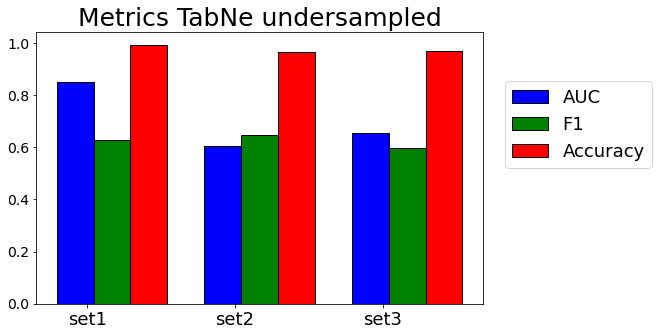

In [ ]:
AUC=[Test1_auc, Test2_auc, Test3_auc]
F1=[test1_F1, test2_F1, test3_F1]
Accuracy=[test1_acc, test2_acc, test3_acc]

plt.rcParams["figure.figsize"] = (8,5)

r = np.arange(3)
width = 0.25

plt.bar(r, AUC, color = 'b',
        width = width, edgecolor = 'black',
        label='AUC')
plt.bar(r + width, F1, color = 'g',
        width = width, edgecolor = 'black',
        label='F1')
plt.bar(r + width*2, Accuracy, color = 'red',
        width = width, edgecolor = 'black',
        label='Accuracy')
  
plt.title("Metrics TabNe undersampled", fontsize = 25)
  
plt.xticks(r + width/3,['set1','set2','set3'], fontsize = 18)
plt.legend(fontsize = 18,loc=(1.05, 0.5))
plt.yticks(fontsize = 14)

plt.show()

In [ ]:
print("AUC {} \nF1 {} \nAccuracy {}".format(AUC,F1,Accuracy))

AUC [0.851573815234472, 0.6065687571937557, 0.6552552552552553] 
F1 [0.6277661360283472, 0.648570358052823, 0.5981961172523786] 
Accuracy [0.9923331036797569, 0.9664708532759778, 0.9691577698695136]


###FEATURE IMPORTANCE

In [ ]:
explain_matrix1, mask1=clf1.explain(X_test1)
explain_matrix2, mask2=clf2.explain(X_test2)
explain_matrix3, mask3=clf3.explain(X_test3)

Text(0, 0.5, 'feature importance')

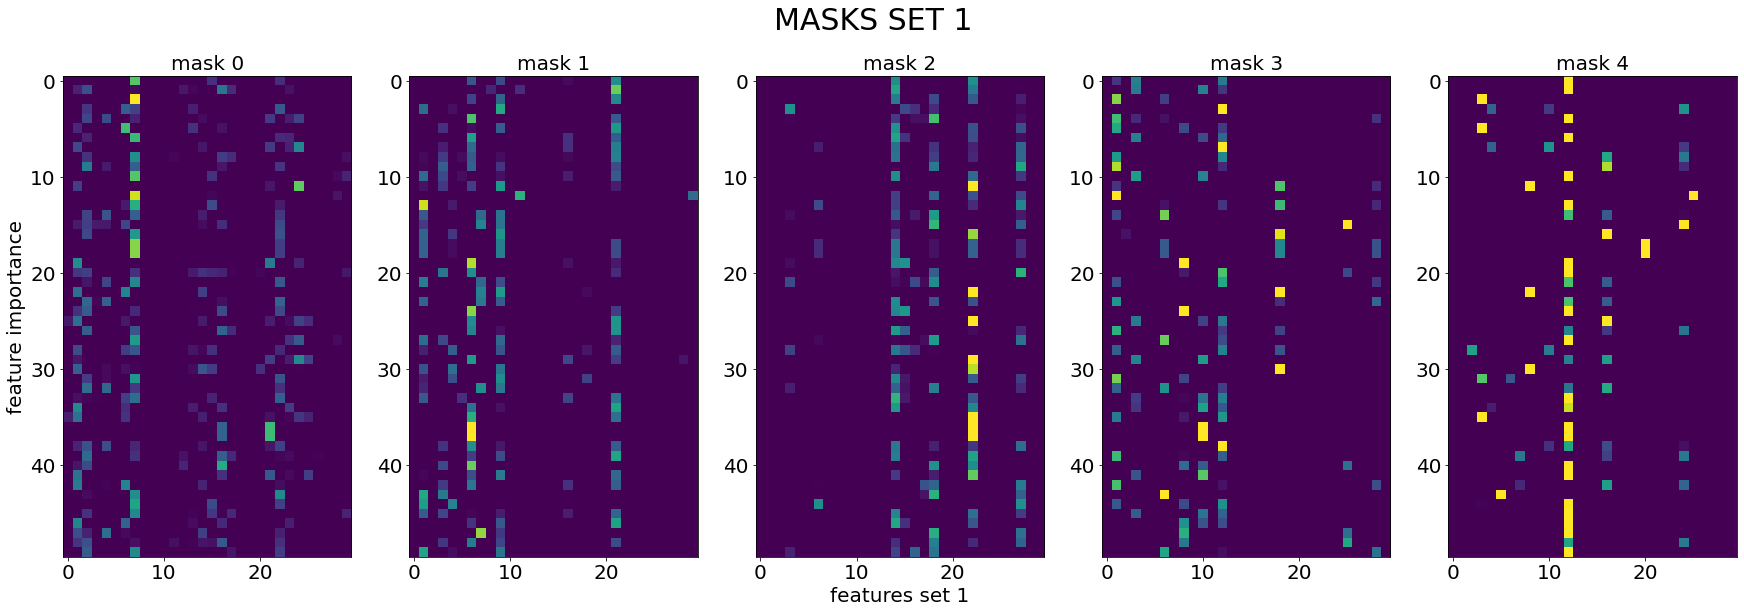

In [ ]:
fig, axs= plt.subplots(1,5, figsize=(30,40))
plt.suptitle('MASKS SET 1', fontsize = 30, y=0.61)
for i in range(5):
  axs[i].imshow(mask1[i][:50])
  axs[i].set_title(f"mask {i}", fontsize =20)
axs[2].set_xlabel('features set 1', fontsize=20)
axs[0].set_ylabel('feature importance', fontsize=20)

In [ ]:
fig, axs= plt.subplots(1,5, figsize=(250,150))
plt.suptitle('MASKS SET 2', fontsize = 30)
for i in range(5):
  axs[i].imshow(mask2[i][:50])
  axs[i].set_title(f"mask {i}", fontsize =20)
axs[2].set_xlabel('features set 2', fontsize=20)
axs[0].set_ylabel('feature importance', fontsize=20)

Text(0, 0.5, 'feature importance')

Text(0, 0.5, 'feature importance')

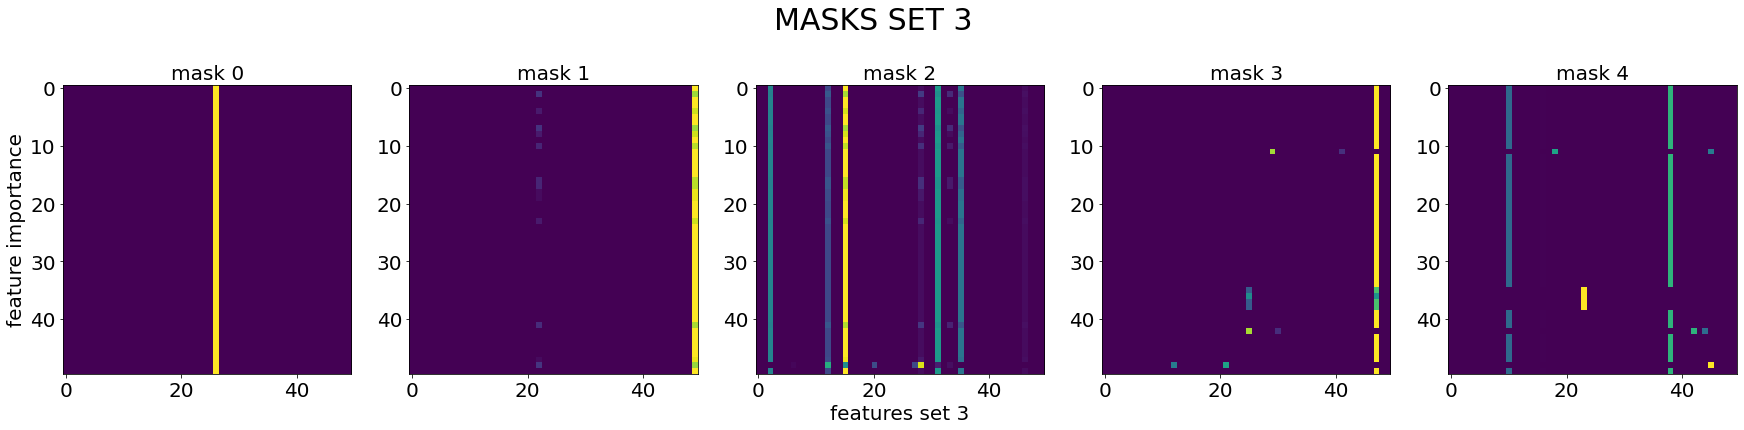

In [ ]:
fig, axs= plt.subplots(1,5, figsize=(30,40))

plt.suptitle('MASKS SET 3', fontsize = 30,  y=0.58)

for i in range(5):
  axs[i].imshow(mask3[i][:50])
  axs[i].set_title(f"mask {i}", fontsize =20)
axs[2].set_xlabel('features set 3', fontsize=20)
axs[0].set_ylabel('feature importance', fontsize=20)

## XGBOOST UNDERSAMPLED

### TRAINING

In [ ]:
XGB_clf1=XGB_clf1.fit( X_train1_uns,y_train1_uns, eval_set =[(X_valid1_uns,y_valid1_uns)], verbose = 25)

[0]	validation_0-auc:0.918662	validation_0-logloss:0.674079
[25]	validation_0-auc:0.949356	validation_0-logloss:0.363305
[50]	validation_0-auc:0.953954	validation_0-logloss:0.215889
[75]	validation_0-auc:0.960338	validation_0-logloss:0.137514
[100]	validation_0-auc:0.9637	validation_0-logloss:0.094131
[125]	validation_0-auc:0.969314	validation_0-logloss:0.069662
[150]	validation_0-auc:0.968886	validation_0-logloss:0.055228
[175]	validation_0-auc:0.971249	validation_0-logloss:0.047415
[200]	validation_0-auc:0.969754	validation_0-logloss:0.042942
[225]	validation_0-auc:0.96577	validation_0-logloss:0.040874
[249]	validation_0-auc:0.964567	validation_0-logloss:0.040009


In [ ]:
XGB_clf2=XGB_clf2.fit( X_train2_uns,y_train2_uns, eval_set =[(X_valid2_uns,y_valid2_uns)], verbose = 25)

[0]	validation_0-auc:0.779718	validation_0-logloss:0.676428
[25]	validation_0-auc:0.81932	validation_0-logloss:0.399213
[50]	validation_0-auc:0.828619	validation_0-logloss:0.269667
[75]	validation_0-auc:0.83097	validation_0-logloss:0.203224
[100]	validation_0-auc:0.855133	validation_0-logloss:0.16669
[125]	validation_0-auc:0.866475	validation_0-logloss:0.146242
[150]	validation_0-auc:0.871022	validation_0-logloss:0.13495
[175]	validation_0-auc:0.879379	validation_0-logloss:0.128295
[200]	validation_0-auc:0.884048	validation_0-logloss:0.123815
[225]	validation_0-auc:0.887861	validation_0-logloss:0.120752
[249]	validation_0-auc:0.891036	validation_0-logloss:0.118684


In [ ]:
XGB_clf3=XGB_clf3.fit( X_train3_uns,y_train3_uns, eval_set =[(X_valid3_uns,y_valid3_uns)], verbose = 25)

[0]	validation_0-auc:0.99896	validation_0-logloss:0.673521
[25]	validation_0-auc:0.99894	validation_0-logloss:0.354135
[50]	validation_0-auc:0.99894	validation_0-logloss:0.201962
[75]	validation_0-auc:0.99894	validation_0-logloss:0.120403
[100]	validation_0-auc:0.99915	validation_0-logloss:0.074364
[125]	validation_0-auc:0.99914	validation_0-logloss:0.047593
[150]	validation_0-auc:0.99908	validation_0-logloss:0.031801
[175]	validation_0-auc:0.99905	validation_0-logloss:0.022416
[200]	validation_0-auc:0.99899	validation_0-logloss:0.016863
[225]	validation_0-auc:0.99911	validation_0-logloss:0.013573
[249]	validation_0-auc:0.99925	validation_0-logloss:0.011352


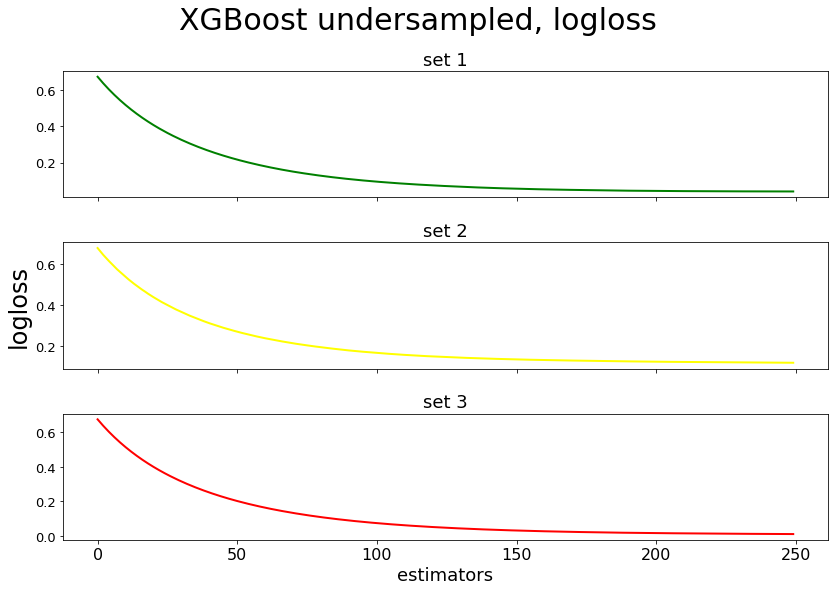

In [ ]:
fig, ax = plt.subplots(3, sharex='col', figsize=(12,8))
plt.suptitle('XGBoost undersampled, logloss', fontsize = 30,  y=1.04)
ax[0].plot(XGB_clf1.evals_result()['validation_0']['logloss'], color ='green', linewidth=2, markersize=12)
ax[0].set_title('set 1', fontsize=18)
ax[0].yaxis.set_tick_params(labelsize=13)
ax[1].plot(XGB_clf2.evals_result()['validation_0']['logloss'], color ='yellow', linewidth=2, markersize=12)
ax[1].set_ylabel(r"logloss", fontsize=24, color="black")
ax[1].set_title('set 2', fontsize=18)
ax[1].yaxis.set_tick_params(labelsize=13)
ax[2].plot(XGB_clf3.evals_result()['validation_0']['logloss'],color ='red', linewidth=2, markersize=12)
ax[2].set_xlabel('estimators', fontsize=18)
ax[2].set_title('set 3',  fontsize=18)
ax[2].xaxis.set_tick_params(labelsize=16)
ax[2].yaxis.set_tick_params(labelsize=13)

plt.tight_layout()
plt.show()

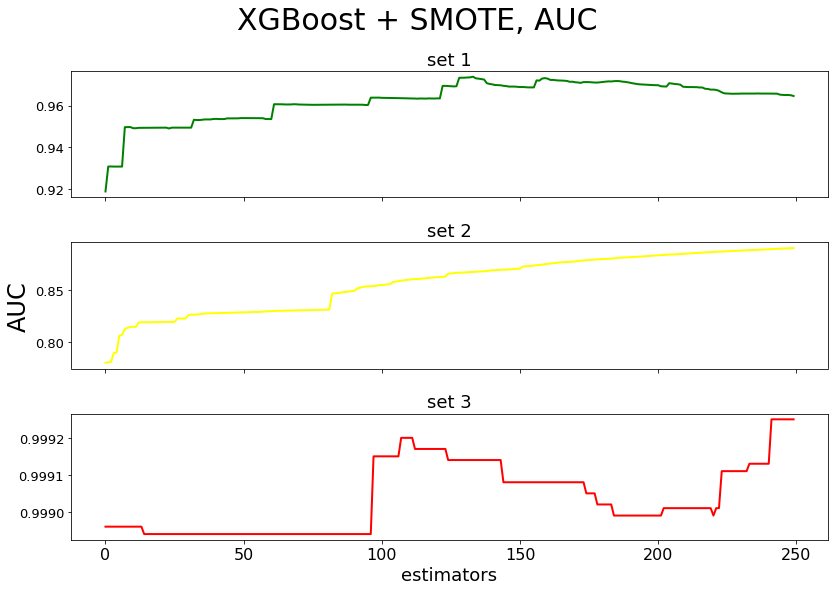

In [ ]:
fig, ax = plt.subplots(3, sharex='col', figsize=(12,8))
plt.suptitle('XGBoost + SMOTE, AUC', fontsize = 30,  y=1.04)
ax[0].plot( XGB_clf1.evals_result()['validation_0']['auc'], color ='green', linewidth=2, markersize=12)
ax[0].set_title('set 1', fontsize=18)
ax[0].yaxis.set_tick_params(labelsize=13)
ax[1].plot( XGB_clf2.evals_result()['validation_0']['auc'], color ='yellow', linewidth=2, markersize=12)
ax[1].set_ylabel(r"AUC", fontsize=24, color="black")
ax[1].set_title('set 2', fontsize=18)
ax[1].yaxis.set_tick_params(labelsize=13)
ax[2].plot( XGB_clf3.evals_result()['validation_0']['auc'],color ='red', linewidth=2, markersize=12)
ax[2].set_xlabel('estimators', fontsize=18)
ax[2].set_title('set 3',  fontsize=18)
ax[2].xaxis.set_tick_params(labelsize=16)
ax[2].yaxis.set_tick_params(labelsize=13)

plt.tight_layout()
plt.show()

### TEST

In [ ]:
predictions1_XGB_uns= XGB_clf1.predict(X_test1)
predictions2_XGB_uns= XGB_clf2.predict(X_test2)
predictions3_XGB_uns = XGB_clf3.predict(X_test3)

CONFUSION MATRIX

In [ ]:
cf_matrix1= confusion_matrix(y_test1, predictions1_XGB_uns)
cf_matrix2= confusion_matrix(y_test2, predictions2_XGB_uns)
cf_matrix3= confusion_matrix(y_test3, predictions3_XGB_uns)

Text(0.5, 0.98, 'CF_MATRIX XGB undersampled')

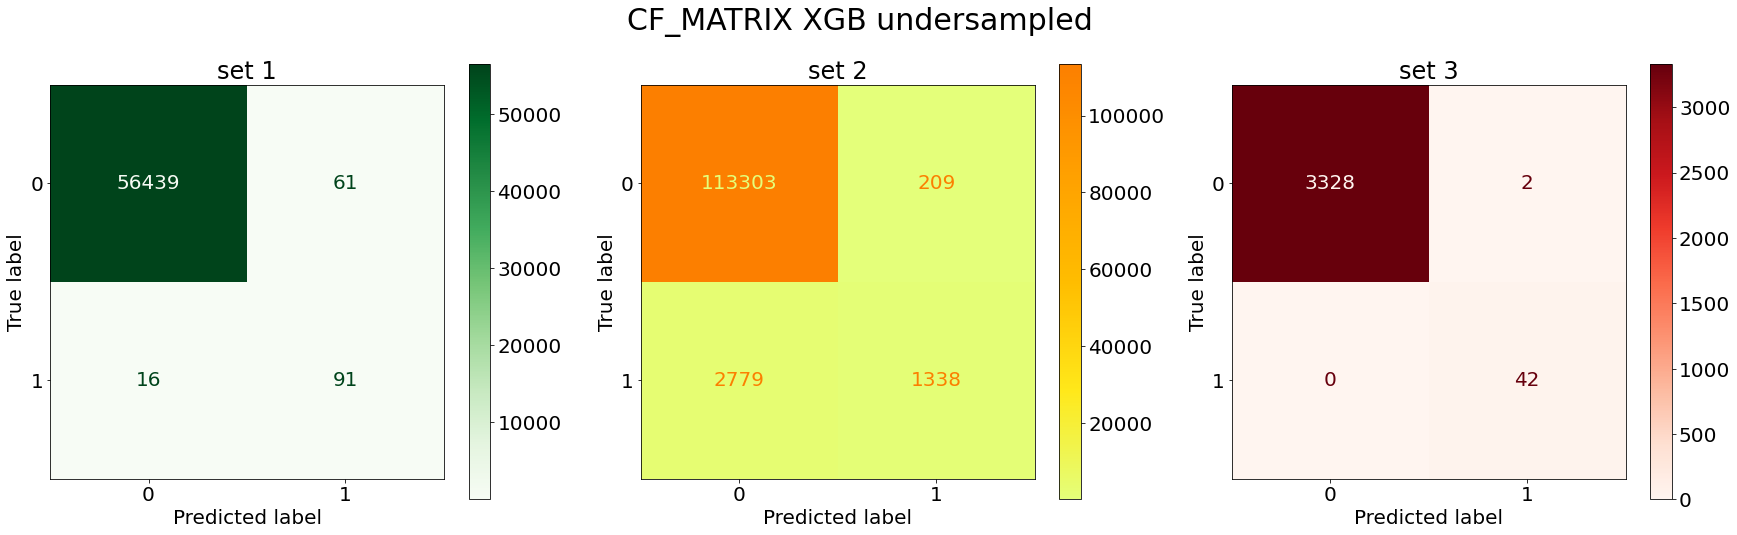

In [ ]:
font = {'family' : 'normal',
     'weight' : 'normal',
    'size'   : 20}
plt.rc('font', **font)

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(30,8))

ax1 =ConfusionMatrixDisplay(confusion_matrix=cf_matrix1).plot(cmap = "Greens", ax=ax1).ax_.set_title('set 1',fontsize =24) 
ax2 = ConfusionMatrixDisplay(confusion_matrix=cf_matrix2).plot(cmap = "Wistia",ax=ax2).ax_.set_title('set 2',fontsize =24) 
ax3 = ConfusionMatrixDisplay(confusion_matrix=cf_matrix3).plot(cmap = "Reds", ax=ax3).ax_.set_title('set 3',fontsize =24) 

plt.suptitle('CF_MATRIX XGB undersampled', fontsize = 30)

AUC, F1, ACCURACY

In [ ]:
fpr1, tpr1, _ = roc_curve(y_test1, predictions1_XGB_uns, pos_label=1)
Test1_auc= auc(fpr1,tpr1)

fpr2, tpr2, _ = roc_curve(y_test2, predictions2_XGB_uns, pos_label=1)
Test2_auc= auc(fpr2,tpr2)

fpr3, tpr3, _ = roc_curve(y_test3, predictions3_XGB_uns, pos_label=1)
Test3_auc= auc(fpr3,tpr3)

test1_F1=f1_score(y_test1, predictions1_XGB_uns, average='macro')
test2_F1=f1_score(y_test2, predictions2_XGB_uns, average='macro')
test3_F1=f1_score(y_test3, predictions3_XGB_uns, average='macro')

test1_acc= accuracy_score(y_test1, predictions1_XGB_uns)
test2_acc= accuracy_score(y_test2, predictions2_XGB_uns)
test3_acc= accuracy_score(y_test3, predictions3_XGB_uns)

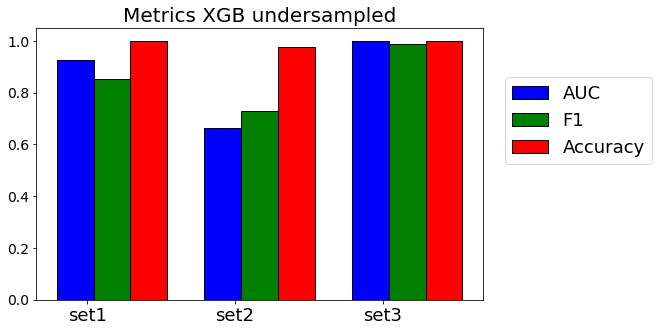

In [ ]:
AUC_XGB=[Test1_auc, Test2_auc, Test3_auc]
F1_XGB=[test1_F1, test2_F1, test3_F1]
Accuracy_XGB=[test1_acc, test2_acc, test3_acc]

plt.rcParams["figure.figsize"] = (8,5)

r = np.arange(3)
width = 0.25

plt.bar(r, AUC_XGB, color = 'b',
        width = width, edgecolor = 'black',
        label='AUC')
plt.bar(r + width, F1_XGB, color = 'g',
        width = width, edgecolor = 'black',
        label='F1')
plt.bar(r + width*2, Accuracy_XGB, color = 'red',
        width = width, edgecolor = 'black',
        label='Accuracy')
  
plt.title("Metrics XGB undersampled", fontsize = 20)
  
plt.xticks(r + width/3,['set1','set2','set3'], fontsize = 18)
plt.legend(fontsize = 18,loc=(1.05, 0.5))
plt.yticks(fontsize = 14)

plt.show()


In [ ]:
print("AUC {} \nF1 {} \nAccuracy {}".format(AUC_XGB,F1_XGB,Accuracy_XGB))

AUC [0.9246938218509635, 0.6615763562957363, 0.9996996996996996] 
F1 [0.8510105076525332, 0.7297216748710288, 0.9882218977694259] 
Accuracy [0.9986397442012472, 0.9745981008084741, 0.9994068801897983]


###FEATURE IMPORTANCE

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


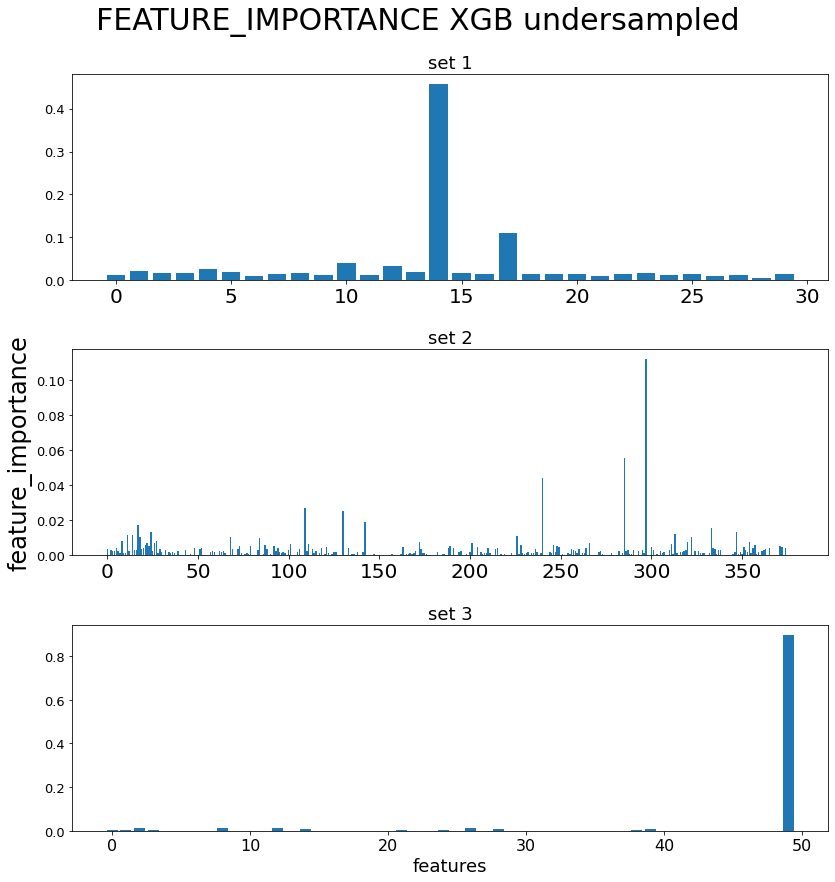

In [ ]:
fig, ax = plt.subplots(3,figsize=(12,12))

plt.suptitle('FEATURE_IMPORTANCE XGB undersampled', fontsize = 30,  y=1.03)
ax[0].bar(range(0,len(XGB_clf1.feature_importances_)), XGB_clf1.feature_importances_)
ax[0].set_title('set 1', fontsize=18)
ax[0].yaxis.set_tick_params(labelsize=13)
ax[1].bar(range(0,len(XGB_clf2.feature_importances_)), XGB_clf2.feature_importances_)
ax[1].set_ylabel(r"feature_importance", fontsize=24, color="black")
ax[1].set_title('set 2', fontsize=18)
ax[1].yaxis.set_tick_params(labelsize=13)
ax[2].bar(range(0,len(XGB_clf3.feature_importances_)), XGB_clf3.feature_importances_)
ax[2].set_xlabel('features', fontsize=18)
ax[2].set_title('set 3',  fontsize=18)
ax[2].xaxis.set_tick_params(labelsize=16)
ax[2].yaxis.set_tick_params(labelsize=13)


plt.tight_layout()
plt.show()

## Light GBM UNDERSAMPLED

### TRAINING

In [ ]:
LGBM_clf1 = LGBM_clf1.fit( X_train1_uns,y_train1_uns, eval_set =[(X_valid1_uns,y_valid1_uns)], eval_metric="auc",verbose =25)

[25]	valid_0's auc: 0.971694	valid_0's binary_logloss: 0.0886449
[50]	valid_0's auc: 0.973651	valid_0's binary_logloss: 0.0623761
[75]	valid_0's auc: 0.970701	valid_0's binary_logloss: 0.050012
[100]	valid_0's auc: 0.969414	valid_0's binary_logloss: 0.0442988
[125]	valid_0's auc: 0.967628	valid_0's binary_logloss: 0.0420137
[150]	valid_0's auc: 0.96546	valid_0's binary_logloss: 0.0411725
[175]	valid_0's auc: 0.969697	valid_0's binary_logloss: 0.0412203
[200]	valid_0's auc: 0.969099	valid_0's binary_logloss: 0.0416957
[225]	valid_0's auc: 0.969471	valid_0's binary_logloss: 0.0421848
[250]	valid_0's auc: 0.973968	valid_0's binary_logloss: 0.042676


In [ ]:
LGBM_clf2 = LGBM_clf2.fit( X_train2_uns,y_train2_uns, eval_set =[(X_valid2_uns,y_valid2_uns)], eval_metric="auc",verbose =25)

[25]	valid_0's auc: 0.863303	valid_0's binary_logloss: 0.14704
[50]	valid_0's auc: 0.872594	valid_0's binary_logloss: 0.133292
[75]	valid_0's auc: 0.880842	valid_0's binary_logloss: 0.125618
[100]	valid_0's auc: 0.886543	valid_0's binary_logloss: 0.120706
[125]	valid_0's auc: 0.891412	valid_0's binary_logloss: 0.117505
[150]	valid_0's auc: 0.895944	valid_0's binary_logloss: 0.114916
[175]	valid_0's auc: 0.899304	valid_0's binary_logloss: 0.112918
[200]	valid_0's auc: 0.902116	valid_0's binary_logloss: 0.111301
[225]	valid_0's auc: 0.90499	valid_0's binary_logloss: 0.109816
[250]	valid_0's auc: 0.907419	valid_0's binary_logloss: 0.108572


In [ ]:
LGBM_clf3 = LGBM_clf3.fit( X_train3_uns,y_train3_uns, eval_set =[(X_valid3_uns,y_valid3_uns)], eval_metric="auc",verbose =25)

[25]	valid_0's auc: 0.99898	valid_0's binary_logloss: 0.0693697
[50]	valid_0's auc: 0.99902	valid_0's binary_logloss: 0.0395186
[75]	valid_0's auc: 0.999	valid_0's binary_logloss: 0.0249329
[100]	valid_0's auc: 0.999	valid_0's binary_logloss: 0.0171223
[125]	valid_0's auc: 0.999	valid_0's binary_logloss: 0.0128332
[150]	valid_0's auc: 0.999	valid_0's binary_logloss: 0.010485
[175]	valid_0's auc: 0.99896	valid_0's binary_logloss: 0.00920022
[200]	valid_0's auc: 0.99896	valid_0's binary_logloss: 0.00852281
[225]	valid_0's auc: 0.99898	valid_0's binary_logloss: 0.00804285
[250]	valid_0's auc: 0.9991	valid_0's binary_logloss: 0.00733141


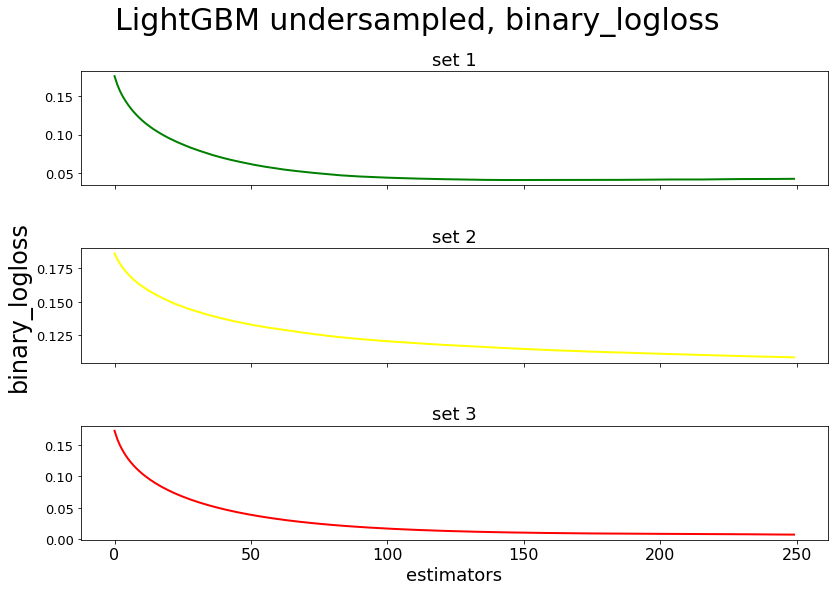

In [ ]:
fig, ax = plt.subplots(3, sharex='col', figsize=(12,8))
plt.suptitle('LightGBM undersampled, binary_logloss', fontsize = 30,  y=1.04)
ax[0].plot(LGBM_clf1.evals_result_['valid_0']['binary_logloss'], color ='green', linewidth=2, markersize=12)
ax[0].set_title('set 1', fontsize=18)
ax[0].yaxis.set_tick_params(labelsize=13)
ax[1].plot(LGBM_clf2.evals_result_['valid_0']['binary_logloss'], color ='yellow', linewidth=2, markersize=12)
ax[1].set_ylabel(r"binary_logloss", fontsize=24, color="black")
ax[1].set_title('set 2', fontsize=18)
ax[1].yaxis.set_tick_params(labelsize=13)
ax[2].plot(LGBM_clf3.evals_result_['valid_0']['binary_logloss'],color ='red', linewidth=2, markersize=12)
ax[2].set_xlabel('estimators', fontsize=18)
ax[2].set_title('set 3',  fontsize=18)
ax[2].xaxis.set_tick_params(labelsize=16)
ax[2].yaxis.set_tick_params(labelsize=13)

plt.tight_layout()
plt.show()

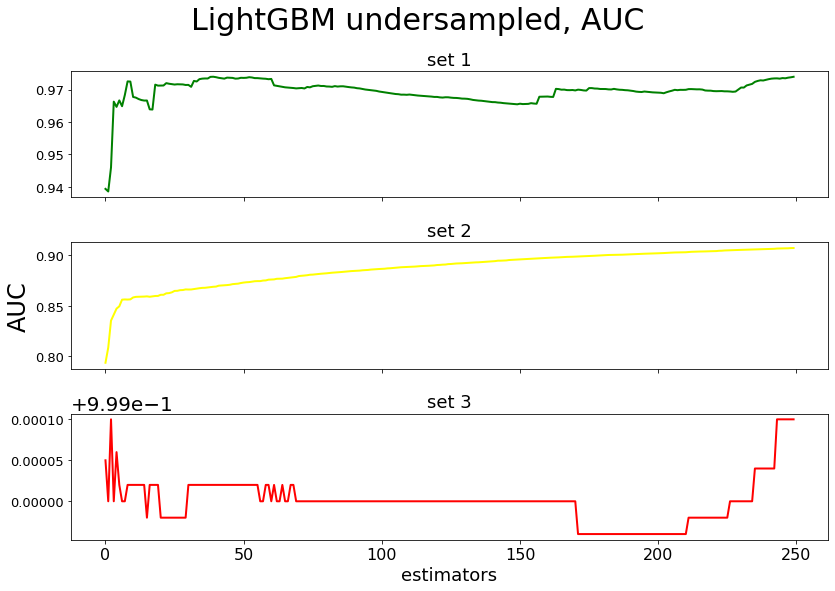

In [ ]:
fig, ax = plt.subplots(3, sharex='col', figsize=(12,8))
plt.suptitle('LightGBM undersampled, AUC', fontsize = 30,  y=1.04)
ax[0].plot( LGBM_clf1.evals_result_['valid_0']['auc'], color ='green', linewidth=2, markersize=12)
ax[0].set_title('set 1', fontsize=18)
ax[0].yaxis.set_tick_params(labelsize=13)
ax[1].plot(LGBM_clf2.evals_result_['valid_0']['auc'], color ='yellow', linewidth=2, markersize=12)
ax[1].set_ylabel(r"AUC", fontsize=24, color="black")
ax[1].set_title('set 2', fontsize=18)
ax[1].yaxis.set_tick_params(labelsize=13)
ax[2].plot( LGBM_clf3.evals_result_['valid_0']['auc'],color ='red', linewidth=2, markersize=12)
ax[2].set_xlabel('estimators', fontsize=18)
ax[2].set_title('set 3',  fontsize=18)
ax[2].xaxis.set_tick_params(labelsize=16)
ax[2].yaxis.set_tick_params(labelsize=13)

plt.tight_layout()
plt.show()

### TEST

In [ ]:
predictions_LGBM1_uns= LGBM_clf1.predict(X_test1)
predictions_LGBM2_uns= LGBM_clf2.predict(X_test2)
predictions_LGBM3_uns= LGBM_clf3.predict(X_test3)

CONFUSIOM MATRIX

In [ ]:
cf_matrix_LGBM1= confusion_matrix(y_test1, predictions_LGBM1_uns)
cf_matrix_LGBM2= confusion_matrix(y_test2, predictions_LGBM2_uns)
cf_matrix_LGBM3= confusion_matrix(y_test3, predictions_LGBM3_uns)

Text(0.5, 0.98, 'CF_MATRIX LGBM undersampled')

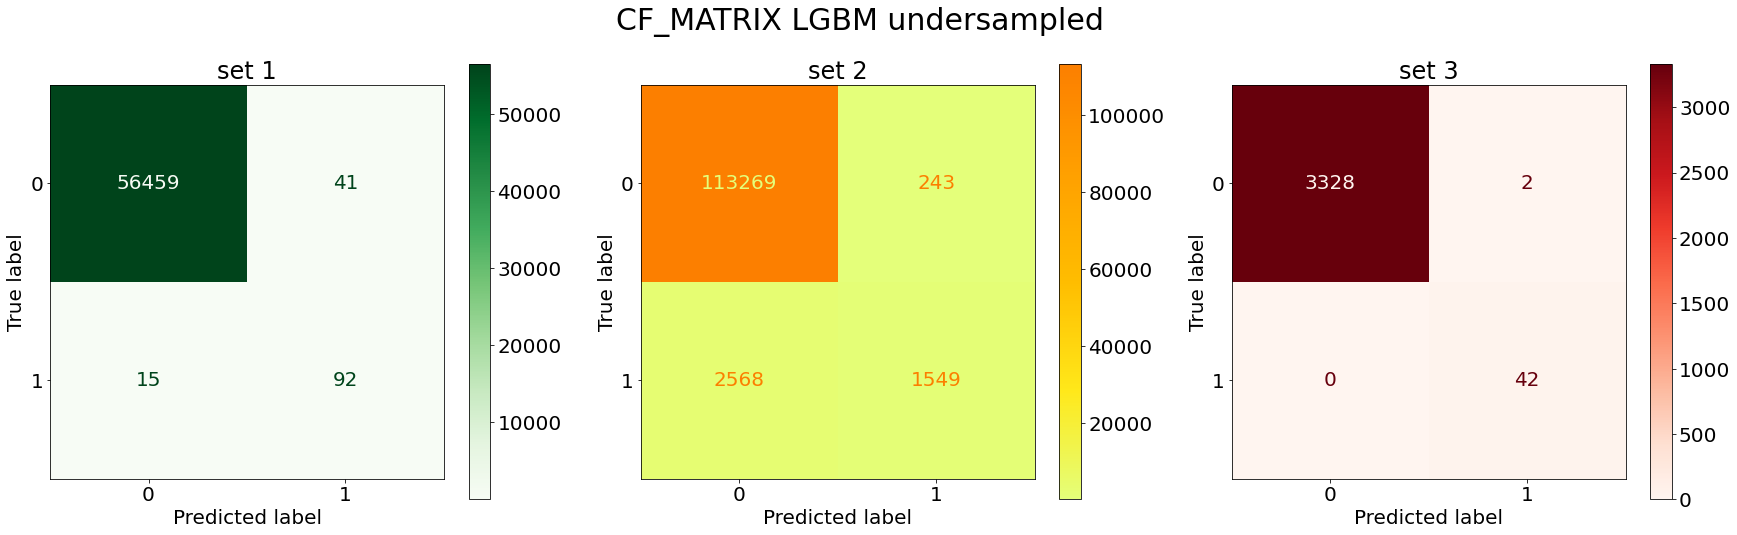

In [ ]:
font = {'family' : 'normal',
     'weight' : 'normal',
    'size'   : 20}
plt.rc('font', **font)

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(30,8))

ax1 =ConfusionMatrixDisplay(confusion_matrix=cf_matrix_LGBM1).plot(cmap = "Greens", ax=ax1).ax_.set_title('set 1',fontsize =24) 
ax2 = ConfusionMatrixDisplay(confusion_matrix=cf_matrix_LGBM2).plot(cmap = "Wistia",ax=ax2).ax_.set_title('set 2',fontsize =24) 
ax3 = ConfusionMatrixDisplay(confusion_matrix=cf_matrix_LGBM3).plot(cmap = "Reds", ax=ax3).ax_.set_title('set 3',fontsize =24) 

plt.suptitle('CF_MATRIX LGBM undersampled', fontsize = 30)

AUC, F1, ACCURACY

In [ ]:
fpr1, tpr1, _ = roc_curve(y_test1, predictions_LGBM1_uns, pos_label=1)
Test1_auc= auc(fpr1,tpr1)

fpr2, tpr2, _ = roc_curve(y_test2, predictions_LGBM2_uns, pos_label=1)
Test2_auc= auc(fpr2,tpr2)

fpr3, tpr3, _ = roc_curve(y_test3, predictions_LGBM3_uns, pos_label=1)
Test3_auc= auc(fpr3,tpr3)

test1_F1=f1_score(y_test1, predictions_LGBM1_uns, average='macro')
test2_F1=f1_score(y_test2, predictions_LGBM2_uns, average='macro')
test3_F1=f1_score(y_test3, predictions_LGBM3_uns, average='macro')

test1_acc= accuracy_score(y_test1, predictions_LGBM1_uns)
test2_acc= accuracy_score(y_test2, predictions_LGBM2_uns)
test3_acc= accuracy_score(y_test3, predictions_LGBM3_uns)

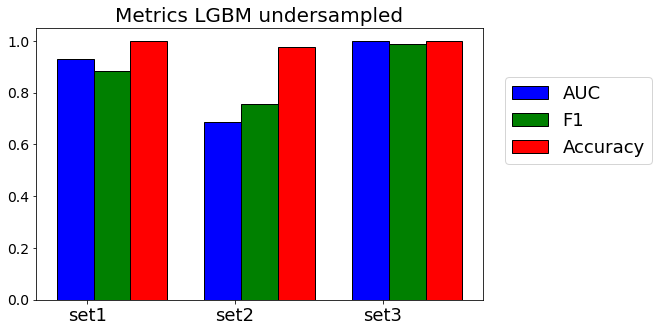

In [ ]:
AUC_LGBM=[Test1_auc, Test2_auc, Test3_auc]
F1_LGBM=[test1_F1, test2_F1, test3_F1]
Accuracy_LGBM=[test1_acc, test2_acc, test3_acc]

plt.rcParams["figure.figsize"] = (8,5)

r = np.arange(3)
width = 0.25

plt.bar(r, AUC_LGBM, color = 'b',
        width = width, edgecolor = 'black',
        label='AUC')
plt.bar(r + width, F1_LGBM, color = 'g',
        width = width, edgecolor = 'black',
        label='F1')
plt.bar(r + width*2, Accuracy_LGBM, color = 'red',
        width = width, edgecolor = 'black',
        label='Accuracy')
  
plt.title("Metrics LGBM undersampled", fontsize = 20)
  
plt.xticks(r + width/3,['set1','set2','set3'], fontsize = 18)
plt.legend(fontsize = 18,loc=(1.05, 0.5))
plt.yticks(fontsize = 14)

plt.show()

In [ ]:
print("AUC {} \nF1 {} \nAccuracy {}".format(AUC_LGBM,F1_LGBM,Accuracy_LGBM))

AUC [0.9295437101976678, 0.6870520478228327, 0.9996996996996996] 
F1 [0.8830854886965143, 0.756014279421585, 0.9882218977694259] 
Accuracy [0.9990107230554525, 0.9761028317846789, 0.9994068801897983]


### FEATURE IMPORTANCE

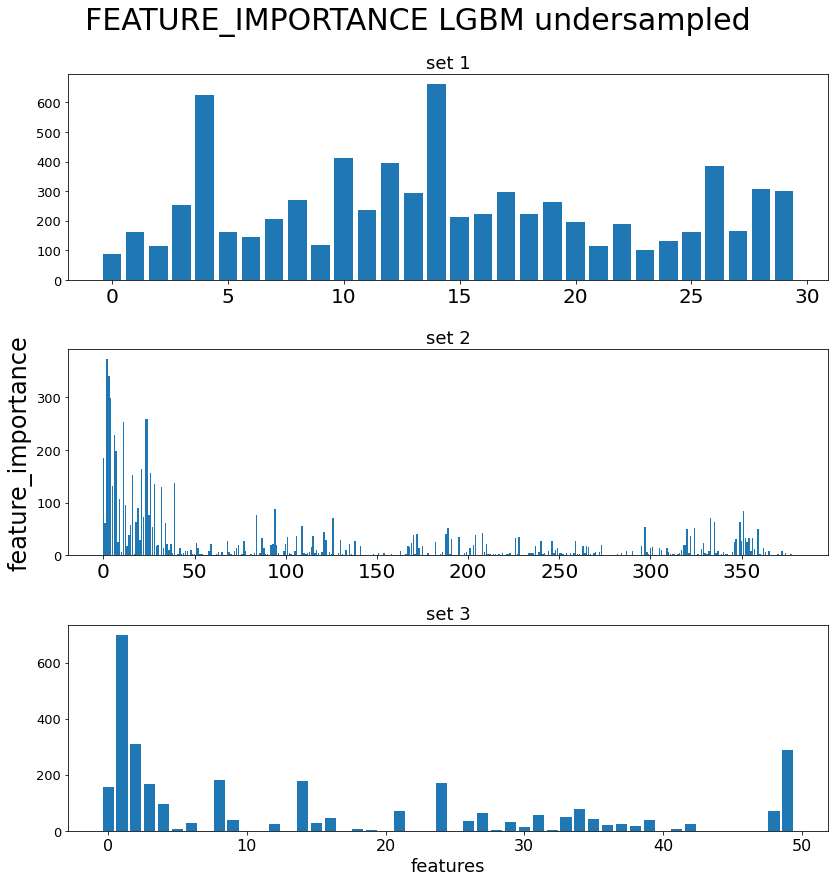

In [ ]:
fig, ax = plt.subplots(3,figsize=(12,12))

plt.suptitle('FEATURE_IMPORTANCE LGBM undersampled', fontsize = 30,  y=1.03)
ax[0].bar(range(0,len(LGBM_clf1.feature_importances_)), LGBM_clf1.feature_importances_)
ax[0].set_title('set 1', fontsize=18)
ax[0].yaxis.set_tick_params(labelsize=13)
ax[1].bar(range(0,len(LGBM_clf2.feature_importances_)), LGBM_clf2.feature_importances_)
ax[1].set_ylabel(r"feature_importance", fontsize=24, color="black")
ax[1].set_title('set 2', fontsize=18)
ax[1].yaxis.set_tick_params(labelsize=13)
ax[2].bar(range(0,len(LGBM_clf3.feature_importances_)), LGBM_clf3.feature_importances_)
ax[2].set_xlabel('features', fontsize=18)
ax[2].set_title('set 3',  fontsize=18)
ax[2].xaxis.set_tick_params(labelsize=16)
ax[2].yaxis.set_tick_params(labelsize=13)


plt.tight_layout()
plt.show()